# Import Gdrive

In [1]:
from google.colab import drive
drive.mount('/content/gdrive/')

import os
import scipy.stats as stats
import math
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1.inset_locator import (inset_axes, InsetPosition,
                                                  mark_inset)
import matplotlib.pylab as pylab

root_path  = 'gdrive/My Drive'


Mounted at /content/gdrive/


In [ ]:


mu1 = 5
mu2 = 1
mu3 = 8
var1 = 0.5
var2 = 1
var3 = 0.2
sig1 = math.sqrt(var1)
sig2 = math.sqrt(var2)
sig3 = math.sqrt(var3)
x1 = np.linspace(mu1 - 3.5*sig1, mu1 + 3.5*sig1, 200)
x2 = np.linspace(mu2 - 3.5*sig2, mu2 + 3.5*sig2, 200)
x3 = np.linspace(mu3 - 3.5*sig3, mu3 + 3.5*sig3, 200)

fig, ax = plt.figure(figsize=(7,5)), plt.gca()
plt.plot(x1, stats.norm.pdf(x1, mu1, sig1),'b')
plt.plot(x2, stats.norm.pdf(x2, mu2, sig2),'r')
plt.plot(x3, stats.norm.pdf(x3, mu3, sig3),'g')
plt.xlim(-2,10)
plt.ylim(0,1)
ax.axes.xaxis.set_visible(False)
ax.axes.yaxis.set_visible(False)
plt.xlabel('Batch size')
plt.grid(True)
plt.savefig('./dist.eps')
# plt.show()


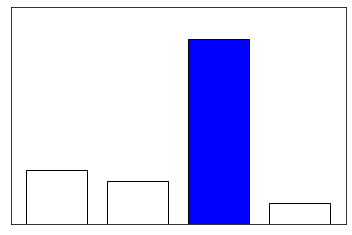

In [ ]:
x = [1,2,3,4]
alphas = [0.25,0.2,0.85,0.1]
fig2, ax2 = plt.figure(), plt.gca()
plt.bar(x,alphas, width=0.75, color=['none','none','blue','none'], edgecolor=['black','black','black','black'])
plt.ylim(0, 1.0)
ax2.axes.xaxis.set_visible(False)
ax2.axes.yaxis.set_visible(False)
plt.savefig('./alpha2.eps')

# plt.xlabel('Samples')
# plt.ylabel('Probability')
# for j, a in enumerate(alphas_i):
#   a = np.round(a, 4)
  # plt.text(xlocs[j] - 0.25, a + 0.01, str(a))


# Logit and alpha distributions 

In [ ]:
hyper_lr = str(0.001)
metric = 'alphas'

results_path = os.path.join(root_path, 'code/BatchSizeGenerator/experiments/exp4_logs')
X = np.loadtxt(os.path.join(results_path, '{}.txt'.format(metric)), unpack=True).astype(np.float)
n_plots = X.shape[1]
epoch1_length = int(np.floor(40000/64))
epoch2_length = int(np.floor(40000/56)) + 1
total_length = epoch1_length + epoch2_length

In [ ]:
epoch = 1

for i in range(n_plots):
  if (i+1)==epoch1_length:
     epoch += 1

  if (i+1)==1 or (i+1)==total_length or (i+1)%50==0: 
      alphas_i = X[:,i]
      fig = plt.figure()
      plt.title('epoch: {}, iteration: {}, hyper-lr: {}'.format(epoch, str(i+1), str(hyper_lr)))
      if metric == 'alphas':
          x = ['alpha_1','alpha_2','alpha_3','alpha_4']
          plt.ylim(0,1)
      elif metric == 'p':
          x = ['p_1','p_2','p_3','p_4']
          plt.ylim(0,1)
      else:
          x = ['logit_1','logit_2','logit_3','logit_4']
          plt.ylim(-10,2)
      plt.bar(x, alphas_i, width=0.75)
      xlocs = plt.xticks()
      xlocs=[i for i in range(4)]
      for j, a in enumerate(alphas_i):
        a = np.round(a, 4)
        plt.text(xlocs[j] - 0.25, a + 0.01, str(a))
      # dont need to plot all 1340...just do it every e.g. 50 iterations.
        plt.savefig(os.path.join(results_path,'{}/{}_epoch_{}_iter_{}.png'.format(metric, metric, epoch, i+1)))


# Samples and alphas 

In [ ]:

results_path = os.path.join(root_path, 'experiments/section1/arch/non-stochastic/WRN164/bs-scheduler')
x = np.arange(8, 512)
iter_samples = np.loadtxt(os.path.join(results_path, 'bs_samples.txt'), unpack=True).astype(np.float)
epoch_samples = np.loadtxt(os.path.join(results_path, 'epoch_samples.txt'), unpack=True).astype(np.float)
iter_alphas = np.loadtxt(os.path.join(results_path, 'alphas.txt'), unpack=True).astype(np.float)
epoch_alphas = np.loadtxt(os.path.join(results_path, 'epoch_alphas.txt'), unpack=True).astype(np.float)
x_start = np.array([0.25, 0.25, 0.25, 0.25])
y = np.array([105, 116, 153, 155])
n_plots = iter_alphas.shape[1]
# X_add = np.concatenate(y, samples)

epoch1_length = int(np.floor(40000/128))
epoch2_length = int(np.floor(40000/56)) + 1
total_length = epoch1_length + epoch2_length

Separate plots 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  if sys.path[0] == '':


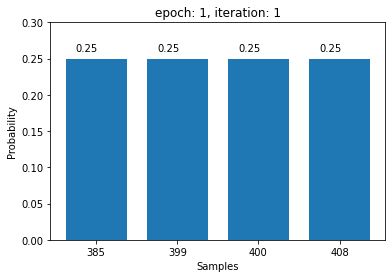

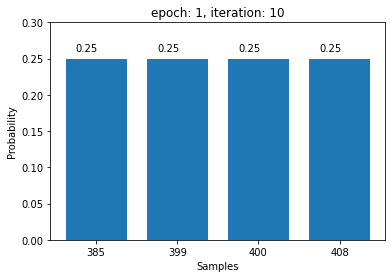

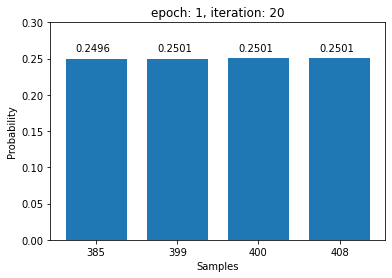

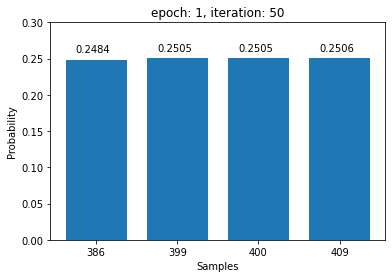

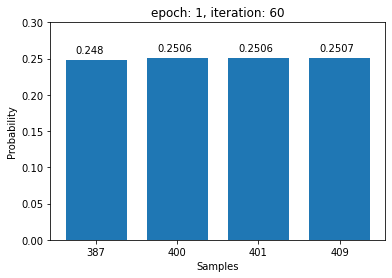

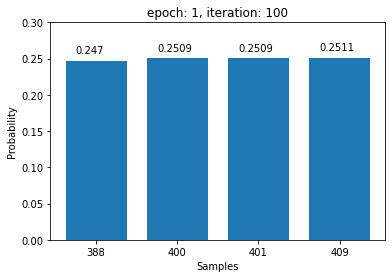

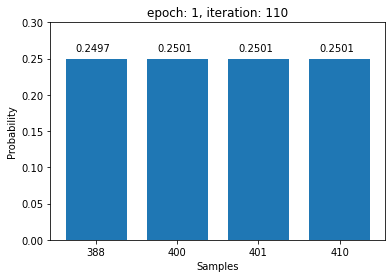

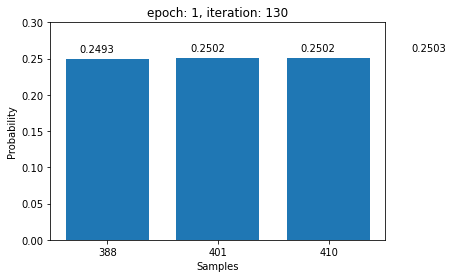

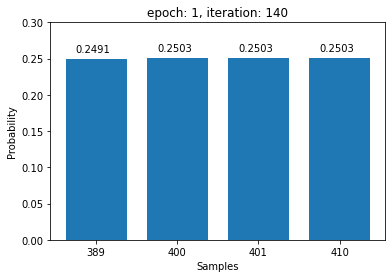

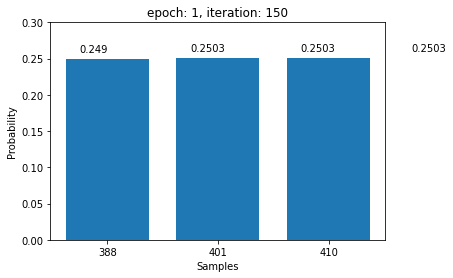

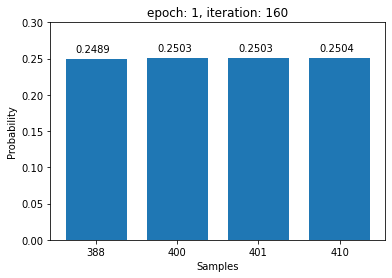

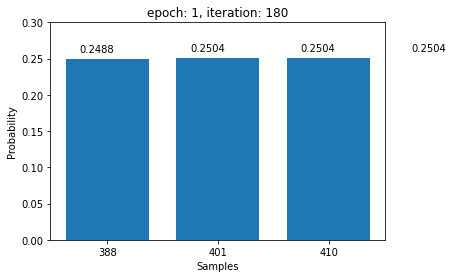

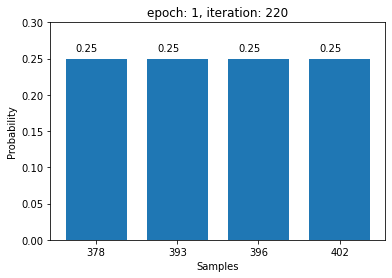

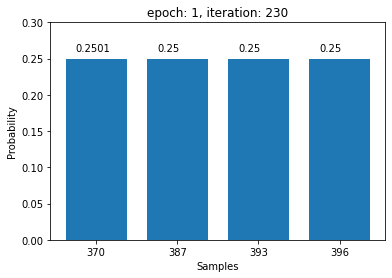

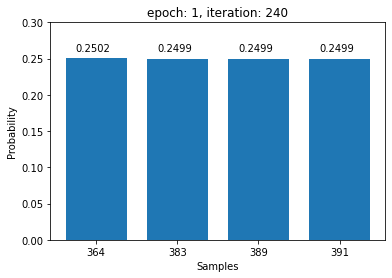

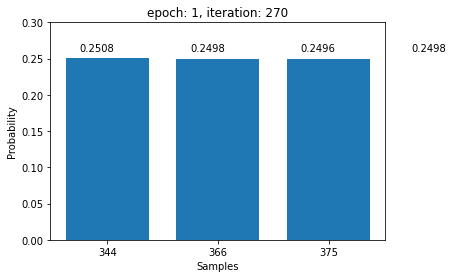

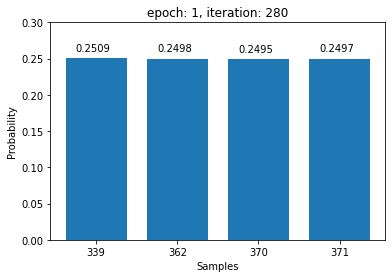

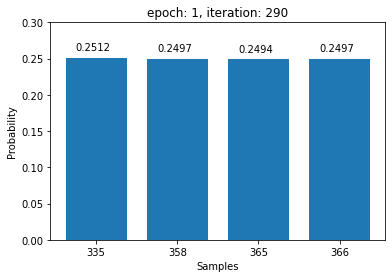

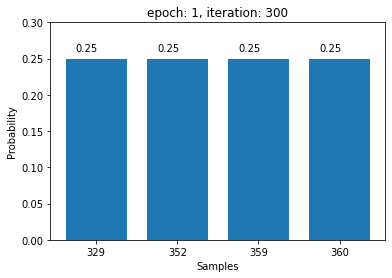

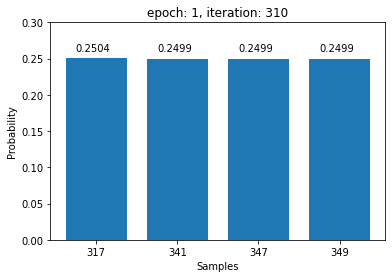

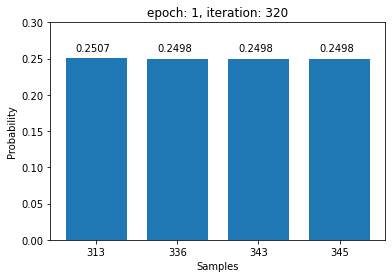

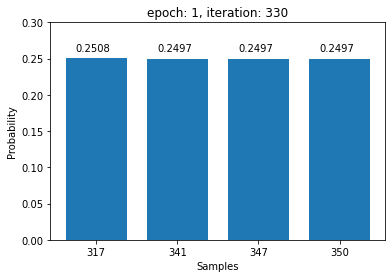

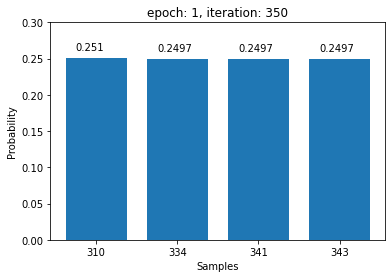

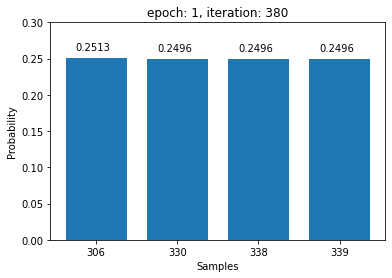

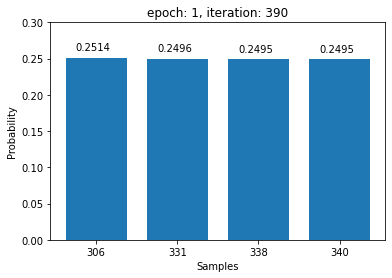

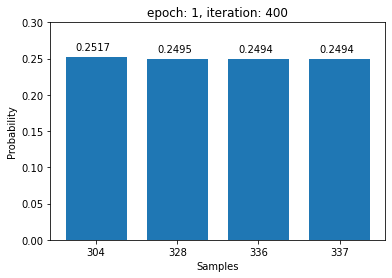

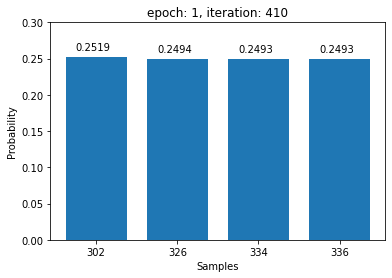

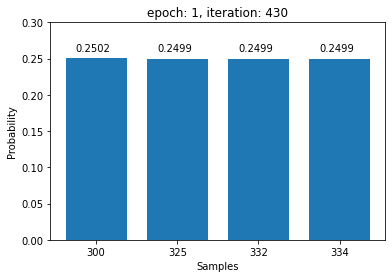

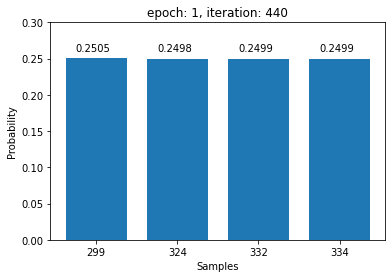

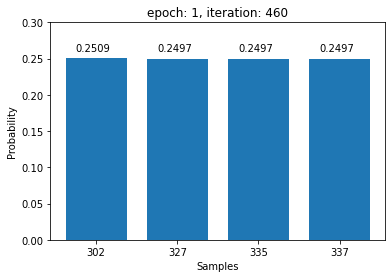

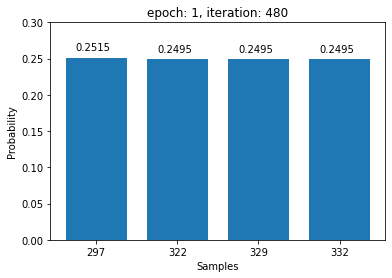

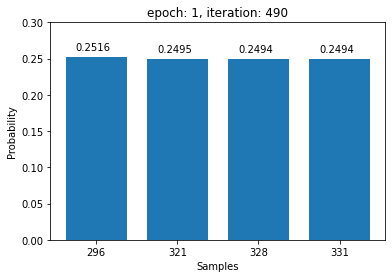

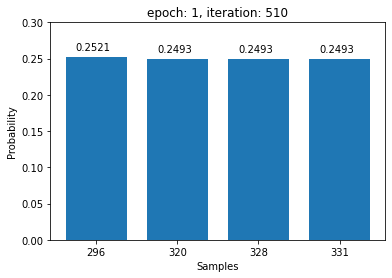

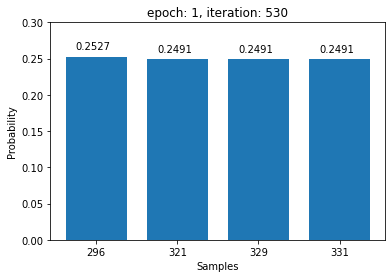

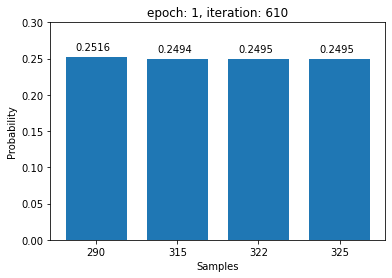

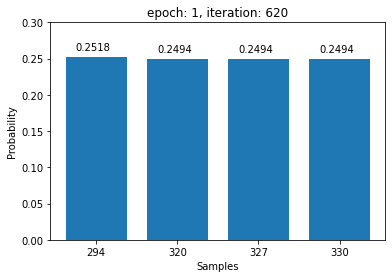

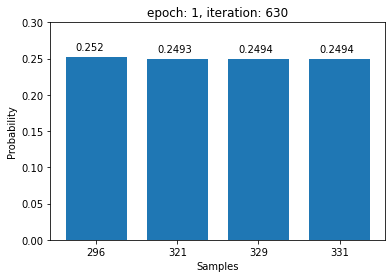

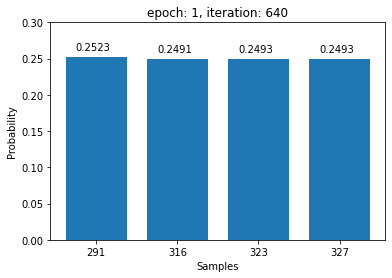

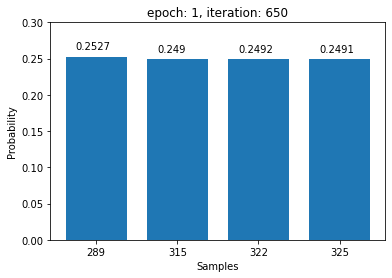

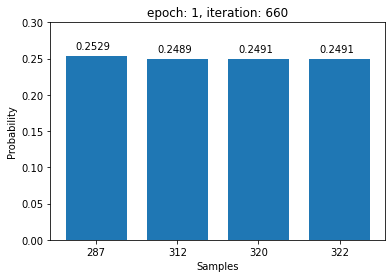

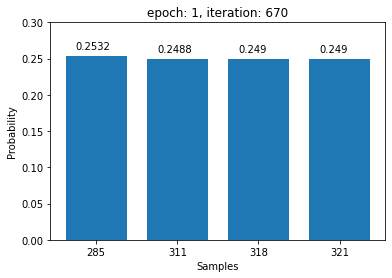

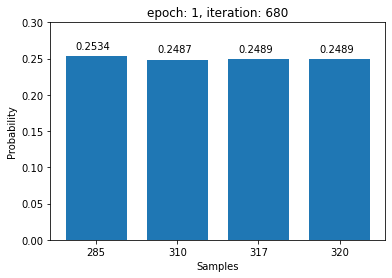

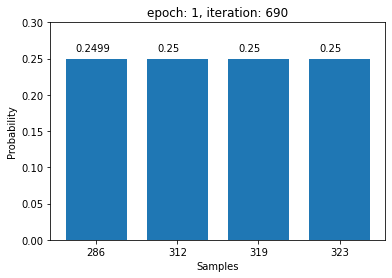

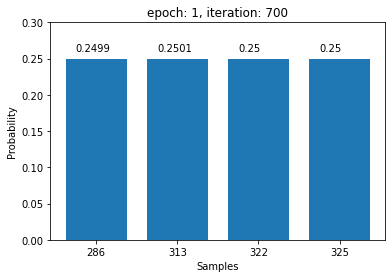

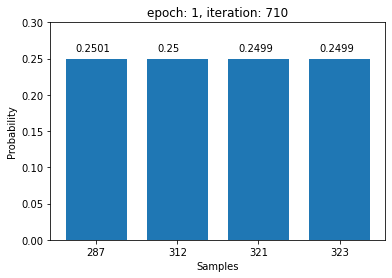

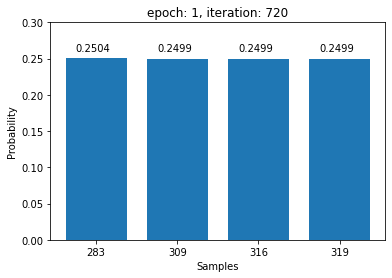

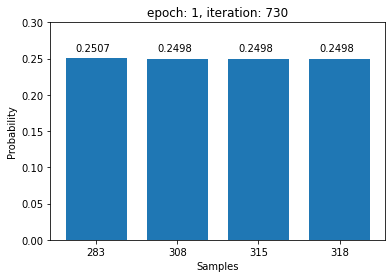

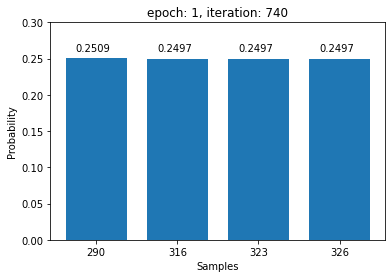

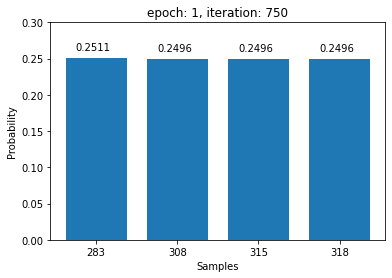

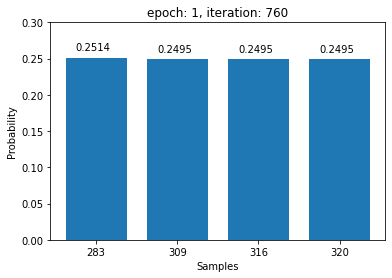

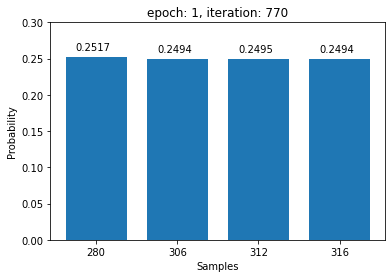

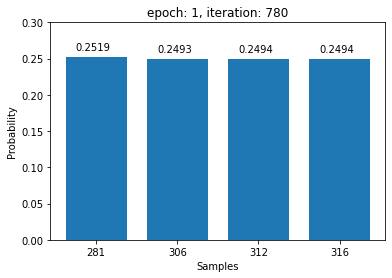

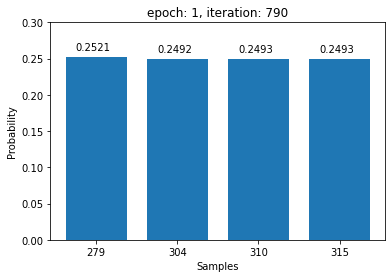

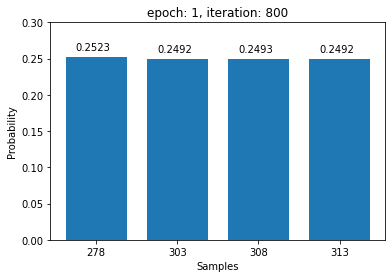

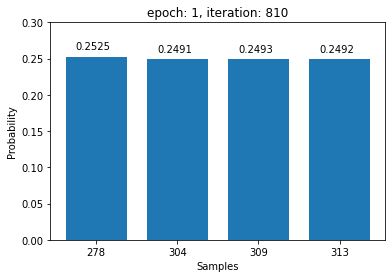

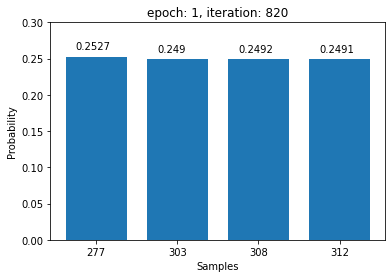

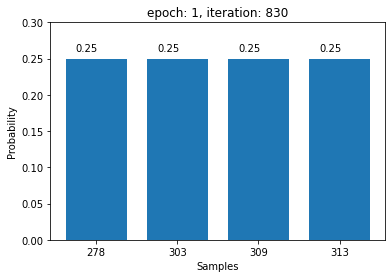

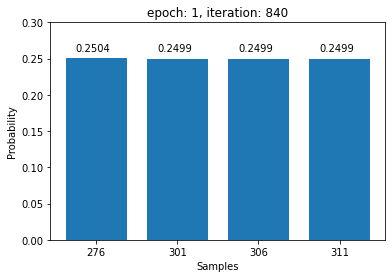

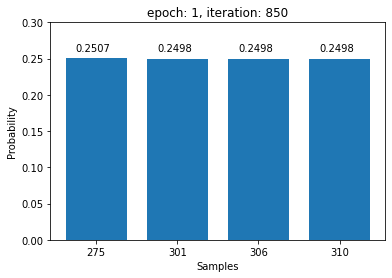

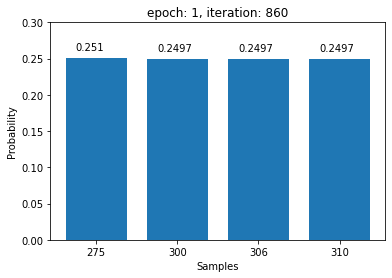

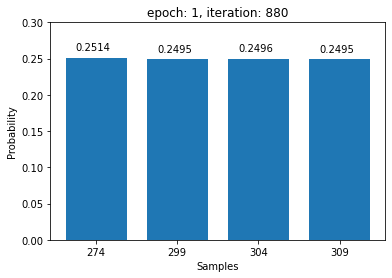

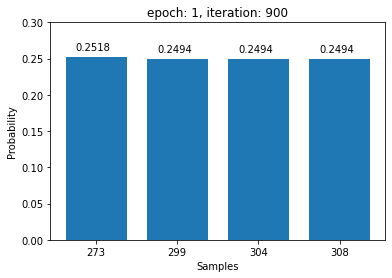

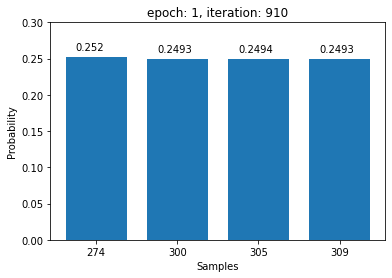

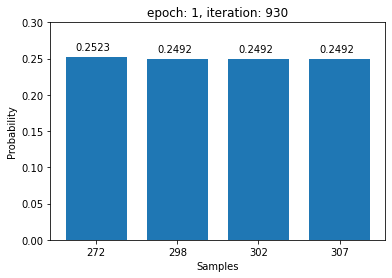

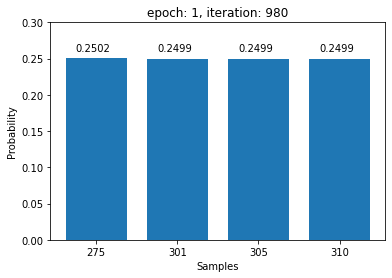

In [ ]:
epoch=1
metric='alphas' # also 'samples'
for i in range(n_plots):
  if (i+1)==1000:
      epoch += 1
      break
  # if i+1 == 10:
  #     break
  if i==0 or (i+1)==total_length or (i+1)%10==0: 
      alphas_i = iter_alphas[:,i]
      samples_i = iter_samples[:,i]
      fig = plt.figure()
      plt.title('epoch: {}, iteration: {}'.format(epoch, str(i+1)))
      x = [str(int(s)) for s in samples_i]
      plt.bar(x, alphas_i, width=0.75)
      plt.ylim(0, 0.3)
      plt.xlabel('Samples')
      plt.ylabel('Probability')
      xlocs = plt.xticks()
      xlocs=[i for i in range(4)]
      for j, a in enumerate(alphas_i):
        a = np.round(a, 4)
        plt.text(xlocs[j] - 0.25, a + 0.01, str(a))
        plt.savefig(os.path.join(results_path,'{}/{}_epoch_{}_iter_{}.png'.format(metric, metric, epoch, i+1)))


Merge all figs into a gif to watch how distribution evolves

In [ ]:
import imageio
images = []
j=1
for i in range(n_plots):
    if i==0:
      filename = os.path.join(results_path, '{}/{}_epoch_{}_iter_{}.png'.format(metric,metric,1, j))
    else:
      filename = os.path.join(results_path, '{}/{}_epoch_{}_iter_{}.png'.format(metric,metric,1, j-1))
    images.append(imageio.imread(filename))
    j += 10
    if j>990:
      break

imageio.mimsave(os.path.join(results_path, '{}.gif'.format(metric)), images, duration=0.1)

# Loss results

Single results

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


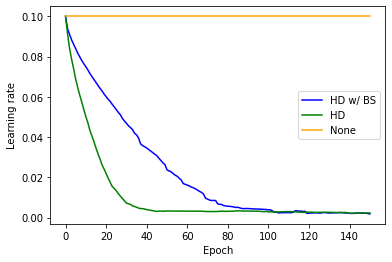

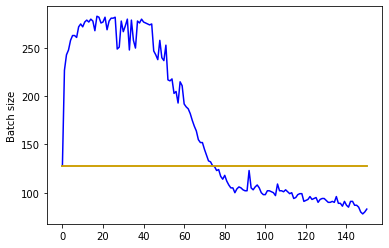

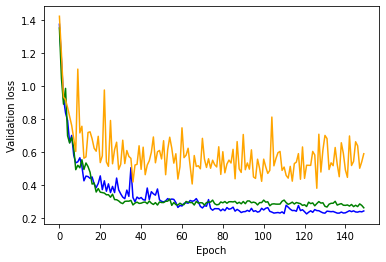

In [ ]:
results_path1 = os.path.join(root_path, 'experiments/section1/dataset/cifar-100/none/VGG/lr=0.1,s=128/logs')
results_path2 = os.path.join(root_path, 'experiments/section1/dataset/cifar-100/scheduler/VGG/lr=0.1,s=128/logs')
results_path = os.path.join(root_path, 'compare-with-bs-sched/no-decay')

F = np.loadtxt(os.path.join(results_path, 'F.txt'), unpack=True).astype(np.float)
val_loss = np.loadtxt(os.path.join(results_path, 'val_loss.txt'), unpack=True).astype(np.float)
val_loss2 = np.loadtxt(os.path.join(results_path1, 'val_loss.txt'), unpack=True).astype(np.float)
val_loss3 = np.loadtxt(os.path.join(results_path2, 'val_loss.txt'), unpack=True).astype(np.float)
test_loss = np.loadtxt(os.path.join(results_path, 'test_loss.txt'), unpack=True).astype(np.float)
test_loss2 = np.loadtxt(os.path.join(results_path1, 'test_loss.txt'), unpack=True).astype(np.float)
test_loss3 = np.loadtxt(os.path.join(results_path2, 'test_loss.txt'), unpack=True).astype(np.float)

val_acc = np.loadtxt(os.path.join(results_path, 'val_acc.txt'), unpack=True).astype(np.float)
val_acc2 = np.loadtxt(os.path.join(results_path1, 'val_acc.txt'), unpack=True).astype(np.float)
val_acc3 = np.loadtxt(os.path.join(results_path2, 'val_acc.txt'), unpack=True).astype(np.float)
test_acc = np.loadtxt(os.path.join(results_path, 'test_acc.txt'), unpack=True).astype(np.float)
test_acc2 = np.loadtxt(os.path.join(results_path1, 'test_acc.txt'), unpack=True).astype(np.float)
test_acc3 = np.loadtxt(os.path.join(results_path2, 'test_acc.txt'), unpack=True).astype(np.float)

lr = np.append(0.1,np.loadtxt(os.path.join(results_path, 'lr_epoch.txt'), unpack=True).astype(np.float))
lr2 = np.loadtxt(os.path.join(results_path1, 'lr_epoch.txt'), unpack=True).astype(np.float)
s_actual = np.loadtxt(os.path.join(results_path, 'batch_size_epoch.txt'), unpack=True).astype(np.int)

x = np.arange(0, 151)
x2 = np.arange(0, 150)
bs = np.full(151, 128)
eta = np.full(151, 0.1)

color1='blue'
color2='green'
color3='orange'
fig1, ax1 = plt.figure(), plt.gca()
ax1.plot(x, lr, color=color1, label=r'HD w/ BS')
ax1.plot(x, lr2, color=color2, label='HD')
ax1.plot(x, lr3, color=color3, label='None')
ax1.plot(x, lr4, color=color3, label='None')
# ax1.plot(x, eta, color=color3, label='None')
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Learning rate')
ax1.tick_params(axis ='y') 
ax1.legend()
# plt.savefig(os.path.join(results_path, 'learning-rate.eps'))

fig, ax = plt.figure(), plt.gca()
ax.plot(x, s_actual, color=color1, label=r'HD w/ BS')
# ax.plot(x, bs, color=color2, label='HD')
# ax.plot(x, bs, color=color3, label='None')
ax.set_ylabel('Batch size')
ax.tick_params(axis ='y') 
# ax.legend()
# plt.savefig(os.path.join(results_path, 'batch-size.eps'))

# training loss
fig2,ax2 = plt.figure(), plt.gca()
ax2.plot(x2, train_loss,  color=color1)
ax2.plot(x2, train_loss2, color=color2)
ax2.plot(x2, train_loss3, color=color3)
ax2.set_xlabel('Epoch')
ax2.set_ylabel('Training loss')
ax2.tick_params(axis ='y') 

# validation loss
fig2,ax2 = plt.figure(), plt.gca()
ax2.plot(x2, val_loss,  color=color1)
ax2.plot(x2, val_loss2, color=color2)
ax2.plot(x2, val_loss3, color=color3)
ax2.set_xlabel('Epoch')
ax2.set_ylabel('Validation loss')
ax2.tick_params(axis ='y') 
# plt.savefig(os.path.join(results_path, 'val-loss.eps'))

# mixed validation plot 
# fig2,ax2 = plt.figure(), plt.gca()
# ax2.plot(x2, val_loss,  color=color1)
# ax2.plot(x2, val_loss2, color=color1)
# ax2.set_xlabel('Epoch')
# ax2.set_ylabel('Validation loss', color=color1)
# ax2.tick_params(axis ='y', labelcolor = color1) 
# # ax2.legend()
# # validation accuracy
# ax22 = ax2.twinx()
# ax22.plot(x2, val_acc, color=color2)
# ax22.plot(x2, val_acc2, color=color2)
# ax22.set_ylabel('Validation accuracy', color=color2)
# ax22.tick_params(axis ='y', labelcolor = color2) 
# # plt.savefig(os.path.join(results_path, 'val-loss-acc.eps'))


# test loss
fig3,ax3 = plt.figure(), plt.gca()
ax3.plot(x2, test_loss,  color=color1)
ax3.plot(x2, test_loss2, color=color2)
ax3.plot(x2, test_loss3, color=color3)
ax3.set_xlabel('Epoch')
ax3.set_ylabel('Test loss')
ax3.tick_params(axis ='y') 
# plt.savefig(os.path.join(results_path, 'test-loss.eps'))

# ax2.legend()
# # test accuracy
# ax32 = ax3.twinx()
# ax32.plot(x2, test_acc, color=color2)
# ax32.plot(x2, test_acc2, color=color2)
# ax32.set_ylabel('Test accuracy', color=color2)
# ax32.tick_params(axis ='y', labelcolor = color2) 
# # plt.savefig(os.path.join(results_path, 'val-loss-acc.eps'))

# # validation accuracy
# fig3,ax3 = plt.figure(), plt.gca()
# ax3.plot(test_loss, color='b')
# ax3.plot(test_loss2, color='b', linestyle='--')
# plt.xlabel('Epoch')
# plt.ylabel('Test loss')
# # plt.legend(loc='best')
# # plt.savefig(os.path.join(results_path, 'val-acc.eps'))

In [ ]:
import pandas as pd
results_path = results_path2
samples = np.loadtxt(os.path.join(results_path, 'bs_samples.txt'), unpack=True).astype(np.int)
alphas = np.loadtxt(os.path.join(results_path, 'alphas.txt'), unpack=True).astype(np.float)
# len1 = len(s_alpha)
s_alpha = np.loadtxt(os.path.join(results_path, 's_alpha.txt'), unpack=True).astype(np.int)

s_min = samples[0,:]
s_max = samples[3,:]
x = np.arange(0,len(s_min))

fig, ax = plt.figure(), plt.gca()


ax.plot(s_max, color='g', alpha=0.3, label=r'$S^{max}_{\alpha}$')
ax.plot(s_min, color='r', alpha=0.3, label=r'$S^{min}_{\alpha}$')
ax.plot(s_alpha,  color='b', alpha=1.0, label=r'$S_{\alpha}$')
plt.fill_between(x, s_max, s_min, facecolor='blue', alpha=0.5, label='Sample space')
plt.xlabel('Iteration')
plt.ylabel('Batch size')
plt.legend(loc='best')
plt.savefig(os.path.join(root_path, 'bs_samples.png'))


# ax.plot(np.transpose(samples), markevery=100, color='b', alpha=1.0, label=r'$S_{\alpha}$')  


# Format parameters

In [ ]:
params = {'figure.figsize':(7,7),
          'legend.fontsize':'x-large',
          'axes.labelsize':'large',
          'xtick.labelsize':'large',
          'ytick.labelsize':'large',
          'font.size' : 14,
          'lines.linewidth':4
        }
pylab.rcParams.update(params)

# NeurIPS results (main text)

## Experiment 1 (section 4.1): Bad dynamics

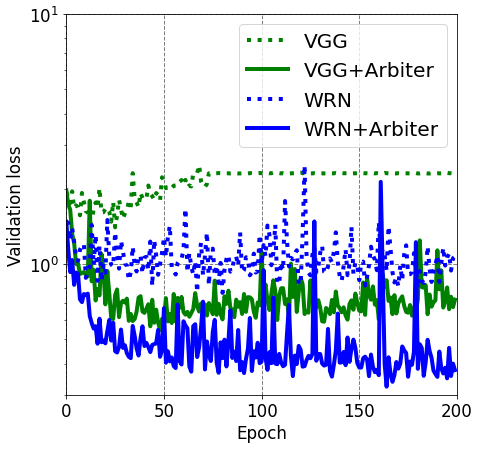

In [ ]:
next_path = os.path.join(root_path, 'ho/hyperparameter-optimisation/batch-size/experiments/neurIPS-exps/section1')

results_path1 = os.path.join(next_path, 'baseline_VGG_noisy')
results_path2 = os.path.join(next_path, 'baseline_WRN_noisy')
results_path3 = os.path.join(next_path, 'arbiter_VGG_noisy')
results_path4 = os.path.join(next_path, 'arbiter_WRN_noisy')

results_path5 = os.path.join(next_path, 'baseline_VGG_quiet')
results_path6 = os.path.join(next_path, 'baseline_WRN_quiet')
results_path7 = os.path.join(next_path, 'arbiter_VGG_quiet')
results_path8 = os.path.join(next_path, 'arbiter_WRN_quiet')

# train_vgg_noisy_base = np.loadtxt(os.path.join(results_path1, 'train_loss.txt'), unpack=True).astype(np.float)
# train_wrn_noisy_base = np.loadtxt(os.path.join(results_path2, 'train_loss.txt'), unpack=True).astype(np.float)
# train_vgg_noisy_arb = np.loadtxt(os.path.join(results_path3, 'train_loss.txt'), unpack=True).astype(np.float)
# train_wrn_noisy_arb = np.loadtxt(os.path.join(results_path4, 'train_loss.txt'), unpack=True).astype(np.float)

''' performance
'''
val_vgg_noisy_base = np.loadtxt(os.path.join(results_path1, 'val_loss.txt'), unpack=True).astype(float)
val_wrn_noisy_base = np.loadtxt(os.path.join(results_path2, 'val_loss.txt'), unpack=True).astype(float)
val_vgg_noisy_arb = np.loadtxt(os.path.join(results_path3, 'val_loss.txt'), unpack=True).astype(float)
val_wrn_noisy_arb = np.loadtxt(os.path.join(results_path4, 'val_loss.txt'), unpack=True).astype(float)

val_vgg_quiet_base = np.loadtxt(os.path.join(results_path5, 'val_loss.txt'), unpack=True).astype(float)
val_wrn_quiet_base = np.loadtxt(os.path.join(results_path6, 'val_loss.txt'), unpack=True).astype(float)
val_vgg_quiet_arb = np.loadtxt(os.path.join(results_path7, 'val_loss.txt'), unpack=True).astype(float)
val_wrn_quiet_arb = np.loadtxt(os.path.join(results_path8, 'val_loss.txt'), unpack=True).astype(float)

test_vgg_noisy_base = np.loadtxt(os.path.join(results_path1, 'test_loss.txt'), unpack=True).astype(float)
test_wrn_noisy_base = np.loadtxt(os.path.join(results_path2, 'test_loss.txt'), unpack=True).astype(float)
test_vgg_noisy_arb = np.loadtxt(os.path.join(results_path3, 'test_loss.txt'), unpack=True).astype(float)
test_wrn_noisy_arb = np.loadtxt(os.path.join(results_path4, 'test_loss.txt'), unpack=True).astype(float)

test_vgg_quiet_base = np.loadtxt(os.path.join(results_path5, 'test_loss.txt'), unpack=True).astype(float)
test_wrn_quiet_base = np.loadtxt(os.path.join(results_path6, 'test_loss.txt'), unpack=True).astype(float)
test_vgg_quiet_arb = np.loadtxt(os.path.join(results_path7, 'test_loss.txt'), unpack=True).astype(float)
test_wrn_quiet_arb = np.loadtxt(os.path.join(results_path8, 'test_loss.txt'), unpack=True).astype(float)

''' batch size 
'''
bs_vgg_noisy = np.loadtxt(os.path.join(results_path3, 'bse.txt'), unpack=True).astype(int)
bs_wrn_noisy = np.loadtxt(os.path.join(results_path4, 'bse.txt'), unpack=True).astype(int)
bs_const1 = np.full(200,40) 

bs_vgg_quiet = np.loadtxt(os.path.join(results_path7, 'bse.txt'), unpack=True).astype(int)
bs_wrn_quiet = np.loadtxt(os.path.join(results_path8, 'bse.txt'), unpack=True).astype(int)
bs_const2 = np.full(200,400) 

# F_nonstoch = np.loadtxt(os.path.join(results_path2, 'F.txt'), unpack=True).astype(np.float)
# F_stoch = np.loadtxt(os.path.join(results_path4, 'F.txt'), unpack=True).astype(np.float)

''' plot epoch level results (batch size, train/val loss)
'''
fig1, ax1 = plt.figure(figsize=(7,7)), plt.gca()
ax1.plot(bs_vgg_noisy, color='green', lw=4, label=r'')
ax1.plot(bs_wrn_noisy , color='blue', lw=4, label=r'')
ax1.plot(bs_const1, color='blue',lw=4, linestyle='dotted')
# ax1.plot(bs_vgg_quiet, color='green', lw=4, label=r'')
# ax1.plot(bs_wrn_quiet , color='blue', lw=4, label=r'')
# ax1.plot(bs_const2, color='blue',lw=4, linestyle='dotted')
plt.xlabel('Epoch')
plt.ylabel('Batch size')
plt.xlim([-10,200])
ax1.grid(color='gray', linewidth=1, linestyle='--')
# plt.savefig(os.path.join(next_path,'dotted_noisy_plots_BatchSize.eps'))

''' show both validation and test loss
'''
fig2,ax2 = plt.figure(figsize=(7,7)), plt.gca()
# ax2.plot(test_vgg_noisy_base, color='green', lw=3 , linestyle='dotted',label='VGG')
# ax2.plot(test_vgg_noisy_arb, color='green', lw=3,  linestyle='-', label='VGG+Arbiter')
# ax2.plot(test_wrn_noisy_base, color='blue', lw=3, linestyle='dotted' ,label='WRN')
# ax2.plot(test_wrn_noisy_arb, color='blue', lw=3, linestyle='-',label='WRN+Arbiter')
ax2.plot(val_vgg_noisy_base, color='green', lw=4 , linestyle='dotted',label='VGG')
ax2.plot(val_vgg_noisy_arb, color='green', lw=4,  linestyle='-', label='VGG+Arbiter')
ax2.plot(val_wrn_noisy_base, color='blue', lw=4, linestyle='dotted' ,label='WRN')
ax2.plot(val_wrn_noisy_arb, color='blue', lw=4, linestyle='-',label='WRN+Arbiter')
plt.xlabel('Epoch')
plt.ylabel('Validation loss')
plt.yscale('log')
plt.xlim([0,200])
plt.ylim([0.3,10])
plt.legend(loc='best')
ax2.grid(color='gray', which='major',linewidth=1, linestyle='--')
# plt.savefig(os.path.join(next_path,'dotted_noisy_plots_valLoss_log.eps'))





Calculate statistics

In [ ]:
print('VGG:')
print(min(val_vgg_noisy_base),  min(test_vgg_noisy_base))
print(min(val_vgg_noisy_arb),   min(test_vgg_noisy_arb))
print(min(val_vgg_quiet_base),  min(test_vgg_quiet_base))
print(min(val_vgg_quiet_arb),   min(test_vgg_quiet_arb))

print('WRN:')
print(min(val_wrn_noisy_base),  min(test_wrn_noisy_base))
print(min(val_wrn_noisy_arb),   min(test_wrn_noisy_arb))
print(min(val_wrn_quiet_base),  min(test_wrn_quiet_base))
print(min(val_wrn_quiet_arb),   min(test_wrn_quiet_arb))



VGG:
1.404274 1.351639
0.54447 0.548914
0.608061 0.602636
0.521576 0.546972
WRN:
0.767471 0.769654
0.323351 0.348604
0.521901 0.559976
0.40276 0.466404


## Experiment 2 (section 4.2): Smith heuristic

In [ ]:
import numpy as np

bs = [128, 142, 112, 105, 86, 105, 127, 104, 85, 103, 110, 84, 136, 110, 135, 136, 142, 183, 227, 183,
      239, 243, 238, 242, 248, 253, 277, 245, 321, 325, 275, 260, 298, 282, 288, 292, 323, 311, 293, 290,
      345, 294, 301, 305, 312, 355, 357, 311, 320, 363, 317, 379, 339, 339, 346, 331, 373, 346, 380, 348]
N = 40000

n = [int(np.ceil(N/b)) for b in bs]
print(n)
total = sum(n)
print(total)

total2 = 60*(np.ceil(N/128))
print(total2)

N_640 = int(np.ceil(N/640))

nArbiter_updates = list(np.concatenate([n, np.full(140,N_640)]))
nSmith_updates = list(np.concatenate([np.full(60,313), np.full(140,N_640)]))
print(nArbiter_updates)
print(nSmith_updates)
print(sum(nArbiter_updates),sum(nSmith_updates))

next_path = os.path.join(root_path, 'ho/hyperparameter-optimisation/batch-size/experiments/heuristics/smith-hybrid')

# SGD 
path1 = os.path.join(next_path1, 'heuristic/exp1')
path11 = os.path.join(next_path1, 'heuristic/exp2')
path111 = os.path.join(next_path1, 'heuristic/exp3')
path2 = os.path.join(next_path, 'arbiter/resetting-arbiter/removeSmithBatchSizeChange-1')
path3 = os.path.join(next_path, 'heuristic-B-scaled/B=128(ieC=1)')
path4 = os.path.join(next_path, 'heuristic-B-scaled/B=1280(ieC=10)/logs')
path5 = os.path.join(next_path, 'arbiter/9thMay_N=20_scheduleFirst60ThenSmith/exp1_may9')
path6 = os.path.join(next_path, 'arbiter/9thMay_N=20_scheduleFirst60ThenSmith/exp2_may10')
path7 = os.path.join(next_path, 'arbiter/9thMay_N=20_scheduleFirst60ThenSmith/exp3_may10')
path8 = os.path.join(next_path, 'arbiter/9thMay_N=20_scheduleFirst60ThenSmith/exp4_may10_best')

# Batch size results
s_constant1 = np.concatenate([np.full(60,128), np.full(140,1280)])
s_constant2 = np.full(200,128) 
s_sched = np.concatenate([np.full(60,128), np.full(140,640)])
s_pred = np.loadtxt(os.path.join(path2, 'bse.txt'), unpack=True).astype(int)
s_pred2 = np.concatenate([bs, np.full(140,640)])


''' Batch size plot
'''
fig1, ax1 = plt.figure(figsize=(7,7)), plt.gca()
# ax1.plot(s_constant1, color='green')
# ax1.plot(s_constant2, color='cyan')
# ax1.plot(s_pred, color='orange')
ax1.plot(s_pred2, color='#CC4F1B',  label=r'Heuristic [4] + Arbiter')
ax1.plot(s_sched, color='#1B2ACC',  label=r'Heuristic [4]')

plt.xlabel('Epoch')
plt.ylabel('Batch size')
ax1.grid(color='gray', linewidth=1, linestyle='--')
plt.legend(loc='best')
plt.savefig(os.path.join(next_path, 'GOOD-format-batchSize2.eps'))



''' Test accuracy
'''

# SGD 
path1    = os.path.join(next_path, 'heuristic/exp1')
path11   = os.path.join(next_path, 'heuristic/exp2')
path111  = os.path.join(next_path, 'heuristic/exp3')
path1111 = os.path.join(next_path, 'heuristic/exp4')
path2    = os.path.join(next_path, 'arbiter/9thMay_N=20_scheduleFirst60ThenSmith/exp1_may9')
path22   = os.path.join(next_path, 'arbiter/9thMay_N=20_scheduleFirst60ThenSmith/exp2_may10')
path222  = os.path.join(next_path, 'arbiter/9thMay_N=20_scheduleFirst60ThenSmith/exp3_may10')
path2222 = os.path.join(next_path, 'arbiter/9thMay_N=20_scheduleFirst60ThenSmith/exp4_may10_best')

# test accuracy
test_acc1    = np.loadtxt(os.path.join(path1, 'test_acc.txt'), unpack=True).astype(float)
test_acc11   = np.loadtxt(os.path.join(path11, 'test_acc.txt'), unpack=True).astype(float)
test_acc111  = np.loadtxt(os.path.join(path111, 'test_acc.txt'), unpack=True).astype(float)
test_acc1111 = np.loadtxt(os.path.join(path1111, 'test_acc.txt'), unpack=True).astype(float)
test_acc2    = np.loadtxt(os.path.join(path2, 'test_acc.txt'), unpack=True).astype(float)
test_acc22   = np.loadtxt(os.path.join(path22, 'test_acc.txt'), unpack=True).astype(float)
test_acc222  = np.loadtxt(os.path.join(path222, 'test_acc.txt'), unpack=True).astype(float)
test_acc2222 = np.loadtxt(os.path.join(path2222, 'test_acc.txt'), unpack=True).astype(float)

avg_smith_test_acc, std_smith_test_acc = [], []
avg_arb_test_acc, std_arb_test_acc = [], []

for i in range(len(test_acc1)):
    avg_smith_test_acc.append(np.mean([test_acc1[i], test_acc11[i], test_acc111[i], test_acc1111[i]]))
    std_smith_test_acc.append(np.std( [test_acc1[i], test_acc11[i], test_acc111[i], test_acc1111[i]]))    
    avg_arb_test_acc.append(np.mean([  test_acc2[i], test_acc22[i], test_acc222[i], test_acc2222[i]]))
    std_arb_test_acc.append(np.std([   test_acc2[i], test_acc22[i], test_acc222[i], test_acc2222[i]]))

avg_smith = np.array(avg_smith_test_acc)
std_smith = np.array(std_smith_test_acc)
avg_arb = np.array(avg_arb_test_acc)
std_arb = np.array(std_arb_test_acc)

''' Test accuracy
'''
x = np.linspace(0,200,200)
figmean, axmean  = plt.figure(figsize=(7,7)), plt.gca()
plt.plot(avg_smith, color='#1B2ACC',   lw=2, label=r'Heuristic')
plt.fill_between(x, avg_smith-std_smith, avg_smith+std_smith, alpha=0.6, facecolor='#089FFF')
plt.plot(avg_arb,   color='#CC4F1B',   lw=2,  label=r'Arbiter+Heuristic')
plt.fill_between(x, avg_arb-std_arb, avg_arb+std_arb, alpha=0.6, facecolor='#FF9848')
plt.ylim([45,95])
plt.xlabel('Epoch')
plt.ylabel('Test accuracy')
# plt.legend(loc='best')
axmean.grid(color='gray', linewidth=1, linestyle='--')
#
ax11 = plt.axes([0,0,1,1])
# Manually set the position and relative size of the inset axes within ax1
ip = InsetPosition(ax1, [0.35,0.14,0.605,0.5])
ax11.set_axes_locator(ip)
ax11.plot(x_smith_updates, avg_smith,  lw=2, color='#1B2ACC')
ax11.plot(x_arbiter_updates, avg_arb, lw=2,  color='#CC4F1B')
# ax11.set_ylim([45,95])
ax11.set_xlim([0,28500])
# ax11.set_xscale('log')
ax11.set_xlabel('Parameter updates')
ax11.grid(color='gray', linewidth=1, linestyle='--')
# plt.legend(loc='best')
plt.savefig(os.path.join(next_path, 'prac-smith+arbiter_DONE.eps'))



## Experiment 3 (section 4.3): HD

In [ ]:
next_path = os.path.join(root_path, 'ho/batch-size/experiments')

# SGD 
sgd_path1 = os.path.join(next_path, 'section2/WRN/SGDm/hd/sgdhd(beta=1e-4)')
# sgd_path2 = os.path.join(next_path, 'section2/WRN/SGD/arbiter/sgdhd(beta=1e-6)+arbiter(a=1e-5,p=1e-6)/logs')
# sgd_path1 = os.path.join(next_path, 'section2/WRN/SGDm/hd/sgdhd(n=0.01)/logs')
# sgd_path2 = os.path.join(next_path, 'section2/WRN/SGDm/arbiter/sgdhd+bs(n=0.01)/logs')
sgd_path2 = os.path.join(next_path, 'section2/WRN/SGDm/arbiter/sgdhd(beta=1e-4)+arbiter(a=1e-3,p=1e-5)/logs')
# results_path3 = os.path.join(root_path, 'experiments/section1/arch/non-stochastic/VGG/none')
# results_path4 = os.path.join(root_path, 'experiments/section1/arch/non-stochastic/VGG/scheduler_phi-lr=1e-5')# results_path1 = os.path.join(root_path, 'experiments/section1/arch/stochastic/VGG11/bs-scheduler-high-phi-lr')

# Adam
# adam_path1 = os.path.join(next_path, 'section2/WRN/Adam/hd/other/adamhd-beta=1e-8/logs')
adam_path1 = os.path.join(next_path, 'section2/WRN/Adam/hd/adamHD_n=0.1_b=1e-4/logs')
adam_path2 = os.path.join(next_path, 'section2/WRN/Adam/arbiter/adamHD(n=0.1,beta=1e-4)+arbiter/logs')
# adam_path2 = os.path.join(next_path, 'section2/WRN/Adam/arbiter/appendix/(maybeUSE)adamHD(b=1e-8)+arbiter(a=2.5e-3,p=1e-5)/logs')
# results_path7 = os.path.join(root_path, 'experiments/section1/arch/non-stochastic/WRN/none')
# results_path8 = os.path.join(root_path, 'experiments/section1/arch/non-stochastic/WRN/scheduler_phi-lr=1e-5')# results_path1 = os.path.join(root_path, 'experiments/section1/arch/stochastic/VGG11/bs-scheduler-high-phi-lr')


# validation loss
val_loss1 = np.loadtxt(os.path.join(sgd_path1, 'val_loss.txt'), unpack=True).astype(np.float)
val_loss2 = np.loadtxt(os.path.join(sgd_path2, 'val_loss.txt'), unpack=True).astype(np.float)
test_loss1 = np.loadtxt(os.path.join(sgd_path1, 'test_loss.txt'), unpack=True).astype(np.float)
test_loss2 = np.loadtxt(os.path.join(sgd_path2, 'test_loss.txt'), unpack=True).astype(np.float)

val_loss3 = np.loadtxt(os.path.join(adam_path1, 'val_loss.txt'), unpack=True).astype(np.float)
val_loss4 = np.loadtxt(os.path.join(adam_path2, 'val_loss.txt'), unpack=True).astype(np.float)
test_loss3 = np.loadtxt(os.path.join(adam_path1, 'test_loss.txt'), unpack=True).astype(np.float)
test_loss4 = np.loadtxt(os.path.join(adam_path2, 'test_loss.txt'), unpack=True).astype(np.float)

# training loss
train_loss1 = np.loadtxt(os.path.join(sgd_path1, 'train_loss.txt'), unpack=True).astype(np.float)
train_loss2 = np.loadtxt(os.path.join(sgd_path2, 'train_loss.txt'), unpack=True).astype(np.float)
train_loss3 = np.loadtxt(os.path.join(adam_path1, 'train_loss.txt'), unpack=True).astype(np.float)
train_loss4 = np.loadtxt(os.path.join(adam_path2, 'train_loss.txt'), unpack=True).astype(np.float)
# wrn

# Batch size results
s_pred_sgd = np.loadtxt(os.path.join(sgd_path2, 'bse.txt'), unpack=True).astype(np.int)
s_pred_adam = np.loadtxt(os.path.join(adam_path2, 'bse.txt'), unpack=True).astype(np.int)
# s_actual6 = np.loadtxt(os.path.join(results_path5, 'batch_size_epoch.txt'), unpack=True).astype(np.int)
# s_actual8 = np.loadtxt(os.path.join(results_path8, 'batch_size_epoch.txt'), unpack=True).astype(np.int)
s_constant = np.full(len(s_pred_sgd),128) 

# Learning rate 
lr_sgdhd = np.loadtxt(os.path.join(sgd_path1, 'lr_epoch.txt'), unpack=True).astype(np.float)
# lr_sgdhd_bs = np.append(0.1,np.loadtxt(os.path.join(sgd_path2, 'lr_epoch.txt'), unpack=True).astype(np.float))
lr_sgdhd_bs = np.loadtxt(os.path.join(sgd_path2, 'lr_epoch.txt'), unpack=True).astype(np.float)
lr_adamhd = np.loadtxt(os.path.join(adam_path1, 'lr_epoch.txt'), unpack=True).astype(np.float)
lr_adamhd_bs = np.loadtxt(os.path.join(adam_path2, 'lr_epoch.txt'), unpack=True).astype(np.float)

# hypergradient
# h_sgdhd = np.loadtxt(os.path.join(sgd_path1, 'h.txt'), unpack=True).astype(np.float)
# h_sgdhd_bs = np.loadtxt(os.path.join(sgd_path2, 'h.txt'), unpack=True).astype(np.float)
# h_adamhd = np.loadtxt(os.path.join(adam_path1, 'h.txt'), unpack=True).astype(np.float)
# h_adamhd_bs = np.loadtxt(os.path.join(adam_path2, 'h.txt'), unpack=True).astype(np.float)

# lr iteration
lrit_sgdhd = np.loadtxt(os.path.join(sgd_path1, 'lr_iter.txt'), unpack=True).astype(np.float)
lrit_sgdhd_bs = np.loadtxt(os.path.join(sgd_path2, 'lr_iter.txt'), unpack=True).astype(np.float)
lrit_adamhd = np.loadtxt(os.path.join(adam_path1, 'lr_iter.txt'), unpack=True).astype(np.float)
lrit_adamhd_bs = np.loadtxt(os.path.join(adam_path2, 'lr_iter.txt'), unpack=True).astype(np.float)
lrit_adamhd2 = np.append(0.1,np.array([lrit_adamhd[i] for i in range(len(lrit_adamhd)) if i%46==0]))
lrit_adamhd2_bs = np.append(0.1,np.array([lrit_adamhd_bs[i] for i in range(len(lrit_adamhd_bs)) if i%46==0]))


''' Batch size plot
'''
fig1, ax1 = plt.figure(figsize=(7,7)), plt.gca()
ax1.plot(s_pred_sgd, color='b', lw=2)
ax1.plot(s_pred_adam, color='g', lw=2)
ax1.plot(s_constant, color='cyan', lw=2)
plt.xlabel('Epoch')
plt.ylabel('Batch size')

''' Learning rate plot 
'''
fig2, ax2 = plt.figure(figsize=(7,7)), plt.gca()
ax2.plot(lr_sgdhd, color='cyan',lw=2)
ax2.plot(lr_sgdhd_bs, color='b',lw=2)
ax2.plot(lr_adamhd, color='lime', lw=2)
ax2.plot(lr_adamhd_bs, color='g', lw=2)
# ax2.axvline(x=1,color='r')
plt.xlabel('Epoch')
plt.ylabel(r'$\eta$')
# ax2.set_yscale('log')
# first plot
ax2a = plt.axes([0,0,1,1],label='a')
ip1 = InsetPosition(ax2, [0.45,0.65,0.53,0.3])
ax2a.set_axes_locator(ip1)
ax2a.plot(lrit_sgdhd[:10000], c='cyan', lw=2, alpha=1)
ax2a.plot(lrit_sgdhd_bs[:10000], c='b', lw=2, alpha=1)
ax2a.plot(lrit_adamhd2[:10000], c='lime', lw=2, alpha=1)
ax2a.plot(lrit_adamhd2_bs[:10000], c='g', lw=2, alpha=1)
# ax2a.plot(lrit_adamhd[:10000], c='lime', lw=2, alpha=1)
# ax2a.plot(lrit_adamhd_bs[:10000], c='g', lw=2, alpha=1)
ax2a.axvline(x=313,color='r')
# ax2a.plot(h_adamhd, c='lightgreen', lw=2, alpha=1)
# ax2a.plot(h_adamhd_bs, c='g', lw=2, alpha=1)
ax2a.set_xscale('log')
# ax2a.set_ylim(bottom=0.00035,top=0.001)
# ax2a.set_yscale('symlog')
ax2a.set_xlabel('Iteration')
ax2a.set_ylabel(r'$\eta$')
# plt.savefig(os.path.join(next_path, 'vanilla-sgdhd(n=0.1)-learningRate.eps'))


''' Validation loss
'''
fig3,ax3 = plt.figure(figsize=(7,7)), plt.gca()
ax3.plot(val_loss1, color='cyan', lw=2)
ax3.plot(val_loss2, color='b', lw=2)
# ax3.set_yscale('log')
ax3.plot(val_loss3 , color='lime', lw=2)
ax3.plot(val_loss4, color='g', lw=2)
plt.xlabel('Epoch')
plt.ylabel('Validation loss')
# plt.legend(loc='best')
# plt.savefig(os.path.join(next_path, 'vanilla-sgdhd(n=0.1)-valLoss.eps'))

''' Training loss
'''
fig4,ax4 = plt.figure(figsize=(7,7)), plt.gca()
ax4.plot(train_loss1, color='cyan', lw=2, label=r'SGDHD')
ax4.plot(train_loss2, color='b', lw=2, label=r'SGDHD+Arbiter')
ax4.plot(train_loss3, color='lime', lw=2, label=r'AdamHD')
ax4.plot(train_loss4, color='g', lw=2, label=r'AdamHD+Arbiter')
plt.xlabel('Epoch')
plt.ylabel('Training loss')
plt.legend(loc='best')
# plt.savefig(os.path.join(next_path, 'vanilla-sgdhd(n=0.1)-trainLoss.eps'))


## Rebuttal
This is for answering the reviewer about whether allowing Arbiter to schedule the batch size after 60th epoch has a poor effect on generalisation. I show here that it doesnt. I also want to study whether Arbiter in fact gets the inner weights into a region of flatter curvature (since the batch size is lower).

In [29]:

print('batch sizes:')
print(np.mean([s_pred2[2-1], s_pred22[2-1], s_pred222[2-1]]), np.std([s_pred2[2-1], s_pred22[2-1], s_pred222[2-1]]))
print(np.mean([s_pred2[25-1], s_pred22[25-1], s_pred222[25-1]]), np.std([s_pred2[2-1], s_pred22[2-1], s_pred222[2-1]]))
print(np.mean([s_pred2[50-1], s_pred22[50-1], s_pred222[50-1]]))
print(np.mean([s_pred2[75-1], s_pred22[75-1], s_pred222[75-1]]))
print(np.mean([s_pred2[100-1], s_pred22[100-1], s_pred222[100-1]]))
print(np.mean([s_pred2[125-1], s_pred22[125-1], s_pred222[125-1]]))
print(np.mean([s_pred2[150-1], s_pred22[150-1], s_pred222[150-1]]))
print(np.mean([s_pred2[175-1], s_pred22[175-1], s_pred222[175-1]]))
print(np.mean([s_pred2[200-1], s_pred22[200-1], s_pred222[200-1]]))


batch sizes:
167.0 5.715476066494082
308.6666666666667
316.3333333333333
339.3333333333333
378.0
387.0
415.0
424.6666666666667
432.6666666666667


batch sizes:
167.0
316.3333333333333
93.83 94.14 94.12
93.87 93.8 94.09
epoch 50:
81.99000000000001 2.0323877582784244
87.36666666666667 1.050914945284456
epoch 125:
88.97000000000001 0.5355993527504168
88.29666666666667 1.1643691663538511
epoch 150:
93.82000000000001 0.2092844953645653
93.64999999999999 0.21648710508172736
epoch 175:
93.89999999999999 0.10198039027185306
93.50999999999999 0.13735598518691242
epoch 200:
93.90666666666665 0.12657891697364695
93.52666666666669 0.27776888874666167


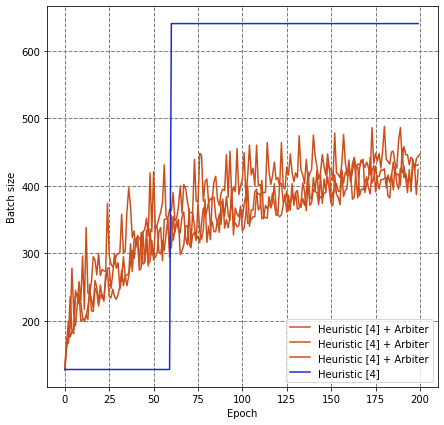

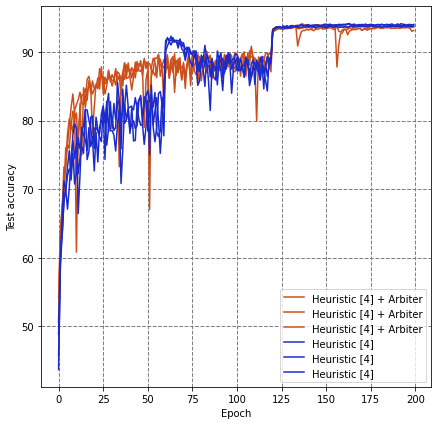

In [20]:
import numpy as np

# N_640 = int(np.ceil(N/640))

# nArbiter_updates = list(np.concatenate([n, np.full(140,N_640)]))
# nSmith_updates = list(np.concatenate([np.full(60,313), np.full(140,N_640)]))
# print(nArbiter_updates)
# print(nSmith_updates)
# print(sum(nArbiter_updates),sum(nSmith_updates))

next_path = os.path.join(root_path, 'ho/hyperlearning/batch-size/experiments/rebuttal_Smith+arbiter')

path1 = os.path.join(next_path,     'smith_all-weights_exp1/logs')
path11 = os.path.join(next_path,    'smith_no-weights_exp2/logs')
path111 = os.path.join(next_path,   'smith_no-weights_exp3/logs')
path2 = os.path.join(next_path,     'arb+smith_all-weights_exp1/logs')
path22 = os.path.join(next_path,    'arb+smith_no-weights_exp2/logs')
path222 = os.path.join(next_path,   'arb+smith_all-weights_exp3/logs')


# Batch size results
s_heuristic = np.concatenate([np.full(60,128), np.full(140,640)])
s_pred2 = np.loadtxt(os.path.join(path2, 'bse.txt'), unpack=True).astype(int)
# s_pred2 = s_pred2[1::2]
s_pred22 = np.loadtxt(os.path.join(path22, 'bse.txt'), unpack=True).astype(int)
s_pred22 = s_pred22[1::2]
s_pred222 = np.loadtxt(os.path.join(path222, 'bse.txt'), unpack=True).astype(int)
s_pred222 = s_pred222[1::2]

print('batch sizes:')
print(np.mean([s_pred2[2-1], s_pred22[2-1], s_pred222[2-1]]))
print(np.mean([s_pred2[50-1], s_pred22[50-1], s_pred222[50-1]]))

''' Batch size plot
'''
fig1, ax1 = plt.figure(figsize=(7,7)), plt.gca()
ax1.plot(s_pred2, color='#CC4F1B',  label=r'Heuristic [4] + Arbiter')
ax1.plot(s_pred22, color='#CC4F1B',  label=r'Heuristic [4] + Arbiter')
ax1.plot(s_pred222, color='#CC4F1B',  label=r'Heuristic [4] + Arbiter')
ax1.plot(s_heuristic, color='#1B2ACC',  label=r'Heuristic [4]')
plt.xlabel('Epoch')
plt.ylabel('Batch size')
ax1.grid(color='gray', linewidth=1, linestyle='--')
plt.legend(loc='best')
# plt.savefig(os.path.join(next_path, 'GOOD-format-batchSize2.eps'))


''' Test accuracy
'''
# test accuracy
test_acc1    = np.loadtxt(os.path.join(path1, 'test_acc.txt'), unpack=True).astype(float)
test_acc11   = np.loadtxt(os.path.join(path11, 'test_acc.txt'), unpack=True).astype(float)
test_acc111  = np.loadtxt(os.path.join(path111, 'test_acc.txt'), unpack=True).astype(float)
test_acc2    = np.loadtxt(os.path.join(path2, 'test_acc.txt'), unpack=True).astype(float)
test_acc22   = np.loadtxt(os.path.join(path22, 'test_acc.txt'), unpack=True).astype(float)
test_acc222  = np.loadtxt(os.path.join(path222, 'test_acc.txt'), unpack=True).astype(float)
print(np.max(test_acc1), np.max(test_acc11),np.max(test_acc111))
print(np.max(test_acc2), np.max(test_acc22),np.max(test_acc222))

avg_smith_test_acc, std_smith_test_acc = [], []
avg_arb_test_acc, std_arb_test_acc = [], []

for i in range(len(test_acc1)):
    avg_smith_test_acc.append(np.mean([test_acc1[i], test_acc11[i], test_acc111[i]]))
    std_smith_test_acc.append(np.std( [test_acc1[i], test_acc11[i], test_acc111[i]]))    
    avg_arb_test_acc.append(np.mean([  test_acc2[i], test_acc22[i], test_acc222[i]]))
    std_arb_test_acc.append(np.std([   test_acc2[i], test_acc22[i], test_acc222[i]]))

avg_smith = np.array(avg_smith_test_acc)
std_smith = np.array(std_smith_test_acc)
avg_arb = np.array(avg_arb_test_acc)
std_arb = np.array(std_arb_test_acc)

# get results at epochs 50, 125, 175
print('epoch 50:')
print(avg_smith[50-1], std_smith[50-1])
print(avg_arb[50-1], std_arb[50-1])
print('epoch 125:')
print(avg_smith[100-1], std_smith[100-1])
print(avg_arb[100-1], std_arb[100-1])
print('epoch 150:')
print(avg_smith[150-1], std_smith[150-1])
print(avg_arb[150-1], std_arb[150-1])
print('epoch 175:')
print(avg_smith[175-1], std_smith[175-1])
print(avg_arb[175-1], std_arb[175-1])
print('epoch 200:')
print(avg_smith[200-1], std_smith[200-1])
print(avg_arb[200-1], std_arb[200-1])

''' Test accuracy
'''
fig2, ax2 = plt.figure(figsize=(7,7)), plt.gca()
ax2.plot(test_acc2, color='#CC4F1B',  label=r'Heuristic [4] + Arbiter')
ax2.plot(test_acc22, color='#CC4F1B',  label=r'Heuristic [4] + Arbiter')
ax2.plot(test_acc222, color='#CC4F1B',  label=r'Heuristic [4] + Arbiter')
ax2.plot(test_acc1, color='#1B2ACC',  label=r'Heuristic [4]')
ax2.plot(test_acc11, color='#1B2ACC',  label=r'Heuristic [4]')
ax2.plot(test_acc111, color='#1B2ACC',  label=r'Heuristic [4]')
plt.xlabel('Epoch')
plt.ylabel('Test accuracy')
ax2.grid(color='gray', linewidth=1, linestyle='--')
plt.legend(loc='best')
# plt.savefig(os.path.join(next_path, 'GOOD-format-batchSize2.eps'))



# x = np.linspace(0,200,200)
# figmean, axmean  = plt.figure(figsize=(7,7)), plt.gca()
# plt.plot(avg_smith, color='#1B2ACC',   lw=2, label=r'Heuristic')
# plt.fill_between(x, avg_smith-std_smith, avg_smith+std_smith, alpha=0.6, facecolor='#089FFF')
# plt.plot(avg_arb,   color='#CC4F1B',   lw=2,  label=r'Arbiter+Heuristic')
# plt.fill_between(x, avg_arb-std_arb, avg_arb+std_arb, alpha=0.6, facecolor='#FF9848')
# plt.ylim([45,95])
# plt.xlabel('Epoch')
# plt.ylabel('Test accuracy')
# # plt.legend(loc='best')
# axmean.grid(color='gray', linewidth=1, linestyle='--')
# # #
# ax11 = plt.axes([0,0,1,1])
# # Manually set the position and relative size of the inset axes within ax1
# ip = InsetPosition(ax1, [0.35,0.14,0.605,0.5])
# ax11.set_axes_locator(ip)
# ax11.plot(x_smith_updates, avg_smith,  lw=2, color='#1B2ACC')
# ax11.plot(x_arbiter_updates, avg_arb, lw=2,  color='#CC4F1B')
# # ax11.set_ylim([45,95])
# ax11.set_xlim([0,28500])
# # ax11.set_xscale('log')
# ax11.set_xlabel('Parameter updates')
# ax11.grid(color='gray', linewidth=1, linestyle='--')
# # plt.legend(loc='best')
# plt.savefig(os.path.join(next_path, 'prac-smith+arbiter_DONE.eps'))



## NeurIPS results (Appendix)

E.1. Hyperparameter configs for CIFAR10

In [ ]:
next_path = os.path.join(root_path, 'ho/hyperparameter-optimisation/batch-size/experiments/neurIPS-exps/appendix/E-additional-results/E1-hyper-configs-CIFAR10')

results_path1 = os.path.join(next_path, 'stochastic/VGG11/baseline_VGG_noisy_n=01_B=128')
results_path2 = os.path.join(next_path, 'stochastic/WRN164/baseline_WRN_noisy_n=01_B=128')
results_path3 = os.path.join(next_path, 'stochastic/VGG11/arbiter_VGG_noisy_n=01_B=128')
results_path4 = os.path.join(next_path, 'stochastic/WRN164/arbiter_WRN_noisy_n=01_B=128')

results_path5 = os.path.join(next_path, 'non-stochastic/VGG11/baseline_VGG_quiet_n=001_B=400/logs')
results_path6 = os.path.join(next_path, 'non-stochastic/WRN164/baseline_WRN_quiet_n=001_B=400')
results_path7 = os.path.join(next_path, 'non-stochastic/VGG11/arbiter_VGG_quiet_n=001_B=400/logs')
results_path8 = os.path.join(next_path, 'non-stochastic/WRN164/arbiter_WRN_quiet_n=001_B=400')

results_path11 = os.path.join(next_path, 'stochastic/VGG11/baseline_VGG_noisy_n=02_B=80')
results_path22 = os.path.join(next_path, 'stochastic/WRN164/baseline_WRN_noisy_n=02_B=80')
results_path33 = os.path.join(next_path, 'stochastic/VGG11/arbiter_VGG_noisy_n=02_B=80')
results_path44 = os.path.join(next_path, 'stochastic/WRN164/arbiter_WRN_noisy_n=02_B=80')

''' performance
'''
val_vgg_noisy_base = np.loadtxt(os.path.join(results_path1, 'val_loss.txt'), unpack=True).astype(float)
val_wrn_noisy_base = np.loadtxt(os.path.join(results_path2, 'val_loss.txt'), unpack=True).astype(float)
val_vgg_noisy_arb = np.loadtxt(os.path.join(results_path3, 'val_loss.txt'), unpack=True).astype(float)
val_wrn_noisy_arb = np.loadtxt(os.path.join(results_path4, 'val_loss.txt'), unpack=True).astype(float)

val_vgg_quiet_base = np.loadtxt(os.path.join(results_path5, 'val_loss.txt'), unpack=True).astype(float)
val_wrn_quiet_base = np.loadtxt(os.path.join(results_path6, 'val_loss.txt'), unpack=True).astype(float)
val_vgg_quiet_arb = np.loadtxt(os.path.join(results_path7, 'val_loss.txt'), unpack=True).astype(float)
val_wrn_quiet_arb = np.loadtxt(os.path.join(results_path8, 'val_loss.txt'), unpack=True).astype(float)

val_vgg_noisy_base2 = np.loadtxt(os.path.join(results_path11, 'val_loss.txt'), unpack=True).astype(float)
val_wrn_noisy_base2 = np.loadtxt(os.path.join(results_path22, 'val_loss.txt'), unpack=True).astype(float)
val_vgg_noisy_arb2 = np.loadtxt(os.path.join(results_path33, 'val_loss.txt'), unpack=True).astype(float)
val_wrn_noisy_arb2 = np.loadtxt(os.path.join(results_path44, 'val_loss.txt'), unpack=True).astype(float)


test_vgg_noisy_base = np.loadtxt(os.path.join(results_path1, 'test_loss.txt'), unpack=True).astype(float)
test_wrn_noisy_base = np.loadtxt(os.path.join(results_path2, 'test_loss.txt'), unpack=True).astype(float)
test_vgg_noisy_arb = np.loadtxt(os.path.join(results_path3, 'test_loss.txt'), unpack=True).astype(float)
test_wrn_noisy_arb = np.loadtxt(os.path.join(results_path4, 'test_loss.txt'), unpack=True).astype(float)

test_vgg_quiet_base = np.loadtxt(os.path.join(results_path5, 'test_loss.txt'), unpack=True).astype(float)
test_wrn_quiet_base = np.loadtxt(os.path.join(results_path6, 'test_loss.txt'), unpack=True).astype(float)
test_vgg_quiet_arb = np.loadtxt(os.path.join(results_path7, 'test_loss.txt'), unpack=True).astype(float)
test_wrn_quiet_arb = np.loadtxt(os.path.join(results_path8, 'test_loss.txt'), unpack=True).astype(float)

test_vgg_noisy_base2 = np.loadtxt(os.path.join(results_path11, 'test_loss.txt'), unpack=True).astype(float)
test_wrn_noisy_base2 = np.loadtxt(os.path.join(results_path22, 'test_loss.txt'), unpack=True).astype(float)
test_vgg_noisy_arb2 = np.loadtxt(os.path.join(results_path33, 'test_loss.txt'), unpack=True).astype(float)
test_wrn_noisy_arb2 = np.loadtxt(os.path.join(results_path44, 'test_loss.txt'), unpack=True).astype(float)

''' batch size 
'''
bs_vgg_noisy = np.loadtxt(os.path.join(results_path3, 'batch_size_epoch.txt'), unpack=True).astype(int)
bs_wrn_noisy = np.loadtxt(os.path.join(results_path4, 'batch_size_epoch.txt'), unpack=True).astype(int)
bs_const1 = np.full(200,40) 

bs_vgg_quiet = np.loadtxt(os.path.join(results_path7, 'batch_size_epoch.txt'), unpack=True).astype(int)
bs_wrn_quiet = np.loadtxt(os.path.join(results_path8, 'batch_size_epoch.txt'), unpack=True).astype(int)
bs_const2 = np.full(200,400) 

bs_vgg_noisy2 = np.loadtxt(os.path.join(results_path33, 'bse.txt'), unpack=True).astype(int)
bs_wrn_noisy2 = np.loadtxt(os.path.join(results_path44, 'bse.txt'), unpack=True).astype(int)
bs_const1 = np.full(200,80) 

# F_nonstoch = np.loadtxt(os.path.join(results_path2, 'F.txt'), unpack=True).astype(np.float)
# F_stoch = np.loadtxt(os.path.join(results_path4, 'F.txt'), unpack=True).astype(np.float)

''' plot epoch level results (batch size, train/val loss)
'''
fig1, ax1 = plt.figure(figsize=(7,7)), plt.gca()
ax1.plot(bs_vgg_noisy2, color='green', lw=4, label=r'')
ax1.plot(bs_wrn_noisy2, color='blue', lw=4, label=r'')
ax1.plot(bs_const1, color='blue',lw=4, linestyle='dotted')
# ax1.plot(bs_vgg_quiet, color='green', lw=4, label=r'')
# ax1.plot(bs_wrn_quiet , color='blue', lw=4, label=r'')
# ax1.plot(bs_const2, color='blue',lw=4, linestyle='dotted')
plt.xlabel('Epoch')
plt.ylabel('Batch size')
plt.xlim([-10,200])
ax1.grid(color='gray', linewidth=1, linestyle='--')
# plt.savefig(os.path.join(next_path,'appendix_noisy_n=02_B=80_BatchSize.eps'))

''' show both validation and test loss
'''
fig2,ax2 = plt.figure(figsize=(7,7)), plt.gca()
ax2.plot(val_vgg_noisy_base2, color='green', lw=4 , linestyle='dotted',label='VGG')
ax2.plot(val_vgg_noisy_arb2, color='green', lw=2,  linestyle='-', label='VGG+Arbiter')
ax2.plot(val_wrn_noisy_base2, color='blue', lw=4, linestyle='dotted' ,label='WRN')
ax2.plot(val_wrn_noisy_arb2, color='blue', lw=2, linestyle='-',label='WRN+Arbiter')
# ax2.plot(val_vgg_quiet_base, color='green', lw=4 , linestyle='dotted',label='VGG')
# ax2.plot(val_vgg_quiet_arb, color='green', lw=2,  linestyle='-', label='VGG+Arbiter')
# ax2.plot(val_wrn_quiet_base, color='blue', lw=4, linestyle='dotted' ,label='WRN')
# ax2.plot(val_wrn_quiet_arb, color='blue', lw=2, linestyle='-',label='WRN+Arbiter')
plt.xlabel('Epoch')
plt.ylabel('Validation loss')
plt.yscale('log')
plt.xlim([0,200])
plt.ylim([0.3,30])
plt.legend(loc='best')
ax2.grid(color='gray', which='major',linewidth=1, linestyle='--')
# plt.savefig(os.path.join(next_path,'appendix_noisy_n=02_B=80_valLoss.eps'))



In [ ]:
print('VGG:')
print(min(val_vgg_noisy_base),  min(test_vgg_noisy_base))
print(min(val_vgg_noisy_arb),   min(test_vgg_noisy_arb))
print(min(val_vgg_noisy_base2), min(test_vgg_noisy_base2))
print(min(val_vgg_noisy_arb2),  min(test_vgg_noisy_arb2))
print(min(val_vgg_quiet_base),  min(test_vgg_quiet_base))
print(min(val_vgg_quiet_arb),   min(test_vgg_quiet_arb))

print('WRN:')
print(min(val_wrn_noisy_base),  min(test_wrn_noisy_base))
print(min(val_wrn_noisy_arb),   min(test_wrn_noisy_arb))
print(min(val_wrn_noisy_base2), min(test_wrn_noisy_base2))
print(min(val_wrn_noisy_arb2),  min(test_wrn_noisy_arb2))
print(min(val_wrn_quiet_base),  min(test_wrn_quiet_base))
print(min(val_wrn_quiet_arb),   min(test_wrn_quiet_arb))



VGG:
0.506703 0.489992
0.472389 0.456313
0.932521 0.872907
0.518078 0.499627
0.531427 0.518201
0.487208 0.497007
WRN:
0.416229 0.404855
0.301583 0.329745
0.722003 0.705741
0.389162 0.388228
0.342983 0.367697
0.295173 0.34429


In [ ]:
next_path = os.path.join(root_path, 'ho/hyperparameter-optimisation/batch-size/experiments')

results_path1 = os.path.join(next_path, 'section1/arch/non-stochastic/VGG11/none/logs')
results_path2 = os.path.join(next_path, 'section1/arch/non-stochastic/VGG11/scheduler_phi-lr=1e-4/logs')
results_path3 = os.path.join(next_path, 'section1/arch/stochastic/VGG11/none')
results_path4 = os.path.join(next_path, 'section1/arch/stochastic/VGG11/scheduler_phi-lr=1e-4')

ns_tl_none = np.loadtxt(os.path.join(results_path1, 'train_loss.txt'), unpack=True).astype(np.float)
ns_tl_sched = np.loadtxt(os.path.join(results_path2, 'train_loss.txt'), unpack=True).astype(np.float)
s_tl_none = np.loadtxt(os.path.join(results_path3, 'train_loss.txt'), unpack=True).astype(np.float)
s_tl_sched = np.loadtxt(os.path.join(results_path4, 'train_loss.txt'), unpack=True).astype(np.float)

ns_vl_none = np.loadtxt(os.path.join(results_path1, 'val_loss.txt'), unpack=True).astype(np.float)
ns_vl_sched = np.loadtxt(os.path.join(results_path2, 'val_loss.txt'), unpack=True).astype(np.float)
s_vl_none = np.loadtxt(os.path.join(results_path3, 'val_loss.txt'), unpack=True).astype(np.float)
s_vl_sched = np.loadtxt(os.path.join(results_path4, 'val_loss.txt'), unpack=True).astype(np.float)


ns_test_none = np.loadtxt(os.path.join(results_path1, 'test_loss.txt'), unpack=True).astype(np.float)
ns_test_sched = np.loadtxt(os.path.join(results_path2, 'test_loss.txt'), unpack=True).astype(np.float)
s_test_none = np.loadtxt(os.path.join(results_path3, 'test_loss.txt'), unpack=True).astype(np.float)
s_test_sched = np.loadtxt(os.path.join(results_path4, 'test_loss.txt'), unpack=True).astype(np.float)

bs_nonstoch = np.loadtxt(os.path.join(results_path2, 'batch_size_epoch.txt'), unpack=True).astype(np.int)
s_constant_nonstoch = np.full(len(bs_nonstoch),400)
bs_stoch = np.loadtxt(os.path.join(results_path4, 'batch_size_epoch.txt'), unpack=True).astype(np.int)
s_constant_stoch = np.full(len(bs_stoch),128) 

F_nonstoch = np.loadtxt(os.path.join(results_path2, 'F.txt'), unpack=True).astype(np.float)
F_stoch = np.loadtxt(os.path.join(results_path4, 'F.txt'), unpack=True).astype(np.float)

''' plot epoch level results (batch size, train/val loss)
'''
fig1, ax1 = plt.figure(figsize=(7,7)), plt.gca()
ax1.plot(bs_nonstoch, color='green', lw=2, label=r'')
ax1.plot(bs_stoch, color='blue', lw=2, label=r'')
ax1.plot(s_constant_stoch, color='blue',lw=2, linestyle='--')
ax1.plot(s_constant_nonstoch, color='green', lw=2, linestyle='--')
plt.xlabel('Epoch')
plt.ylabel('Batch size')
# ax11 = plt.axes([0,0,1,1])
# # Manually set the position and relative size of the inset axes within ax1
# ip = InsetPosition(ax1, [0.6,0.6,0.35,0.35])
# ax11.set_axes_locator(ip)
# ax11.plot(F_stoch, c='blue', lw=2, alpha=1)
# ax11.plot(F_nonstoch, c='green', lw=2, alpha=1)
# # ax11.plot(F5, c='g', lw=2, alpha=1)
# # ax11.plot(F7, c='m', lw=2, alpha=1)
# ax11.set_xscale('log')
# ax11.set_xlabel('Iteration')
# ax11.set_ylabel('F')
# plt.legend(loc='best')
plt.savefig(os.path.join(next_path,'vgg-stoch-batch-size.eps'))

fig2,ax2 = plt.figure(figsize=(7,7)), plt.gca()
ax2.plot(s_vl_none, color='blue', lw=2 , linestyle='--')
ax2.plot(s_vl_sched, color='blue', lw=2, linestyle='-')
ax2.plot(ns_vl_none, color='green', lw=2,  linestyle='--')
ax2.plot(ns_vl_sched, color='green', lw=2, linestyle='-')
plt.xlabel('Epoch')
plt.ylabel('Validation loss')
ax11 = plt.axes([0,0,1,1])
# Manually set the position and relative size of the inset axes within ax1
ip = InsetPosition(ax1, [0.63,0.63,0.35,0.35])
ax11.set_axes_locator(ip)
ax11.plot(F_stoch, c='blue', lw=2, alpha=1)
ax11.plot(F_nonstoch, c='green', lw=2, alpha=1)
# ax11.plot(F5, c='g', lw=2, alpha=1)
# ax11.plot(F7, c='m', lw=2, alpha=1)
ax11.set_xscale('log')
ax11.set_xlabel('Meta updates')
ax11.set_ylabel('F')
plt.savefig(os.path.join(next_path,'vgg-stoch-valLoss.eps'))

# fig3,ax3 = plt.figure(figsize=(7,7)), plt.gca()
# ax3.plot(s_tl_none, color='blue', linestyle='--',     label=r'Stochastic')
# ax3.plot(s_tl_sched, color='blue', linestyle='-',  label=r'Stochastic + Arbiter')
# ax3.plot(ns_tl_none, color='green', linestyle='--',    label=r'Non-stochastic')
# ax3.plot(ns_tl_sched, color='green', linestyle='-',  label=r'Non-stochastic + Arbiter')
# plt.xlabel('Epoch')
# plt.ylabel('Training loss')
# plt.legend(loc='best')
# plt.savefig(os.path.join(root_path,'ho/train-loss.eps'))


# ''' plot sample space over iterations 
# '''
# s_alpha_nonstoch = np.loadtxt(os.path.join(results_path2, 's_alpha.txt'), unpack=True).astype(np.int)
# s_alpha_stoch = np.loadtxt(os.path.join(results_path4, 's_alpha.txt'), unpack=True).astype(np.int)

# samples_nonstoch= np.loadtxt(os.path.join(results_path2, 'bs_samples.txt'), unpack=True).astype(np.int)
# samples_stoch = np.loadtxt(os.path.join(results_path4, 'bs_samples.txt'), unpack=True).astype(np.int)

# alphas_nonstoch = np.loadtxt(os.path.join(results_path2, 'alphas.txt'), unpack=True).astype(np.float)
# alphas_stoch = np.loadtxt(os.path.join(results_path4, 'alphas.txt'), unpack=True).astype(np.float)

# s_min2 = samples_nonstoch[0,:]
# s_max2 = samples_nonstoch[3,:]
# s_min4 = samples_stoch[0,:]
# s_max4 = samples_stoch[3,:]

# # for some reason, some of the 'bs_samples.txt' files havent been written properly
# # such that most of them are missing.
# # luckily, I've saved the logits, so lets get them in and convert them to batch size samples.
# if len(s_min4) != len(samples_stoch):
#     import torch
#     def convertToBatchSize(l):
#         ''' given logit lying in R, convert to batch size to lie in N. 
#             default min and max, but could be changed s.t. GPU capacity.
#         '''
#         x = (512 - 8)*torch.sigmoid(l) + 8
#         return int(np.floor(x.item()))

#     logits = np.loadtxt(os.path.join(results_path4, 'logits.txt'), unpack=True).astype(np.float)
#     logit_tensor = torch.from_numpy(logits)
#     s_min4 = [convertToBatchSize(l) for l in logit_tensor[0]]
#     s_max4 = [convertToBatchSize(l) for l in logit_tensor[3]]

# x2 = np.arange(0,len(s_min2))
# x4 = np.arange(0,len(s_min4))

# fig, ax = plt.figure(figsize=(7,7)), plt.gca()
# # # max and mins
# ax.plot(s_min2, color='orange', alpha=0.5, label='Boundary')
# ax.plot(s_max2, color='orange', alpha=0.5)
# ax.plot(s_min4, color='orange', alpha=0.5)
# ax.plot(s_max4, color='orange', alpha=0.5)
# # mixed sample (s_alpha)
# ax.plot(s_alpha_nonstoch,  color='green', alpha=1.0,    label=r'$s_{\alpha}$')
# ax.plot(s_alpha_stoch,  color='blue', alpha=1.0)
# # sample space
# ax.fill_between(x2, s_max2, s_min2, facecolor='green', alpha=0.75,    label='Search space')
# ax.fill_between(x4, s_max4, s_min4, facecolor='blue', alpha=0.75)
# plt.xlabel('Iteration')
# plt.ylabel('Batch size')
# # plt.show()
# ax.legend(loc='best')
# # ax.legend(((p1, p2), (p3, p4)), (r'$S_{\alpha}$', 'Search space'), loc='best')
# plt.savefig(os.path.join(root_path,'ho/bs-samples.png'))


# ax.plot(np.transpose(samples), markevery=100, color='b', alpha=1.0, label=r'$S_{\alpha}$')  









E.2. Dataset

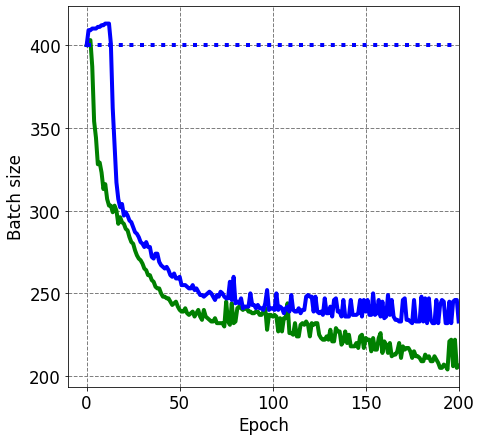

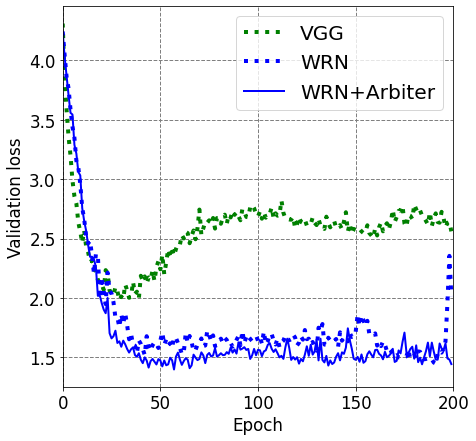

In [ ]:
next_path = os.path.join(root_path, 'ho/hyperparameter-optimisation/batch-size/experiments/neurIPS-exps/appendix/E-additional-results/E2-dataset/cifar-100')

results_path1 = os.path.join(next_path, 'none/VGG/stochastic/logs')
results_path2 = os.path.join(next_path, 'none/WRN/stochastic/logs')
results_path3 = os.path.join(next_path, 'scheduler/VGG/stochastic/phi-lr=1e-5')
results_path4 = os.path.join(next_path, 'scheduler/WRN/stochastic/phi-lr=1e-5')

results_path5 = os.path.join(next_path, 'none/VGG/non-stochastic/logs')
results_path6 = os.path.join(next_path, 'none/WRN/non-stochastic/logs')
results_path7 = os.path.join(next_path, 'scheduler/VGG/non-stochastic/phi-lr=1e-5')
results_path8 = os.path.join(next_path, 'scheduler/WRN/non-stochastic/phi-lr=1e-5')


''' performance
'''
val_vgg_noisy_base = np.loadtxt(os.path.join(results_path1, 'val_loss.txt'), unpack=True).astype(float)
val_wrn_noisy_base = np.loadtxt(os.path.join(results_path2, 'val_loss.txt'), unpack=True).astype(float)
val_vgg_noisy_arb = np.loadtxt(os.path.join(results_path3, 'val_loss.txt'), unpack=True).astype(float)
val_wrn_noisy_arb = np.loadtxt(os.path.join(results_path4, 'val_loss.txt'), unpack=True).astype(float)

val_vgg_quiet_base = np.loadtxt(os.path.join(results_path5, 'val_loss.txt'), unpack=True).astype(float)
val_wrn_quiet_base = np.loadtxt(os.path.join(results_path6, 'val_loss.txt'), unpack=True).astype(float)
val_vgg_quiet_arb = np.loadtxt(os.path.join(results_path7, 'val_loss.txt'), unpack=True).astype(float)
val_wrn_quiet_arb = np.loadtxt(os.path.join(results_path8, 'val_loss.txt'), unpack=True).astype(float)

test_vgg_noisy_base = np.loadtxt(os.path.join(results_path1, 'test_loss.txt'), unpack=True).astype(float)
test_wrn_noisy_base = np.loadtxt(os.path.join(results_path2, 'test_loss.txt'), unpack=True).astype(float)
test_vgg_noisy_arb = np.loadtxt(os.path.join(results_path3, 'test_loss.txt'), unpack=True).astype(float)
test_wrn_noisy_arb = np.loadtxt(os.path.join(results_path4, 'test_loss.txt'), unpack=True).astype(float)

test_vgg_quiet_base = np.loadtxt(os.path.join(results_path5, 'test_loss.txt'), unpack=True).astype(float)
test_wrn_quiet_base = np.loadtxt(os.path.join(results_path6, 'test_loss.txt'), unpack=True).astype(float)
test_vgg_quiet_arb = np.loadtxt(os.path.join(results_path7, 'test_loss.txt'), unpack=True).astype(float)
test_wrn_quiet_arb = np.loadtxt(os.path.join(results_path8, 'test_loss.txt'), unpack=True).astype(float)


''' batch size 
'''
bs_vgg_noisy = np.loadtxt(os.path.join(results_path3, 'batch_size_epoch.txt'), unpack=True).astype(int)
bs_wrn_noisy = np.loadtxt(os.path.join(results_path4, 'batch_size_epoch.txt'), unpack=True).astype(int)
bs_const1 = np.full(200,128) 

bs_vgg_quiet = np.loadtxt(os.path.join(results_path7, 'batch_size_epoch.txt'), unpack=True).astype(int)
bs_wrn_quiet = np.loadtxt(os.path.join(results_path8, 'batch_size_epoch.txt'), unpack=True).astype(int)
bs_const2 = np.full(200,400) 

''' plot epoch level results (batch size, train/val loss)
'''
fig1, ax1 = plt.figure(figsize=(7,7)), plt.gca()
# ax1.plot(bs_vgg_noisy, color='green', lw=4, label=r'')
# ax1.plot(bs_wrn_noisy, color='blue', lw=4, label=r'')
# ax1.plot(bs_const1, color='blue',lw=4, linestyle='dotted')
ax1.plot(bs_vgg_quiet, color='green', lw=4, label=r'')
ax1.plot(bs_wrn_quiet , color='blue', lw=4, label=r'')
ax1.plot(bs_const2, color='blue',lw=4, linestyle='dotted')
plt.xlabel('Epoch')
plt.ylabel('Batch size')
plt.xlim([-10,200])
ax1.grid(color='gray', linewidth=1, linestyle='--')
# plt.savefig(os.path.join(next_path,'appendix_cifar100_quiet_batchSize.eps'))

''' show both validation and test loss
'''
fig2,ax2 = plt.figure(figsize=(7,7)), plt.gca()
# ax2.plot(val_vgg_noisy_base, color='green', lw=4 , linestyle='dotted',label='VGG')
# ax2.plot(val_vgg_noisy_arb, color='green', lw=2,  linestyle='-', label='VGG+Arbiter')
# ax2.plot(val_wrn_noisy_base, color='blue', lw=4, linestyle='dotted' ,label='WRN')
# ax2.plot(val_wrn_noisy_arb, color='blue', lw=2, linestyle='-',label='WRN+Arbiter')
ax2.plot(val_vgg_quiet_base, color='green', lw=4 , linestyle='dotted',label='VGG')
# ax2.plot(val_vgg_quiet_arb, color='green', lw=2,  linestyle='-', label='VGG+Arbiter')
ax2.plot(val_wrn_quiet_base, color='blue', lw=4, linestyle='dotted' ,label='WRN')
ax2.plot(val_wrn_quiet_arb, color='blue', lw=2, linestyle='-',label='WRN+Arbiter')
plt.xlabel('Epoch')
plt.ylabel('Validation loss')
# plt.yscale('log')
plt.xlim([0,200])
# plt.ylim([0.3,5])
plt.legend(loc='best')
ax2.grid(color='gray', which='major',linewidth=1, linestyle='--')
# plt.savefig(os.path.join(next_path,'appendix_cifar100_quiet_valLoss.eps'))



In [ ]:
print('VGG:')
print(min(val_vgg_noisy_base),  min(test_vgg_noisy_base))
print(min(val_vgg_noisy_arb),   min(test_vgg_noisy_arb))
print(min(val_vgg_quiet_base),  min(test_vgg_quiet_base))
print(min(val_vgg_quiet_arb),   min(test_vgg_quiet_arb))

print('WRN:')
print(min(val_wrn_noisy_base),  min(test_wrn_noisy_base))
print(min(val_wrn_noisy_arb),   min(test_wrn_noisy_arb))
print(min(val_wrn_quiet_base),  min(test_wrn_quiet_base))
print(min(val_wrn_quiet_arb),   min(test_wrn_quiet_arb))



VGG:
1.853441 1.79823
1.792902 1.686787
1.981418 1.869332
1.895913 1.79749
WRN:
1.398302 1.442326
1.316937 1.330981
1.446001 1.519492
1.396671 1.417333


# -- old results --

# CIFAR10

VGG

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/i

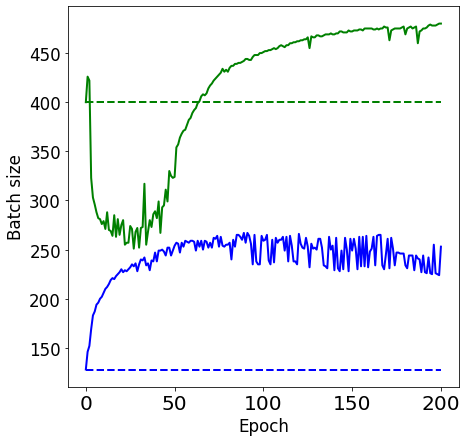

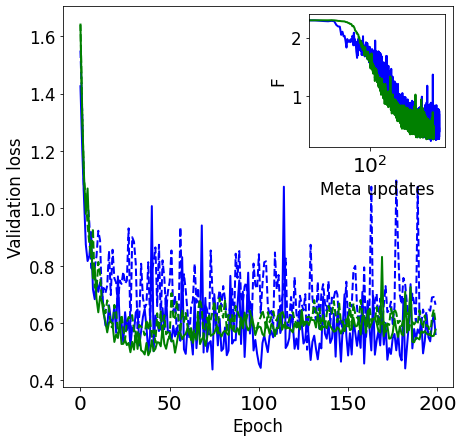

In [ ]:
from torch.functional import broadcast_tensors
next_path = os.path.join(root_path, 'ho/hyperparameter-optimisation/batch-size/experiments')

results_path1 = os.path.join(next_path, 'section1/arch/non-stochastic/VGG11/none/logs')
results_path2 = os.path.join(next_path, 'section1/arch/non-stochastic/VGG11/scheduler_phi-lr=1e-4/logs')
results_path3 = os.path.join(next_path, 'section1/arch/stochastic/VGG11/none')
results_path4 = os.path.join(next_path, 'section1/arch/stochastic/VGG11/scheduler_phi-lr=1e-5')

ns_tl_none = np.loadtxt(os.path.join(results_path1, 'train_loss.txt'), unpack=True).astype(np.float)
ns_tl_sched = np.loadtxt(os.path.join(results_path2, 'train_loss.txt'), unpack=True).astype(np.float)
s_tl_none = np.loadtxt(os.path.join(results_path3, 'train_loss.txt'), unpack=True).astype(np.float)
s_tl_sched = np.loadtxt(os.path.join(results_path4, 'train_loss.txt'), unpack=True).astype(np.float)

ns_vl_none = np.loadtxt(os.path.join(results_path1, 'val_loss.txt'), unpack=True).astype(np.float)
ns_vl_sched = np.loadtxt(os.path.join(results_path2, 'val_loss.txt'), unpack=True).astype(np.float)
s_vl_none = np.loadtxt(os.path.join(results_path3, 'val_loss.txt'), unpack=True).astype(np.float)
s_vl_sched = np.loadtxt(os.path.join(results_path4, 'val_loss.txt'), unpack=True).astype(np.float)


ns_test_none = np.loadtxt(os.path.join(results_path1, 'test_loss.txt'), unpack=True).astype(np.float)
ns_test_sched = np.loadtxt(os.path.join(results_path2, 'test_loss.txt'), unpack=True).astype(np.float)
s_test_none = np.loadtxt(os.path.join(results_path3, 'test_loss.txt'), unpack=True).astype(np.float)
s_test_sched = np.loadtxt(os.path.join(results_path4, 'test_loss.txt'), unpack=True).astype(np.float)

bs_nonstoch = np.loadtxt(os.path.join(results_path2, 'batch_size_epoch.txt'), unpack=True).astype(np.int)
s_constant_nonstoch = np.full(len(bs_nonstoch),400)
bs_stoch = np.loadtxt(os.path.join(results_path4, 'batch_size_epoch.txt'), unpack=True).astype(np.int)
s_constant_stoch = np.full(len(bs_stoch),128) 

F_nonstoch = np.loadtxt(os.path.join(results_path2, 'F.txt'), unpack=True).astype(np.float)
F_stoch = np.loadtxt(os.path.join(results_path4, 'F.txt'), unpack=True).astype(np.float)

''' plot epoch level results (batch size, train/val loss)
'''
fig1, ax1 = plt.figure(figsize=(7,7)), plt.gca()
ax1.plot(bs_nonstoch, color='green', lw=2, label=r'')
ax1.plot(bs_stoch, color='blue', lw=2, label=r'')
ax1.plot(s_constant_stoch, color='blue',lw=2, linestyle='--')
ax1.plot(s_constant_nonstoch, color='green', lw=2, linestyle='--')
plt.xlabel('Epoch')
plt.ylabel('Batch size')
# ax11 = plt.axes([0,0,1,1])
# # Manually set the position and relative size of the inset axes within ax1
# ip = InsetPosition(ax1, [0.6,0.6,0.35,0.35])
# ax11.set_axes_locator(ip)
# ax11.plot(F_stoch, c='blue', lw=2, alpha=1)
# ax11.plot(F_nonstoch, c='green', lw=2, alpha=1)
# # ax11.plot(F5, c='g', lw=2, alpha=1)
# # ax11.plot(F7, c='m', lw=2, alpha=1)
# ax11.set_xscale('log')
# ax11.set_xlabel('Iteration')
# ax11.set_ylabel('F')
# plt.legend(loc='best')
plt.savefig(os.path.join(next_path,'vgg-stoch-batch-size.eps'))

fig2,ax2 = plt.figure(figsize=(7,7)), plt.gca()
ax2.plot(s_vl_none, color='blue', lw=2 , linestyle='--')
ax2.plot(s_vl_sched, color='blue', lw=2, linestyle='-')
ax2.plot(ns_vl_none, color='green', lw=2,  linestyle='--')
ax2.plot(ns_vl_sched, color='green', lw=2, linestyle='-')
plt.xlabel('Epoch')
plt.ylabel('Validation loss')
ax11 = plt.axes([0,0,1,1])
# Manually set the position and relative size of the inset axes within ax1
ip = InsetPosition(ax1, [0.63,0.63,0.35,0.35])
ax11.set_axes_locator(ip)
ax11.plot(F_stoch, c='blue', lw=2, alpha=1)
ax11.plot(F_nonstoch, c='green', lw=2, alpha=1)
# ax11.plot(F5, c='g', lw=2, alpha=1)
# ax11.plot(F7, c='m', lw=2, alpha=1)
ax11.set_xscale('log')
ax11.set_xlabel('Meta updates')
ax11.set_ylabel('F')
plt.savefig(os.path.join(next_path,'vgg-stoch-valLoss.eps'))

# fig3,ax3 = plt.figure(figsize=(7,7)), plt.gca()
# ax3.plot(s_tl_none, color='blue', linestyle='--',     label=r'Stochastic')
# ax3.plot(s_tl_sched, color='blue', linestyle='-',  label=r'Stochastic + Arbiter')
# ax3.plot(ns_tl_none, color='green', linestyle='--',    label=r'Non-stochastic')
# ax3.plot(ns_tl_sched, color='green', linestyle='-',  label=r'Non-stochastic + Arbiter')
# plt.xlabel('Epoch')
# plt.ylabel('Training loss')
# plt.legend(loc='best')
# plt.savefig(os.path.join(root_path,'ho/train-loss.eps'))


# ''' plot sample space over iterations 
# '''
# s_alpha_nonstoch = np.loadtxt(os.path.join(results_path2, 's_alpha.txt'), unpack=True).astype(np.int)
# s_alpha_stoch = np.loadtxt(os.path.join(results_path4, 's_alpha.txt'), unpack=True).astype(np.int)

# samples_nonstoch= np.loadtxt(os.path.join(results_path2, 'bs_samples.txt'), unpack=True).astype(np.int)
# samples_stoch = np.loadtxt(os.path.join(results_path4, 'bs_samples.txt'), unpack=True).astype(np.int)

# alphas_nonstoch = np.loadtxt(os.path.join(results_path2, 'alphas.txt'), unpack=True).astype(np.float)
# alphas_stoch = np.loadtxt(os.path.join(results_path4, 'alphas.txt'), unpack=True).astype(np.float)

# s_min2 = samples_nonstoch[0,:]
# s_max2 = samples_nonstoch[3,:]
# s_min4 = samples_stoch[0,:]
# s_max4 = samples_stoch[3,:]

# # for some reason, some of the 'bs_samples.txt' files havent been written properly
# # such that most of them are missing.
# # luckily, I've saved the logits, so lets get them in and convert them to batch size samples.
# if len(s_min4) != len(samples_stoch):
#     import torch
#     def convertToBatchSize(l):
#         ''' given logit lying in R, convert to batch size to lie in N. 
#             default min and max, but could be changed s.t. GPU capacity.
#         '''
#         x = (512 - 8)*torch.sigmoid(l) + 8
#         return int(np.floor(x.item()))

#     logits = np.loadtxt(os.path.join(results_path4, 'logits.txt'), unpack=True).astype(np.float)
#     logit_tensor = torch.from_numpy(logits)
#     s_min4 = [convertToBatchSize(l) for l in logit_tensor[0]]
#     s_max4 = [convertToBatchSize(l) for l in logit_tensor[3]]

# x2 = np.arange(0,len(s_min2))
# x4 = np.arange(0,len(s_min4))

# fig, ax = plt.figure(figsize=(7,7)), plt.gca()
# # # max and mins
# ax.plot(s_min2, color='orange', alpha=0.5, label='Boundary')
# ax.plot(s_max2, color='orange', alpha=0.5)
# ax.plot(s_min4, color='orange', alpha=0.5)
# ax.plot(s_max4, color='orange', alpha=0.5)
# # mixed sample (s_alpha)
# ax.plot(s_alpha_nonstoch,  color='green', alpha=1.0,    label=r'$s_{\alpha}$')
# ax.plot(s_alpha_stoch,  color='blue', alpha=1.0)
# # sample space
# ax.fill_between(x2, s_max2, s_min2, facecolor='green', alpha=0.75,    label='Search space')
# ax.fill_between(x4, s_max4, s_min4, facecolor='blue', alpha=0.75)
# plt.xlabel('Iteration')
# plt.ylabel('Batch size')
# # plt.show()
# ax.legend(loc='best')
# # ax.legend(((p1, p2), (p3, p4)), (r'$S_{\alpha}$', 'Search space'), loc='best')
# plt.savefig(os.path.join(root_path,'ho/bs-samples.png'))


# ax.plot(np.transpose(samples), markevery=100, color='b', alpha=1.0, label=r'$S_{\alpha}$')  









In [ ]:

# Loss
print(min(ns_vl_none),min(ns_vl_sched))
print(min(s_vl_none),min(s_vl_sched))
print(min(ns_test_none),min(ns_test_sched))
print(min(s_test_none),min(s_test_sched))

# accuracy
# print(max(val_acc8),max(test_acc8))

0.531427 0.487208
0.506703 0.437632
0.518201 0.497007
0.489992 0.423594


WRN

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/i

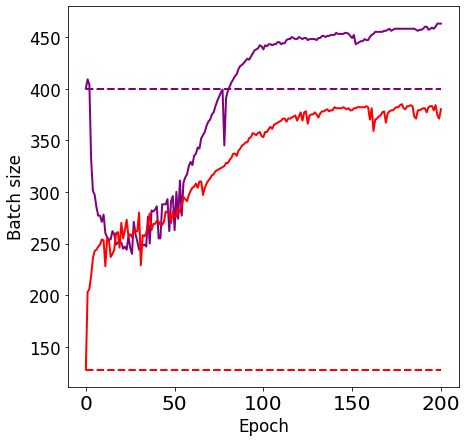

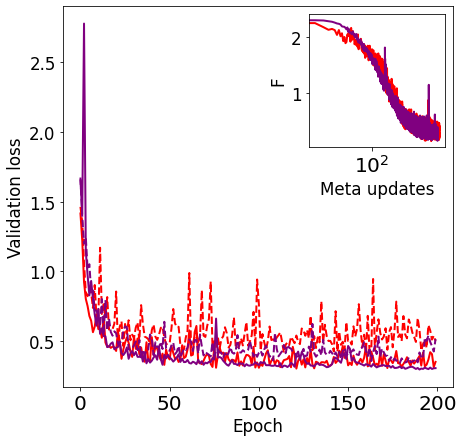

In [ ]:
from torch.functional import broadcast_tensors
next_path = os.path.join(root_path, 'ho/hyperparameter-optimisation/batch-size/experiments')

results_path1 = os.path.join(next_path, 'section1/arch/non-stochastic/WRN164/none')
results_path2 = os.path.join(next_path, 'section1/arch/non-stochastic/WRN164/bs-scheduler')
results_path3 = os.path.join(next_path, 'section1/arch/stochastic/WRN164/none')
results_path4 = os.path.join(next_path, 'section1/arch/stochastic/WRN164/scheduler_phi-lr=1e-4')

ns_tl_none = np.loadtxt(os.path.join(results_path1, 'train_loss.txt'), unpack=True).astype(np.float)
ns_tl_sched = np.loadtxt(os.path.join(results_path2, 'train_loss.txt'), unpack=True).astype(np.float)
s_tl_none = np.loadtxt(os.path.join(results_path3, 'train_loss.txt'), unpack=True).astype(np.float)
s_tl_sched = np.loadtxt(os.path.join(results_path4, 'train_loss.txt'), unpack=True).astype(np.float)

ns_vl_none = np.loadtxt(os.path.join(results_path1, 'val_loss.txt'), unpack=True).astype(np.float)
ns_vl_sched = np.loadtxt(os.path.join(results_path2, 'val_loss.txt'), unpack=True).astype(np.float)
s_vl_none = np.loadtxt(os.path.join(results_path3, 'val_loss.txt'), unpack=True).astype(np.float)
s_vl_sched = np.loadtxt(os.path.join(results_path4, 'val_loss.txt'), unpack=True).astype(np.float)


ns_test_none = np.loadtxt(os.path.join(results_path1, 'test_loss.txt'), unpack=True).astype(np.float)
ns_test_sched = np.loadtxt(os.path.join(results_path2, 'test_loss.txt'), unpack=True).astype(np.float)
s_test_none = np.loadtxt(os.path.join(results_path3, 'test_loss.txt'), unpack=True).astype(np.float)
s_test_sched = np.loadtxt(os.path.join(results_path4, 'test_loss.txt'), unpack=True).astype(np.float)

bs_nonstoch = np.loadtxt(os.path.join(results_path2, 'batch_size_epoch.txt'), unpack=True).astype(np.int)
s_constant_nonstoch = np.full(len(bs_nonstoch),400)
bs_stoch = np.loadtxt(os.path.join(results_path4, 'batch_size_epoch.txt'), unpack=True).astype(np.int)
s_constant_stoch = np.full(len(bs_stoch),128) 

F_nonstoch = np.loadtxt(os.path.join(results_path2, 'F.txt'), unpack=True).astype(np.float)
F_stoch = np.loadtxt(os.path.join(results_path4, 'F.txt'), unpack=True).astype(np.float)

''' plot epoch level results (batch size, train/val loss)
'''
fig1, ax1 = plt.figure(figsize=(7,7)), plt.gca()
ax1.plot(bs_nonstoch, color='purple', lw=2,  label=r'')
ax1.plot(bs_stoch, color='red', lw=2, label=r'')
ax1.plot(s_constant_stoch, color='red', lw=2, linestyle='--')
ax1.plot(s_constant_nonstoch, color='purple', lw=2, linestyle='--')
plt.xlabel('Epoch')
plt.ylabel('Batch size')
plt.savefig(os.path.join(next_path, 'wrn-batchSize.eps'))

fig2,ax2 = plt.figure(figsize=(7,7)), plt.gca()
ax2.plot(s_vl_none, color='red', lw=2, linestyle='--')
ax2.plot(s_vl_sched, color='red', lw=2, linestyle='-')
ax2.plot(ns_vl_none, color='purple', lw=2,  linestyle='--',  label=r'Non-stochastic')
ax2.plot(ns_vl_sched, color='purple', lw=2,  linestyle='-', label=r'Non-stochastic (bs)')
plt.xlabel('Epoch')
plt.ylabel('Validation loss')
ax11 = plt.axes([0,0,1,1])
# Manually set the position and relative size of the inset axes within ax1
ip = InsetPosition(ax1, [0.63,0.63,0.35,0.35])
ax11.set_axes_locator(ip)
ax11.plot(F_stoch, c='red', lw=2, alpha=1)
ax11.plot(F_nonstoch, c='purple', lw=2, alpha=1)
# ax11.plot(F5, c='g', lw=2, alpha=1)
# ax11.plot(F7, c='m', lw=2, alpha=1)
ax11.set_xscale('log')
ax11.set_xlabel('Meta updates')
ax11.set_ylabel('F')
# plt.legend(loc='best')
plt.savefig(os.path.join(next_path, 'wrn-valLoss.eps'))

# fig3,ax3 = plt.figure(figsize=(7,7)), plt.gca()
# ax3.plot(s_tl_none, color='blue', linestyle='--',     label=r'Stochastic')
# ax3.plot(s_tl_sched, color='blue', linestyle='-',  label=r'Stochastic + Arbiter')
# ax3.plot(ns_tl_none, color='green', linestyle='--',    label=r'Non-stochastic')
# ax3.plot(ns_tl_sched, color='green', linestyle='-',  label=r'Non-stochastic + Arbiter')
# plt.xlabel('Epoch')
# plt.ylabel('Training loss')
# plt.legend(loc='best')
# plt.savefig(os.path.join(root_path,'ho/train-loss.eps'))


# ''' plot sample space over iterations 
# '''
# s_alpha_nonstoch = np.loadtxt(os.path.join(results_path2, 's_alpha.txt'), unpack=True).astype(np.int)
# s_alpha_stoch = np.loadtxt(os.path.join(results_path4, 's_alpha.txt'), unpack=True).astype(np.int)

# samples_nonstoch= np.loadtxt(os.path.join(results_path2, 'bs_samples.txt'), unpack=True).astype(np.int)
# samples_stoch = np.loadtxt(os.path.join(results_path4, 'bs_samples.txt'), unpack=True).astype(np.int)

# alphas_nonstoch = np.loadtxt(os.path.join(results_path2, 'alphas.txt'), unpack=True).astype(np.float)
# alphas_stoch = np.loadtxt(os.path.join(results_path4, 'alphas.txt'), unpack=True).astype(np.float)

# s_min2 = samples_nonstoch[0,:]
# s_max2 = samples_nonstoch[3,:]
# s_min4 = samples_stoch[0,:]
# s_max4 = samples_stoch[3,:]

# # for some reason, some of the 'bs_samples.txt' files havent been written properly
# # such that most of them are missing.
# # luckily, I've saved the logits, so lets get them in and convert them to batch size samples.
# if len(s_min4) != len(samples_stoch):
#     import torch
#     def convertToBatchSize(l):
#         ''' given logit lying in R, convert to batch size to lie in N. 
#             default min and max, but could be changed s.t. GPU capacity.
#         '''
#         x = (512 - 8)*torch.sigmoid(l) + 8
#         return int(np.floor(x.item()))

#     logits = np.loadtxt(os.path.join(results_path4, 'logits.txt'), unpack=True).astype(np.float)
#     logit_tensor = torch.from_numpy(logits)
#     s_min4 = [convertToBatchSize(l) for l in logit_tensor[0]]
#     s_max4 = [convertToBatchSize(l) for l in logit_tensor[3]]

# x2 = np.arange(0,len(s_min2))
# x4 = np.arange(0,len(s_min4))

# fig, ax = plt.figure(figsize=(7,7)), plt.gca()
# # # max and mins
# ax.plot(s_min2, color='orange', alpha=0.5, label='Boundary')
# ax.plot(s_max2, color='orange', alpha=0.5)
# ax.plot(s_min4, color='orange', alpha=0.5)
# ax.plot(s_max4, color='orange', alpha=0.5)
# # mixed sample (s_alpha)
# ax.plot(s_alpha_nonstoch,  color='green', alpha=1.0,    label=r'$s_{\alpha}$')
# ax.plot(s_alpha_stoch,  color='blue', alpha=1.0)
# # sample space
# ax.fill_between(x2, s_max2, s_min2, facecolor='green', alpha=0.75,    label='Search space')
# ax.fill_between(x4, s_max4, s_min4, facecolor='blue', alpha=0.75)
# plt.xlabel('Iteration')
# plt.ylabel('Batch size')
# # plt.show()
# ax.legend(loc='best')
# # ax.legend(((p1, p2), (p3, p4)), (r'$S_{\alpha}$', 'Search space'), loc='best')
# plt.savefig(os.path.join(root_path,'ho/bs-samples.png'))


# ax.plot(np.transpose(samples), markevery=100, color='b', alpha=1.0, label=r'$S_{\alpha}$')  









In [ ]:

# Loss
print(min(ns_vl_none),min(ns_vl_sched))
print(min(s_vl_none),min(s_vl_sched))
print(min(ns_test_none),min(ns_test_sched))
print(min(s_test_none),min(s_test_sched))

# accuracy
# print(max(val_acc8),max(test_acc8))

0.342983 0.295173
0.416229 0.301583
0.367697 0.34429
0.404855 0.329745


# CIFAR100

VGG

In [ ]:
from torch.functional import broadcast_tensors
next_path = os.path.join(root_path, 'DeepKernelLearning/hyperparameter-optimisation/batch-size/experiments')

results_path1 = os.path.join(next_path, 'section1/dataset/cifar-100/none/VGG/non-stochastic/logs')
results_path2 = os.path.join(next_path, 'section1/dataset/cifar-100/scheduler/VGG/non-stochastic/phi-lr=1e-5')
results_path3 = os.path.join(next_path, 'section1/dataset/cifar-100/none/VGG/stochastic/logs')
results_path4 = os.path.join(next_path, 'section1/dataset/cifar-100/scheduler/VGG/stochastic/phi-lr=1e-5')

ns_tl_none = np.loadtxt(os.path.join(results_path1, 'train_loss.txt'), unpack=True).astype(np.float)
ns_tl_sched = np.loadtxt(os.path.join(results_path2, 'train_loss.txt'), unpack=True).astype(np.float)
s_tl_none = np.loadtxt(os.path.join(results_path3, 'train_loss.txt'), unpack=True).astype(np.float)
s_tl_sched = np.loadtxt(os.path.join(results_path4, 'train_loss.txt'), unpack=True).astype(np.float)

ns_vl_none = np.loadtxt(os.path.join(results_path1, 'val_loss.txt'), unpack=True).astype(np.float)
ns_vl_sched = np.loadtxt(os.path.join(results_path2, 'val_loss.txt'), unpack=True).astype(np.float)
s_vl_none = np.loadtxt(os.path.join(results_path3, 'val_loss.txt'), unpack=True).astype(np.float)
s_vl_sched = np.loadtxt(os.path.join(results_path4, 'val_loss.txt'), unpack=True).astype(np.float)


ns_test_none = np.loadtxt(os.path.join(results_path1, 'test_loss.txt'), unpack=True).astype(np.float)
ns_test_sched = np.loadtxt(os.path.join(results_path2, 'test_loss.txt'), unpack=True).astype(np.float)
s_test_none = np.loadtxt(os.path.join(results_path3, 'test_loss.txt'), unpack=True).astype(np.float)
s_test_sched = np.loadtxt(os.path.join(results_path4, 'test_loss.txt'), unpack=True).astype(np.float)

bs_nonstoch = np.loadtxt(os.path.join(results_path2, 'batch_size_epoch.txt'), unpack=True).astype(np.int)
s_constant_nonstoch = np.full(len(bs_nonstoch),400)
bs_stoch = np.loadtxt(os.path.join(results_path4, 'batch_size_epoch.txt'), unpack=True).astype(np.int)
s_constant_stoch = np.full(len(bs_stoch),128) 

F_nonstoch = np.loadtxt(os.path.join(results_path2, 'F.txt'), unpack=True).astype(np.float)
F_stoch = np.loadtxt(os.path.join(results_path4, 'F.txt'), unpack=True).astype(np.float)

''' plot epoch level results (batch size, train/val loss)
'''
fig1, ax1 = plt.figure(figsize=(7,7)), plt.gca()
ax1.plot(bs_nonstoch, color='green', label=r'')
ax1.plot(bs_stoch, color='blue', label=r'')
ax1.plot(s_constant_stoch, color='blue', linestyle='--')
ax1.plot(s_constant_nonstoch, color='green', linestyle='--')
plt.xlabel('Epoch')
plt.ylabel('Batch size')
ax11 = plt.axes([0,0,1,1])
# Manually set the position and relative size of the inset axes within ax1
ip = InsetPosition(ax1, [0.6,0.6,0.35,0.35])
ax11.set_axes_locator(ip)
ax11.plot(F_stoch, c='blue', lw=2, alpha=1)
ax11.plot(F_nonstoch, c='green', lw=2, alpha=1)
# ax11.plot(F5, c='g', lw=2, alpha=1)
# ax11.plot(F7, c='m', lw=2, alpha=1)
ax11.set_xscale('log')
ax11.set_xlabel('Iteration')
ax11.set_ylabel('F')
# plt.legend(loc='best')
# plt.savefig(os.path.join(root_path,'ho/batch-size.eps'))

fig2,ax2 = plt.figure(figsize=(7,7)), plt.gca()
ax2.plot(s_vl_none, color='blue', linestyle='--')
ax2.plot(s_vl_sched, color='blue', linestyle='-')
ax2.plot(ns_vl_none, color='green', linestyle='--',  label=r'Non-stochastic')
ax2.plot(ns_vl_sched, color='green', linestyle='-', label=r'Non-stochastic (bs)')
plt.xlabel('Epoch')
plt.ylabel('Validation loss')
# plt.legend(loc='best')
# plt.savefig(os.path.join(root_path,'ho/val-loss.eps'))

fig3,ax3 = plt.figure(figsize=(7,7)), plt.gca()
ax3.plot(s_tl_none, color='blue', linestyle='--',     label=r'Stochastic')
ax3.plot(s_tl_sched, color='blue', linestyle='-',  label=r'Stochastic + Arbiter')
ax3.plot(ns_tl_none, color='green', linestyle='--',    label=r'Non-stochastic')
ax3.plot(ns_tl_sched, color='green', linestyle='-',  label=r'Non-stochastic + Arbiter')
plt.xlabel('Epoch')
plt.ylabel('Training loss')
plt.legend(loc='best')
# plt.savefig(os.path.join(root_path,'ho/train-loss.eps'))


# ''' plot sample space over iterations 
# '''
# s_alpha_nonstoch = np.loadtxt(os.path.join(results_path2, 's_alpha.txt'), unpack=True).astype(np.int)
# s_alpha_stoch = np.loadtxt(os.path.join(results_path4, 's_alpha.txt'), unpack=True).astype(np.int)

# samples_nonstoch= np.loadtxt(os.path.join(results_path2, 'bs_samples.txt'), unpack=True).astype(np.int)
# samples_stoch = np.loadtxt(os.path.join(results_path4, 'bs_samples.txt'), unpack=True).astype(np.int)

# alphas_nonstoch = np.loadtxt(os.path.join(results_path2, 'alphas.txt'), unpack=True).astype(np.float)
# alphas_stoch = np.loadtxt(os.path.join(results_path4, 'alphas.txt'), unpack=True).astype(np.float)

# s_min2 = samples_nonstoch[0,:]
# s_max2 = samples_nonstoch[3,:]
# s_min4 = samples_stoch[0,:]
# s_max4 = samples_stoch[3,:]

# # for some reason, some of the 'bs_samples.txt' files havent been written properly
# # such that most of them are missing.
# # luckily, I've saved the logits, so lets get them in and convert them to batch size samples.
# if len(s_min4) != len(samples_stoch):
#     import torch
#     def convertToBatchSize(l):
#         ''' given logit lying in R, convert to batch size to lie in N. 
#             default min and max, but could be changed s.t. GPU capacity.
#         '''
#         x = (512 - 8)*torch.sigmoid(l) + 8
#         return int(np.floor(x.item()))

#     logits = np.loadtxt(os.path.join(results_path4, 'logits.txt'), unpack=True).astype(np.float)
#     logit_tensor = torch.from_numpy(logits)
#     s_min4 = [convertToBatchSize(l) for l in logit_tensor[0]]
#     s_max4 = [convertToBatchSize(l) for l in logit_tensor[3]]

# x2 = np.arange(0,len(s_min2))
# x4 = np.arange(0,len(s_min4))

# fig, ax = plt.figure(figsize=(7,7)), plt.gca()
# # # max and mins
# ax.plot(s_min2, color='orange', alpha=0.5, label='Boundary')
# ax.plot(s_max2, color='orange', alpha=0.5)
# ax.plot(s_min4, color='orange', alpha=0.5)
# ax.plot(s_max4, color='orange', alpha=0.5)
# # mixed sample (s_alpha)
# ax.plot(s_alpha_nonstoch,  color='green', alpha=1.0,    label=r'$s_{\alpha}$')
# ax.plot(s_alpha_stoch,  color='blue', alpha=1.0)
# # sample space
# ax.fill_between(x2, s_max2, s_min2, facecolor='green', alpha=0.75,    label='Search space')
# ax.fill_between(x4, s_max4, s_min4, facecolor='blue', alpha=0.75)
# plt.xlabel('Iteration')
# plt.ylabel('Batch size')
# # plt.show()
# ax.legend(loc='best')
# # ax.legend(((p1, p2), (p3, p4)), (r'$S_{\alpha}$', 'Search space'), loc='best')
# plt.savefig(os.path.join(root_path,'ho/bs-samples.png'))


# ax.plot(np.transpose(samples), markevery=100, color='b', alpha=1.0, label=r'$S_{\alpha}$')  









/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/i

In [ ]:

# Loss
print(min(s_vl_none),min(s_vl_sched))
print(min(s_test_none),min(s_test_sched))
print(min(ns_vl_none),min(ns_vl_sched))
print(min(ns_test_none),min(ns_test_sched))


# accuracy
# print(max(val_acc8),max(test_acc8))

1.853441 1.792902
1.79823 1.686787
1.981418 1.895913
1.869332 1.79749


Wide ResNet

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/i

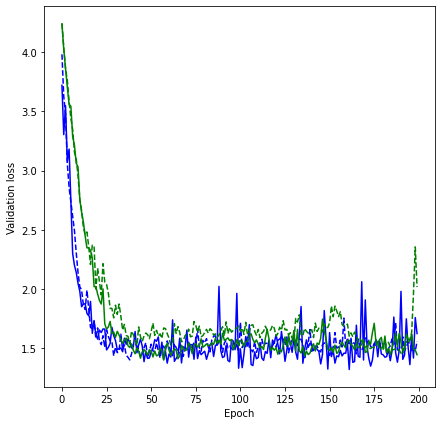

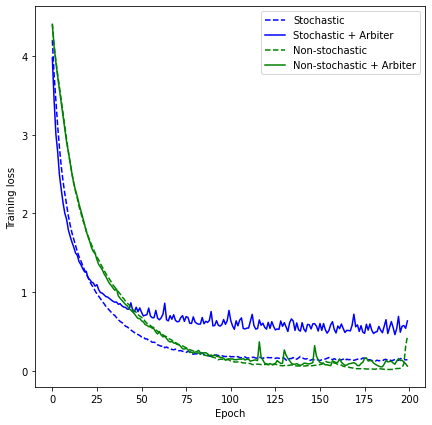

In [ ]:

next_path = os.path.join(root_path, 'DeepKernelLearning/hyperparameter-optimisation/batch-size/experiments')

results_path1 = os.path.join(next_path, 'section1/dataset/cifar-100/none/WRN/non-stochastic/logs')
results_path2 = os.path.join(next_path, 'section1/dataset/cifar-100/scheduler/WRN/non-stochastic/phi-lr=1e-5')
results_path3 = os.path.join(next_path, 'section1/dataset/cifar-100/none/WRN/stochastic/logs')
results_path4 = os.path.join(next_path, 'section1/dataset/cifar-100/scheduler/WRN/stochastic/phi-lr=1e-5')

ns_tl_none = np.loadtxt(os.path.join(results_path1, 'train_loss.txt'), unpack=True).astype(np.float)
ns_tl_sched = np.loadtxt(os.path.join(results_path2, 'train_loss.txt'), unpack=True).astype(np.float)
s_tl_none = np.loadtxt(os.path.join(results_path3, 'train_loss.txt'), unpack=True).astype(np.float)
s_tl_sched = np.loadtxt(os.path.join(results_path4, 'train_loss.txt'), unpack=True).astype(np.float)

ns_vl_none = np.loadtxt(os.path.join(results_path1, 'val_loss.txt'), unpack=True).astype(np.float)
ns_vl_sched = np.loadtxt(os.path.join(results_path2, 'val_loss.txt'), unpack=True).astype(np.float)
s_vl_none = np.loadtxt(os.path.join(results_path3, 'val_loss.txt'), unpack=True).astype(np.float)
s_vl_sched = np.loadtxt(os.path.join(results_path4, 'val_loss.txt'), unpack=True).astype(np.float)


ns_test_none = np.loadtxt(os.path.join(results_path1, 'test_loss.txt'), unpack=True).astype(np.float)
ns_test_sched = np.loadtxt(os.path.join(results_path2, 'test_loss.txt'), unpack=True).astype(np.float)
s_test_none = np.loadtxt(os.path.join(results_path3, 'test_loss.txt'), unpack=True).astype(np.float)
s_test_sched = np.loadtxt(os.path.join(results_path4, 'test_loss.txt'), unpack=True).astype(np.float)

bs_nonstoch = np.loadtxt(os.path.join(results_path2, 'batch_size_epoch.txt'), unpack=True).astype(np.int)
s_constant_nonstoch = np.full(len(bs_nonstoch),400)
bs_stoch = np.loadtxt(os.path.join(results_path4, 'batch_size_epoch.txt'), unpack=True).astype(np.int)
s_constant_stoch = np.full(len(bs_stoch),128) 

F_nonstoch = np.loadtxt(os.path.join(results_path2, 'F.txt'), unpack=True).astype(np.float)
F_stoch = np.loadtxt(os.path.join(results_path4, 'F.txt'), unpack=True).astype(np.float)

''' plot epoch level results (batch size, train/val loss)
'''
fig1, ax1 = plt.figure(figsize=(7,7)), plt.gca()
ax1.plot(bs_nonstoch, color='green', label=r'')
ax1.plot(bs_stoch, color='blue', label=r'')
ax1.plot(s_constant_stoch, color='blue', linestyle='--')
ax1.plot(s_constant_nonstoch, color='green', linestyle='--')
plt.xlabel('Epoch')
plt.ylabel('Batch size')
ax11 = plt.axes([0,0,1,1])
# Manually set the position and relative size of the inset axes within ax1
ip = InsetPosition(ax1, [0.6,0.6,0.35,0.35])
ax11.set_axes_locator(ip)
ax11.plot(F_stoch, c='blue', lw=2, alpha=1)
ax11.plot(F_nonstoch, c='green', lw=2, alpha=1)
# ax11.plot(F5, c='g', lw=2, alpha=1)
# ax11.plot(F7, c='m', lw=2, alpha=1)
ax11.set_xscale('log')
ax11.set_xlabel('Iteration')
ax11.set_ylabel('F')
# plt.legend(loc='best')
# plt.savefig(os.path.join(root_path,'ho/batch-size.eps'))

fig2,ax2 = plt.figure(figsize=(7,7)), plt.gca()
ax2.plot(s_vl_none, color='blue', linestyle='--')
ax2.plot(s_vl_sched, color='blue', linestyle='-')
ax2.plot(ns_vl_none, color='green', linestyle='--',  label=r'Non-stochastic')
ax2.plot(ns_vl_sched, color='green', linestyle='-', label=r'Non-stochastic (bs)')
plt.xlabel('Epoch')
plt.ylabel('Validation loss')
# plt.legend(loc='best')
# plt.savefig(os.path.join(root_path,'ho/val-loss.eps'))

fig3,ax3 = plt.figure(figsize=(7,7)), plt.gca()
ax3.plot(s_tl_none, color='blue', linestyle='--',     label=r'Stochastic')
ax3.plot(s_tl_sched, color='blue', linestyle='-',  label=r'Stochastic + Arbiter')
ax3.plot(ns_tl_none, color='green', linestyle='--',    label=r'Non-stochastic')
ax3.plot(ns_tl_sched, color='green', linestyle='-',  label=r'Non-stochastic + Arbiter')
plt.xlabel('Epoch')
plt.ylabel('Training loss')
plt.legend(loc='best')
# plt.savefig(os.path.join(root_path,'ho/train-loss.eps'))


# ''' plot sample space over iterations 
# '''
# s_alpha_nonstoch = np.loadtxt(os.path.join(results_path2, 's_alpha.txt'), unpack=True).astype(np.int)
# s_alpha_stoch = np.loadtxt(os.path.join(results_path4, 's_alpha.txt'), unpack=True).astype(np.int)

# samples_nonstoch= np.loadtxt(os.path.join(results_path2, 'bs_samples.txt'), unpack=True).astype(np.int)
# samples_stoch = np.loadtxt(os.path.join(results_path4, 'bs_samples.txt'), unpack=True).astype(np.int)

# alphas_nonstoch = np.loadtxt(os.path.join(results_path2, 'alphas.txt'), unpack=True).astype(np.float)
# alphas_stoch = np.loadtxt(os.path.join(results_path4, 'alphas.txt'), unpack=True).astype(np.float)

# s_min2 = samples_nonstoch[0,:]
# s_max2 = samples_nonstoch[3,:]
# s_min4 = samples_stoch[0,:]
# s_max4 = samples_stoch[3,:]

# # for some reason, some of the 'bs_samples.txt' files havent been written properly
# # such that most of them are missing.
# # luckily, I've saved the logits, so lets get them in and convert them to batch size samples.
# if len(s_min4) != len(samples_stoch):
#     import torch
#     def convertToBatchSize(l):
#         ''' given logit lying in R, convert to batch size to lie in N. 
#             default min and max, but could be changed s.t. GPU capacity.
#         '''
#         x = (512 - 8)*torch.sigmoid(l) + 8
#         return int(np.floor(x.item()))

#     logits = np.loadtxt(os.path.join(results_path4, 'logits.txt'), unpack=True).astype(np.float)
#     logit_tensor = torch.from_numpy(logits)
#     s_min4 = [convertToBatchSize(l) for l in logit_tensor[0]]
#     s_max4 = [convertToBatchSize(l) for l in logit_tensor[3]]

# x2 = np.arange(0,len(s_min2))
# x4 = np.arange(0,len(s_min4))

# fig, ax = plt.figure(figsize=(7,7)), plt.gca()
# # # max and mins
# ax.plot(s_min2, color='orange', alpha=0.5, label='Boundary')
# ax.plot(s_max2, color='orange', alpha=0.5)
# ax.plot(s_min4, color='orange', alpha=0.5)
# ax.plot(s_max4, color='orange', alpha=0.5)
# # mixed sample (s_alpha)
# ax.plot(s_alpha_nonstoch,  color='green', alpha=1.0,    label=r'$s_{\alpha}$')
# ax.plot(s_alpha_stoch,  color='blue', alpha=1.0)
# # sample space
# ax.fill_between(x2, s_max2, s_min2, facecolor='green', alpha=0.75,    label='Search space')
# ax.fill_between(x4, s_max4, s_min4, facecolor='blue', alpha=0.75)
# plt.xlabel('Iteration')
# plt.ylabel('Batch size')
# # plt.show()
# ax.legend(loc='best')
# # ax.legend(((p1, p2), (p3, p4)), (r'$S_{\alpha}$', 'Search space'), loc='best')
# plt.savefig(os.path.join(root_path,'ho/bs-samples.png'))


# ax.plot(np.transpose(samples), markevery=100, color='b', alpha=1.0, label=r'$S_{\alpha}$')  









In [ ]:

# Loss
print(min(ns_vl_none),min(ns_vl_sched))
print(min(s_vl_none),min(s_vl_sched))
print(min(ns_test_none),min(ns_test_sched))
print(min(s_test_none),min(s_test_sched))

# accuracy
# print(max(val_acc8),max(test_acc8))

1.446001 1.396671
1.398302 1.316937
1.519492 1.417333
1.442326 1.330981


In [ ]:
# next_path = os.path.join(root_path, 'DeepKernelLearning/hyperparameter-optimisation/batch-size/experiments/section2/WRN/SGDm')

# results_path1 = os.path.join(next_path, 'section1/dataset/cifar-100/none/VGG/non-stochastic/logs')
# results_path2 = os.path.join(next_path, 'section1/dataset/cifar-100/scheduler/VGG/non-stochastic/phi-lr=1e-5')
# results_path3 = os.path.join(next_path, 'section1/dataset/cifar-100/none/VGG/stochastic/logs')
# results_path4 = os.path.join(next_path, 'section1/dataset/cifar-100/scheduler/VGG/stochastic/phi-lr=1e-5')

# # results_path1 = os.path.join(next_path, 'hd/logs')
# # results_path2 = os.path.join(next_path, 'arbiter/logs')
# # results_path3 = os.path.join(next_path, 'hd/logs')
# # results_path4 = os.path.join(next_path, 'arbiter/logs')

# trainLoss1 = np.loadtxt(os.path.join(results_path1, 'train_loss.txt'), unpack=True).astype(np.float)
# trainLoss2 = np.loadtxt(os.path.join(results_path2, 'train_loss.txt'), unpack=True).astype(np.float)
# trainLoss3 = np.loadtxt(os.path.join(results_path3, 'train_loss.txt'), unpack=True).astype(np.float)
# trainLoss4 = np.loadtxt(os.path.join(results_path4, 'train_loss.txt'), unpack=True).astype(np.float)

# valLoss1 = np.loadtxt(os.path.join(results_path4, 'train_loss.txt'), unpack=True).astype(np.float)
# valLoss1 = np.loadtxt(os.path.join(results_path4, 'train_loss.txt'), unpack=True).astype(np.float)
# valLoss1 = np.loadtxt(os.path.join(results_path4, 'train_loss.txt'), unpack=True).astype(np.float)
# valLoss1 = np.loadtxt(os.path.join(results_path4, 'train_loss.txt'), unpack=True).astype(np.float)

# bs1 = np.loadtxt(os.path.join(results_path2, 'batch_size_epoch.txt'), unpack=True).astype(np.int)
# bs2 = np.full(len(bs_nonstoch),128)
# bs3 = np.loadtxt(os.path.join(results_path4, 'batch_size_epoch.txt'), unpack=True).astype(np.int)

# F_nonstoch = np.loadtxt(os.path.join(results_path2, 'F.txt'), unpack=True).astype(np.float)
# F_stoch = np.loadtxt(os.path.join(results_path4, 'F.txt'), unpack=True).astype(np.float)

# ''' plot epoch level results (batch size, train/val loss)
# '''
# fig1, ax1 = plt.figure(figsize=(7,7)), plt.gca()
# ax1.plot(bs_nonstoch, color='purple', label=r'')
# ax1.plot(bs_stoch, color='red', label=r'')
# ax1.plot(s_constant_stoch, color='red', linestyle='--')
# ax1.plot(s_constant_nonstoch, color='purple', linestyle='--')
# plt.xlabel('Epoch')
# plt.ylabel('Batch size')
# ax11 = plt.axes([0,0,1,1])
# # Manually set the position and relative size of the inset axes within ax1
# ip = InsetPosition(ax1, [0.6,0.6,0.35,0.35])
# ax11.set_axes_locator(ip)
# ax11.plot(F_stoch, c='red', lw=2, alpha=1)
# ax11.plot(F_nonstoch, c='purple', lw=2, alpha=1)
# # ax11.plot(F5, c='g', lw=2, alpha=1)
# # ax11.plot(F7, c='m', lw=2, alpha=1)
# ax11.set_xscale('log')
# ax11.set_xlabel('Iteration')
# ax11.set_ylabel('F')
# # plt.legend(loc='best')
# # plt.savefig(os.path.join(root_path,'ho/batch-size.eps'))

# fig2,ax2 = plt.figure(figsize=(7,7)), plt.gca()
# ax2.plot(s_vl_none, color='red', linestyle='--')
# ax2.plot(s_vl_sched, color='red', linestyle='-')
# ax2.plot(ns_vl_none, color='purple', linestyle='--',  label=r'Non-stochastic')
# ax2.plot(ns_vl_sched, color='purple', linestyle='-', label=r'Non-stochastic (bs)')
# plt.xlabel('Epoch')
# plt.ylabel('Validation loss')
# # plt.legend(loc='best')
# # plt.savefig(os.path.join(root_path,'ho/val-loss.eps'))

# fig3,ax3 = plt.figure(figsize=(7,7)), plt.gca()
# ax3.plot(s_tl_none, color='red', linestyle='--',     label=r'Stochastic')
# ax3.plot(s_tl_sched, color='red', linestyle='-',  label=r'Stochastic + Arbiter')
# ax3.plot(ns_tl_none, color='purple', linestyle='--',    label=r'Non-stochastic')
# ax3.plot(ns_tl_sched, color='purple', linestyle='-',  label=r'Non-stochastic + Arbiter')
# plt.xlabel('Epoch')
# plt.ylabel('Training loss')
# plt.legend(loc='best')
# # plt.savefig(os.path.join(root_path,'ho/train-loss.eps'))


# # ''' plot sample space over iterations 
# # '''
# # s_alpha_nonstoch = np.loadtxt(os.path.join(results_path2, 's_alpha.txt'), unpack=True).astype(np.int)
# # s_alpha_stoch = np.loadtxt(os.path.join(results_path4, 's_alpha.txt'), unpack=True).astype(np.int)

# # samples_nonstoch= np.loadtxt(os.path.join(results_path2, 'bs_samples.txt'), unpack=True).astype(np.int)
# # samples_stoch = np.loadtxt(os.path.join(results_path4, 'bs_samples.txt'), unpack=True).astype(np.int)

# # alphas_nonstoch = np.loadtxt(os.path.join(results_path2, 'alphas.txt'), unpack=True).astype(np.float)
# # alphas_stoch = np.loadtxt(os.path.join(results_path4, 'alphas.txt'), unpack=True).astype(np.float)

# # s_min2 = samples_nonstoch[0,:]
# # s_max2 = samples_nonstoch[3,:]
# # s_min4 = samples_stoch[0,:]
# # s_max4 = samples_stoch[3,:]

# # # for some reason, some of the 'bs_samples.txt' files havent been written properly
# # # such that most of them are missing.
# # # luckily, I've saved the logits, so lets get them in and convert them to batch size samples.
# # if len(s_min4) != len(samples_stoch):
# #     import torch
# #     def convertToBatchSize(l):
# #         ''' given logit lying in R, convert to batch size to lie in N. 
# #             default min and max, but could be changed s.t. GPU capacity.
# #         '''
# #         x = (512 - 8)*torch.sigmoid(l) + 8
# #         return int(np.floor(x.item()))

# #     logits = np.loadtxt(os.path.join(results_path4, 'logits.txt'), unpack=True).astype(np.float)
# #     logit_tensor = torch.from_numpy(logits)
# #     s_min4 = [convertToBatchSize(l) for l in logit_tensor[0]]
# #     s_max4 = [convertToBatchSize(l) for l in logit_tensor[3]]

# # x2 = np.arange(0,len(s_min2))
# # x4 = np.arange(0,len(s_min4))

# # fig, ax = plt.figure(figsize=(7,7)), plt.gca()
# # # # max and mins
# # ax.plot(s_min2, color='orange', alpha=0.5, label='Boundary')
# # ax.plot(s_max2, color='orange', alpha=0.5)
# # ax.plot(s_min4, color='orange', alpha=0.5)
# # ax.plot(s_max4, color='orange', alpha=0.5)
# # # mixed sample (s_alpha)
# # ax.plot(s_alpha_nonstoch,  color='purple', alpha=1.0,    label=r'$s_{\alpha}$')
# # ax.plot(s_alpha_stoch,  color='red', alpha=1.0)
# # # sample space
# # ax.fill_between(x2, s_max2, s_min2, facecolor='purple', alpha=0.75,    label='Search space')
# # ax.fill_between(x4, s_max4, s_min4, facecolor='red', alpha=0.75)
# # plt.xlabel('Iteration')
# # plt.ylabel('Batch size')
# # # plt.show()
# # ax.legend(loc='best')
# # # ax.legend(((p1, p2), (p3, p4)), (r'$S_{\alpha}$', 'Search space'), loc='best')
# # plt.savefig(os.path.join(root_path,'ho/bs-samples.png'))


# # ax.plot(np.transpose(samples), markevery=100, color='b', alpha=1.0, label=r'$S_{\alpha}$')  









# Learning rate

In [ ]:
next_path = os.path.join(root_path, 'ho/batch-size/experiments')

# SGD 
sgd_path1 = os.path.join(next_path, 'section2/WRN/SGDm/hd/sgdhd(beta=1e-4)')
# sgd_path2 = os.path.join(next_path, 'section2/WRN/SGD/arbiter/sgdhd(beta=1e-6)+arbiter(a=1e-5,p=1e-6)/logs')
# sgd_path1 = os.path.join(next_path, 'section2/WRN/SGDm/hd/sgdhd(n=0.01)/logs')
# sgd_path2 = os.path.join(next_path, 'section2/WRN/SGDm/arbiter/sgdhd+bs(n=0.01)/logs')
sgd_path2 = os.path.join(next_path, 'section2/WRN/SGDm/arbiter/sgdhd(beta=1e-4)+arbiter(a=1e-3,p=1e-5)/logs')
# results_path3 = os.path.join(root_path, 'experiments/section1/arch/non-stochastic/VGG/none')
# results_path4 = os.path.join(root_path, 'experiments/section1/arch/non-stochastic/VGG/scheduler_phi-lr=1e-5')# results_path1 = os.path.join(root_path, 'experiments/section1/arch/stochastic/VGG11/bs-scheduler-high-phi-lr')

# Adam
# adam_path1 = os.path.join(next_path, 'section2/WRN/Adam/hd/other/adamhd-beta=1e-8/logs')
adam_path1 = os.path.join(next_path, 'section2/WRN/Adam/hd/adamHD_n=0.1_b=1e-4/logs')
adam_path2 = os.path.join(next_path, 'section2/WRN/Adam/arbiter/adamHD(n=0.1,beta=1e-4)+arbiter/logs')
# adam_path2 = os.path.join(next_path, 'section2/WRN/Adam/arbiter/appendix/(maybeUSE)adamHD(b=1e-8)+arbiter(a=2.5e-3,p=1e-5)/logs')
# results_path7 = os.path.join(root_path, 'experiments/section1/arch/non-stochastic/WRN/none')
# results_path8 = os.path.join(root_path, 'experiments/section1/arch/non-stochastic/WRN/scheduler_phi-lr=1e-5')# results_path1 = os.path.join(root_path, 'experiments/section1/arch/stochastic/VGG11/bs-scheduler-high-phi-lr')

F_sgd = np.loadtxt(os.path.join(sgd_path2, 'F.txt'), unpack=True).astype(np.float)
# F_adam = np.loadtxt(os.path.join(adam_path2, 'F.txt'), unpack=True).astype(np.float)
# F3 = np.loadtxt(os.path.join(results_path3, 'F.txt'), unpack=True).astype(np.float)
# F4 = np.loadtxt(os.path.join(results_path7, 'F.txt'), unpack=True).astype(np.float)

# validation loss
val_loss1 = np.loadtxt(os.path.join(sgd_path1, 'val_loss.txt'), unpack=True).astype(np.float)
val_loss2 = np.loadtxt(os.path.join(sgd_path2, 'val_loss.txt'), unpack=True).astype(np.float)
test_loss1 = np.loadtxt(os.path.join(sgd_path1, 'test_loss.txt'), unpack=True).astype(np.float)
test_loss2 = np.loadtxt(os.path.join(sgd_path2, 'test_loss.txt'), unpack=True).astype(np.float)

val_loss3 = np.loadtxt(os.path.join(adam_path1, 'val_loss.txt'), unpack=True).astype(np.float)
val_loss4 = np.loadtxt(os.path.join(adam_path2, 'val_loss.txt'), unpack=True).astype(np.float)
test_loss3 = np.loadtxt(os.path.join(adam_path1, 'test_loss.txt'), unpack=True).astype(np.float)
test_loss4 = np.loadtxt(os.path.join(adam_path2, 'test_loss.txt'), unpack=True).astype(np.float)

# training loss
train_loss1 = np.loadtxt(os.path.join(sgd_path1, 'train_loss.txt'), unpack=True).astype(np.float)
train_loss2 = np.loadtxt(os.path.join(sgd_path2, 'train_loss.txt'), unpack=True).astype(np.float)
train_loss3 = np.loadtxt(os.path.join(adam_path1, 'train_loss.txt'), unpack=True).astype(np.float)
train_loss4 = np.loadtxt(os.path.join(adam_path2, 'train_loss.txt'), unpack=True).astype(np.float)
# wrn

# Batch size results
s_pred_sgd = np.loadtxt(os.path.join(sgd_path2, 'bse.txt'), unpack=True).astype(np.int)
s_pred_adam = np.loadtxt(os.path.join(adam_path2, 'bse.txt'), unpack=True).astype(np.int)
# s_actual6 = np.loadtxt(os.path.join(results_path5, 'batch_size_epoch.txt'), unpack=True).astype(np.int)
# s_actual8 = np.loadtxt(os.path.join(results_path8, 'batch_size_epoch.txt'), unpack=True).astype(np.int)
s_constant = np.full(len(s_pred_sgd),128) 

# Learning rate 
lr_sgdhd = np.loadtxt(os.path.join(sgd_path1, 'lr_epoch.txt'), unpack=True).astype(np.float)
# lr_sgdhd_bs = np.append(0.1,np.loadtxt(os.path.join(sgd_path2, 'lr_epoch.txt'), unpack=True).astype(np.float))
lr_sgdhd_bs = np.loadtxt(os.path.join(sgd_path2, 'lr_epoch.txt'), unpack=True).astype(np.float)
lr_adamhd = np.loadtxt(os.path.join(adam_path1, 'lr_epoch.txt'), unpack=True).astype(np.float)
lr_adamhd_bs = np.loadtxt(os.path.join(adam_path2, 'lr_epoch.txt'), unpack=True).astype(np.float)

# hypergradient
# h_sgdhd = np.loadtxt(os.path.join(sgd_path1, 'h.txt'), unpack=True).astype(np.float)
# h_sgdhd_bs = np.loadtxt(os.path.join(sgd_path2, 'h.txt'), unpack=True).astype(np.float)
# h_adamhd = np.loadtxt(os.path.join(adam_path1, 'h.txt'), unpack=True).astype(np.float)
# h_adamhd_bs = np.loadtxt(os.path.join(adam_path2, 'h.txt'), unpack=True).astype(np.float)

# lr iteration
lrit_sgdhd = np.loadtxt(os.path.join(sgd_path1, 'lr_iter.txt'), unpack=True).astype(np.float)
lrit_sgdhd_bs = np.loadtxt(os.path.join(sgd_path2, 'lr_iter.txt'), unpack=True).astype(np.float)
lrit_adamhd = np.loadtxt(os.path.join(adam_path1, 'lr_iter.txt'), unpack=True).astype(np.float)
lrit_adamhd_bs = np.loadtxt(os.path.join(adam_path2, 'lr_iter.txt'), unpack=True).astype(np.float)
lrit_adamhd2 = np.append(0.1,np.array([lrit_adamhd[i] for i in range(len(lrit_adamhd)) if i%46==0]))
lrit_adamhd2_bs = np.append(0.1,np.array([lrit_adamhd_bs[i] for i in range(len(lrit_adamhd_bs)) if i%46==0]))


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:27: DeprecationWarning: `np.float` is a deprecated alias for 

In [ ]:

# SGD Loss
print(min(val_loss1),min(val_loss2))
print(min(test_loss1),min(test_loss2))

# Adam Loss
print(min(val_loss3),min(val_loss4))
print(min(test_loss3),min(test_loss4))



0.254401 0.218562
0.293586 0.238018
1.062299 0.455509
1.055907 0.459198


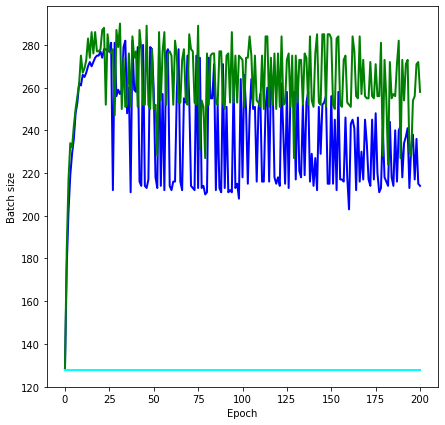

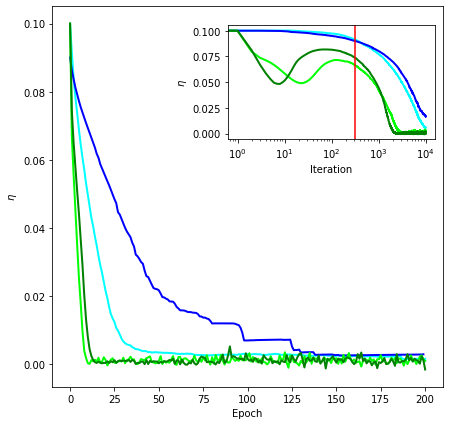

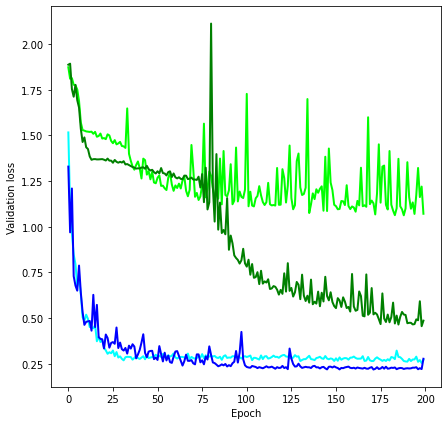

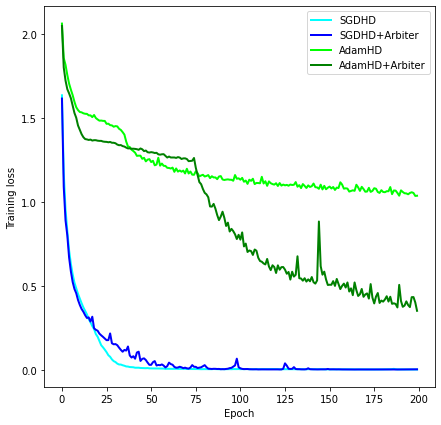

In [ ]:

''' Batch size plot
'''
fig1, ax1 = plt.figure(figsize=(7,7)), plt.gca()
ax1.plot(s_pred_sgd, color='b', lw=2)
ax1.plot(s_pred_adam, color='g', lw=2)
ax1.plot(s_constant, color='cyan', lw=2)
plt.xlabel('Epoch')
plt.ylabel('Batch size')
# ax11 = plt.axes([0,0,1,1])
# # Manually set the position and relative size of the inset axes within ax1
# ip = InsetPosition(ax1, [0.6,0.2,0.4,0.2])
# ax11.set_axes_locator(ip)
# ax11.plot(F_sgd, c='cyan', lw=2, alpha=1)
# # ax11.plot(F_adam, c='g', lw=2, alpha=1)
# ax11.set_xscale('log')
# ax11.set_xlabel('Iteration')
# ax11.set_ylabel('F')
# plt.legend(loc='best')
# plt.savefig(os.path.join(next_path, 'vanilla-sgdhd(n=0.1)-batchSize.eps'))



# ''' for some reason, AdamHD computes 46 other lrs before reaching the iter level lr (WHY?)
#     so I've had to select the lrit at each 46th iter.
# '''
# lrit2 = np.append(0.1,np.array([lrit_adamhd[i] for i in range(len(lrit_adamhd)) if i%46==0]))
# lrit2_bs = np.append(0.1,np.array([lrit_adamhd_bs[i] for i in range(len(lrit_adamhd_bs)) if i%46==0]))

''' Learning rate plot 
'''
fig2, ax2 = plt.figure(figsize=(7,7)), plt.gca()
ax2.plot(lr_sgdhd, color='cyan',lw=2)
ax2.plot(lr_sgdhd_bs, color='b',lw=2)
ax2.plot(lr_adamhd, color='lime', lw=2)
ax2.plot(lr_adamhd_bs, color='g', lw=2)
# ax2.axvline(x=1,color='r')
plt.xlabel('Epoch')
plt.ylabel(r'$\eta$')
# ax2.set_yscale('log')
# first plot
ax2a = plt.axes([0,0,1,1],label='a')
ip1 = InsetPosition(ax2, [0.45,0.65,0.53,0.3])
ax2a.set_axes_locator(ip1)
ax2a.plot(lrit_sgdhd[:10000], c='cyan', lw=2, alpha=1)
ax2a.plot(lrit_sgdhd_bs[:10000], c='b', lw=2, alpha=1)
ax2a.plot(lrit_adamhd2[:10000], c='lime', lw=2, alpha=1)
ax2a.plot(lrit_adamhd2_bs[:10000], c='g', lw=2, alpha=1)
# ax2a.plot(lrit_adamhd[:10000], c='lime', lw=2, alpha=1)
# ax2a.plot(lrit_adamhd_bs[:10000], c='g', lw=2, alpha=1)
ax2a.axvline(x=313,color='r')
# ax2a.plot(h_adamhd, c='lightgreen', lw=2, alpha=1)
# ax2a.plot(h_adamhd_bs, c='g', lw=2, alpha=1)
ax2a.set_xscale('log')
# ax2a.set_ylim(bottom=0.00035,top=0.001)
# ax2a.set_yscale('symlog')
ax2a.set_xlabel('Iteration')
ax2a.set_ylabel(r'$\eta$')
# plt.savefig(os.path.join(next_path, 'vanilla-sgdhd(n=0.1)-learningRate.eps'))


''' Validation loss
'''
fig3,ax3 = plt.figure(figsize=(7,7)), plt.gca()
ax3.plot(val_loss1, color='cyan', lw=2)
ax3.plot(val_loss2, color='b', lw=2)
# ax3.set_yscale('log')
ax3.plot(val_loss3 , color='lime', lw=2)
ax3.plot(val_loss4, color='g', lw=2)
plt.xlabel('Epoch')
plt.ylabel('Validation loss')
# plt.legend(loc='best')
# plt.savefig(os.path.join(next_path, 'vanilla-sgdhd(n=0.1)-valLoss.eps'))

''' Training loss
'''
fig4,ax4 = plt.figure(figsize=(7,7)), plt.gca()
ax4.plot(train_loss1, color='cyan', lw=2, label=r'SGDHD')
ax4.plot(train_loss2, color='b', lw=2, label=r'SGDHD+Arbiter')
ax4.plot(train_loss3, color='lime', lw=2, label=r'AdamHD')
ax4.plot(train_loss4, color='g', lw=2, label=r'AdamHD+Arbiter')
plt.xlabel('Epoch')
plt.ylabel('Training loss')
plt.legend(loc='best')
# plt.savefig(os.path.join(next_path, 'vanilla-sgdhd(n=0.1)-trainLoss.eps'))


In [ ]:
lrit_sgdhd = np.loadtxt(os.path.join(sgd_path1, 'lr_iter.txt'), unpack=True).astype(np.float)
lrit_sgdhd_bs = np.loadtxt(os.path.join(sgd_path2, 'lr_iter.txt'), unpack=True).astype(np.float)
lrit_adamhd = np.loadtxt(os.path.join(adam_path1, 'lr_iter.txt'), unpack=True).astype(np.float)
lrit_adamhd_bs = np.loadtxt(os.path.join(adam_path2, 'lr_iter.txt'), unpack=True).astype(np.float)


In [ ]:
''' for some reason, AdamHD computes 46 other lrs before reaching the iter level lr (WHY?)
    so I've had to select the lrit at each 46th iter.
'''
lrit2 = np.append(0.1,np.array([lrit_adamhd[i] for i in range(len(lrit_adamhd)) if i%46==0]))
lrit2_bs = np.append(0.1,np.array([lrit_adamhd_bs[i] for i in range(len(lrit_adamhd_bs)) if i%46==0]))

''' Learning rate plot 
'''
fig2, ax2 = plt.figure(figsize=(7,7)), plt.gca()
ax2.plot(lr_sgdhd, color='cyan',lw=2)
ax2.plot(lr_sgdhd_bs, color='b',lw=2)
ax2.plot(lr_adamhd, color='lime', lw=2)
ax2.plot(lr_adamhd_bs, color='g', lw=2)
# ax2.axvline(x=1,color='r')
plt.xlabel('Epoch')
plt.ylabel(r'$\eta$')
# ax2.set_yscale('log')
# first plot
ax2a = plt.axes([0,0,1,1],label='a')
ip1 = InsetPosition(ax2, [0.45,0.69,0.53,0.3])
ax2a.set_axes_locator(ip1)
ax2a.plot(lrit_sgdhd[:10000], c='cyan', lw=2, alpha=1)
ax2a.plot(lrit_sgdhd_bs[:10000], c='b', lw=2, alpha=1)
ax2a.plot(lrit2[:10000], c='lime', lw=2, alpha=1)
ax2a.plot(lrit2_bs[:10000], c='g', lw=2, alpha=1)
# ax2a.plot(lrit_adamhd[:10000], c='lime', lw=2, alpha=1)
# ax2a.plot(lrit_adamhd_bs[:10000], c='g', lw=2, alpha=1)
ax2a.axvline(x=313,color='r')
# ax2a.plot(h_adamhd, c='lightgreen', lw=2, alpha=1)
# ax2a.plot(h_adamhd_bs, c='g', lw=2, alpha=1)
ax2a.set_xscale('log')
# ax2a.set_yscale('symlog')
# ax2a.set_xlabel('Iteration')
ax2a.set_ylabel(r'$\eta$')
# # second plot
# ax2b = plt.axes([0,0,1,1], label='b')
# ip2 = InsetPosition(ax2, [0.59,0.3,0.4,0.3])
# ax2b.set_axes_locator(ip2)
# ax2b.plot(lrit_adamhd, c='lime', lw=2, alpha=1)
# ax2b.plot(lrit_adamhd_bs, c='g', lw=2, alpha=1)
# ax2b.set_xscale('log')
# ax2b.set_yscale('symlog')
# ax2b.set_xlabel('Iteration')
# ax2b.set_ylabel(r'$\nabla_{\eta}L$')
# # ax2b.set_xlabel('Iteration')
# ax2b.set_ylabel(r'$\nabla_{\eta}L$')
# plt.legend(loc='best')
# # plt.savefig(os.path.join(root_path, 'allHD-learningRate.eps'))

# ''' Training loss
# '''
# fig,ax = plt.figure(figsize=(7,7)), plt.gca()
# ax.plot(lrit_sgdhd, color='cyan', lw=2, label=r'SGDHD')
# ax.plot(lrit_sgdhd_bs, color='b', lw=2, label=r'SGDHD+Arbiter')
# ax.plot(lrit_adamhd, color='lime', lw=2, label=r'AdamHD')
# ax.plot(lrit_adamhd_bs, color='g', lw=2, label=r'AdamHD+Arbiter')
# ax.set_xscale('log')
# plt.xlabel('Epoch')
# plt.ylabel('Learning rate')
# # plt.legend(loc='best')


[0.1        0.1        0.07958652 0.07372057 0.07122672 0.06900134
 0.06665627 0.06439557 0.06226113 0.06027072]


In [ ]:
adam_path = os.path.join(next_path, 'section2/WRN/Adam/hd/adamhd-beta=1e-8/logs')
lrit= np.loadtxt(os.path.join(adam_path, 'lr_iter.txt'), unpack=True).astype(np.float)


# Batch size scheduling

In [ ]:
next_path = os.path.join(root_path, 'ho/batch-size/experiments')

# SGD 
path1 = os.path.join(next_path, 'section3/WRN/n=0.05/constant')
path2 = os.path.join(next_path, 'section3/WRN/n=0.05/fixed/logs')
# path3 = os.path.join(next_path, 'section3/VGG/n=0.05/fixed+arbiter(a=1e-5,p=1e-7)/logs')
path3 = os.path.join(next_path, 'section3/WRN/n=0.05/(USE)fixed+arbiter(a=1e-5,p=1e-7)/logs')

train_loss1 = np.loadtxt(os.path.join(path1, 'train_loss.txt'), unpack=True).astype(np.float)
train_loss2 = np.loadtxt(os.path.join(path2, 'train_loss.txt'), unpack=True).astype(np.float)
train_loss3 = np.loadtxt(os.path.join(path3, 'train_loss.txt'), unpack=True).astype(np.float)
# 

# validation loss
val_loss1 = np.loadtxt(os.path.join(path1, 'val_loss.txt'), unpack=True).astype(np.float)
val_loss2 = np.loadtxt(os.path.join(path2, 'val_loss.txt'), unpack=True).astype(np.float)
val_loss3 = np.loadtxt(os.path.join(path3, 'val_loss.txt'), unpack=True).astype(np.float)
#
val_acc1 = np.loadtxt(os.path.join(path1, 'val_acc.txt'), unpack=True).astype(np.float)
val_acc2 = np.loadtxt(os.path.join(path2, 'val_acc.txt'), unpack=True).astype(np.float)
val_acc3 = np.loadtxt(os.path.join(path3, 'val_acc.txt'), unpack=True).astype(np.float)

test_loss1 = np.loadtxt(os.path.join(path1, 'test_loss.txt'), unpack=True).astype(np.float)
test_loss2 = np.loadtxt(os.path.join(path2, 'test_loss.txt'), unpack=True).astype(np.float)
test_loss3 = np.loadtxt(os.path.join(path3, 'test_loss.txt'), unpack=True).astype(np.float)
# test accuracy
test_acc1 = np.loadtxt(os.path.join(path1, 'test_acc.txt'), unpack=True).astype(np.float)
test_acc2 = np.loadtxt(os.path.join(path2, 'test_acc.txt'), unpack=True).astype(np.float)
test_acc3 = np.loadtxt(os.path.join(path3, 'test_acc.txt'), unpack=True).astype(np.float)
# val_loss4 = np.loadtxt(os.path.join(path4, 'val_loss.txt'), unpack=True).astype(np.float)


# Batch size results
s_constant = np.full(len(val_loss1),64) 
s_sched = np.concatenate([np.full(25,64), np.full(25,128), np.full(50,256), np.full(100,512)])
s_pred = np.loadtxt(os.path.join(path3, 'bse.txt'), unpack=True).astype(np.int)
# print(s_pred)
# s_pred2 = np.loadtxt(os.path.join(path4, 'bse.txt'), unpack=True).astype(np.int)

''' Batch size plot
'''
fig1, ax1 = plt.figure(figsize=(7,7)), plt.gca()
ax1.plot(s_constant, color='black')
ax1.plot(s_sched, color='blue')
ax1.plot(s_pred, color='orange')
# ax1.plot(s_pred2, color='red')
plt.xlabel('Epoch')
plt.ylabel('Batch size')
# plt.savefig(os.path.join(path1, 'scheds-batchSize.eps'))

''' train loss
'''
fig2,ax2 = plt.figure(figsize=(7,7)), plt.gca()
ax2.plot(train_loss1, color='black', lw=2,  label=r'None')
ax2.plot(train_loss2, color='blue', lw=2,  label=r'Fixed')
ax2.plot(train_loss3 , color='orange', lw=2, label=r'Fixed + Arbiter')
# ax3.plot(val_loss4, color='red', lw=2, label=r'Fixed + Arbiter(b)')
plt.xlabel('Epoch')
plt.ylabel('Train loss')
# plt.legend(loc='best')
# plt.savefig(os.path.join(next_path, 'sched-trainLoss.eps'))


''' Validation loss
'''
fig3,ax3 = plt.figure(figsize=(7,7)), plt.gca()
ax3.plot(val_loss1, color='black', lw=2,  label=r'None')
ax3.plot(val_loss2, color='blue', lw=2,  label=r'Fixed')
ax3.plot(val_loss3 , color='orange', lw=2, label=r'Fixed + Arbiter')
# ax3.plot(val_loss4, color='red', lw=2, label=r'Fixed + Arbiter(b)')
plt.xlabel('Epoch')
plt.ylabel('Validation loss')
# plt.legend(loc='best')
# plt.savefig(os.path.join(next_path, 'sched-valLoss.eps'))

''' Test accuracy
'''
fig4,ax4 = plt.figure(figsize=(7,7)), plt.gca()
ax4.plot(test_acc1, color='black', lw=2,  label=r'None')
ax4.plot(test_acc2, color='blue', lw=2,  label=r'Fixed')
ax4.plot(test_acc3 , color='orange', lw=2, label=r'Fixed + Arbiter')
# ax3.plot(val_loss4, color='red', lw=2, label=r'Fixed + Arbiter(b)')
plt.xlabel('Epoch')
plt.ylabel('Test accuracy')
plt.legend(loc='best')
# plt.savefig(os.path.join(path1, 'sched-testAcc.eps'))


In [ ]:

# Loss
print(min(val_loss1),min(val_loss2),min(val_loss3))
print(min(test_loss1),min(test_loss2),min(test_loss3))

# accuracy
print(max(val_acc1),max(val_acc2),max(val_acc3))
print(max(test_acc1),max(test_acc2),max(test_acc3))

0.36088 0.19612 0.190123
0.374115 0.211177 0.206004
87.86 93.9 94.26
87.59 93.91 94.0


# My heuristic

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


125000
39200
35904
[625, 1107, 1584, 2262, 2952, 3654, 4356, 5058, 5535, 6237, 6714, 7303, 7785, 8365, 8831, 9420, 9897, 10477, 10954, 11534, 12005, 12476, 12942, 13413, 13879, 14192, 14463, 14736, 15031, 15307, 15572, 15867, 16132, 16427, 16717, 17007, 17264, 17563, 17817, 18095, 18347, 18621, 18888, 19142, 19415, 19686, 19955, 20222, 20466, 20723, 20880, 21031, 21185, 21337, 21485, 21635, 21789, 21939, 22090, 22241, 22390, 22544, 22693, 22843, 22996, 23148, 23299, 23448, 23598, 23751, 23900, 24050, 24204, 24357, 24509, 24657, 24806, 24957, 25112, 25262, 25413, 25563, 25714, 25864, 26016, 26164, 26313, 26464, 26614, 26768, 26919, 27070, 27223, 27376, 27526, 27677, 27826, 27976, 28125, 28273, 28352, 28430, 28508, 28586, 28664, 28742, 28817, 28895, 28973, 29047, 29125, 29203, 29281, 29355, 29429, 29507, 29585, 29659, 29737, 29815, 29893, 29967, 30045, 30123, 30201, 30279, 30353, 30431, 30505, 30583, 30661, 30739, 30814, 30888, 30962, 31040, 31115, 31193, 31271, 31345, 31423, 31501, 3157

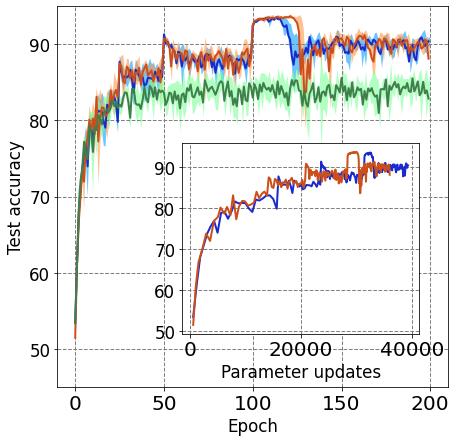

In [ ]:
next_path = os.path.join(root_path, 'ho/hyperparameter-optimisation/batch-size/experiments/heuristics/mine')

path1    = os.path.join(next_path, 'heuristic/exp1(icml)')
path11   = os.path.join(next_path, 'heuristic/exp2/logs')
path111  = os.path.join(next_path, 'heuristic/exp3/logs')
path1111 = os.path.join(next_path, 'heuristic/exp4/logs')
path2    = os.path.join(next_path, 'arbiter+heuristic/repeat-ICML-exps/exp1(icml)')
path22    = os.path.join(next_path, 'arbiter+heuristic/repeat-ICML-exps/exp2/logs')
path222    = os.path.join(next_path, 'arbiter+heuristic/repeat-ICML-exps/exp3/logs')
path2222   = os.path.join(next_path, 'arbiter+heuristic/repeat-ICML-exps/exp4/logs')
path3    = os.path.join(next_path, 'constant/exp1(icml)')
path33   = os.path.join(next_path, 'constant/exp2')
path333  = os.path.join(next_path, 'constant/exp3')
path3333 = os.path.join(next_path, 'constant/exp4')

# Batch size results
s_constant = np.full(200, 64) 
s_sched = np.concatenate([np.full(25,64), np.full(25,128), np.full(50,256), np.full(100,512)])
s_arb = np.loadtxt(os.path.join(path2, 'bse.txt'), unpack=True).astype(int)


''' Batch size plot
'''
fig1, ax1 = plt.figure(figsize=(7,7)), plt.gca()
ax1.plot(s_arb, color='#CC4F1B',  label=r'Heuristic + Arbiter')
ax1.plot(s_sched, color='#1B2ACC',  label=r'Heuristic')
ax1.plot(s_constant, color='#3F7F4C',  label=r'Constant')
plt.xlabel('Epoch')
plt.ylabel('Batch size')
ax1.grid(color='gray', linewidth=1, linestyle='--')
plt.legend(loc='lower right')
plt.savefig(os.path.join(next_path, 'ICML-format-batchSize.eps'))

# test loss
test_loss1    = np.loadtxt(os.path.join(path1, 'test_loss.txt'), unpack=True).astype(float)
test_loss11   = np.loadtxt(os.path.join(path11, 'test_loss.txt'), unpack=True).astype(float)
test_loss111  = np.loadtxt(os.path.join(path111, 'test_loss.txt'), unpack=True).astype(float)
test_loss1111 = np.loadtxt(os.path.join(path1111, 'test_loss.txt'), unpack=True).astype(float)
test_loss2    = np.loadtxt(os.path.join(path2, 'test_loss.txt'), unpack=True).astype(float)
test_loss22   = np.loadtxt(os.path.join(path22, 'test_loss.txt'), unpack=True).astype(float)
test_loss222  = np.loadtxt(os.path.join(path222, 'test_loss.txt'), unpack=True).astype(float)
test_loss2222 = np.loadtxt(os.path.join(path2222, 'test_loss.txt'), unpack=True).astype(float)
test_loss3    = np.loadtxt(os.path.join(path3, 'test_loss.txt'), unpack=True).astype(float)
test_loss33   = np.loadtxt(os.path.join(path33, 'test_loss.txt'), unpack=True).astype(float)
test_loss333  = np.loadtxt(os.path.join(path333, 'test_loss.txt'), unpack=True).astype(float)
test_loss3333 = np.loadtxt(os.path.join(path3333, 'test_loss.txt'), unpack=True).astype(float)

# test accuracy
test_acc1    = np.loadtxt(os.path.join(path1, 'test_acc.txt'), unpack=True).astype(float)
test_acc11   = np.loadtxt(os.path.join(path11, 'test_acc.txt'), unpack=True).astype(float)
test_acc111  = np.loadtxt(os.path.join(path111, 'test_acc.txt'), unpack=True).astype(float)
test_acc1111 = np.loadtxt(os.path.join(path1111, 'test_acc.txt'), unpack=True).astype(float)
test_acc2    = np.loadtxt(os.path.join(path2, 'test_acc.txt'), unpack=True).astype(float)
test_acc22   = np.loadtxt(os.path.join(path22, 'test_acc.txt'), unpack=True).astype(float)
test_acc222  = np.loadtxt(os.path.join(path222, 'test_acc.txt'), unpack=True).astype(float)
test_acc2222 = np.loadtxt(os.path.join(path2222, 'test_acc.txt'), unpack=True).astype(float)
test_acc3    = np.loadtxt(os.path.join(path3, 'test_acc.txt'), unpack=True).astype(float)
test_acc33   = np.loadtxt(os.path.join(path33, 'test_acc.txt'), unpack=True).astype(float)
test_acc333  = np.loadtxt(os.path.join(path333, 'test_acc.txt'), unpack=True).astype(float)
test_acc3333 = np.loadtxt(os.path.join(path3333, 'test_acc.txt'), unpack=True).astype(float)

''' average over multiple experiments
'''
avg_mine_test_acc, std_mine_test_acc = [], []
avg_arbicml_test_acc, std_arbicml_test_acc = [], []
avg_const_test_acc, std_const_test_acc = [], []

for i in range(len(test_acc1)):
    avg_mine_test_acc.append(np.mean([test_acc1[i], test_acc11[i], test_acc111[i], test_acc1111[i]]))
    std_mine_test_acc.append(np.std( [test_acc1[i], test_acc11[i], test_acc111[i], test_acc1111[i]]))    
    avg_arbicml_test_acc.append(np.mean([  test_acc2[i], test_acc22[i], test_acc222[i], test_acc2222[i]]))
    std_arbicml_test_acc.append(np.std([   test_acc2[i], test_acc22[i], test_acc222[i], test_acc2222[i]]))
    avg_const_test_acc.append(np.mean([  test_acc3[i], test_acc33[i], test_acc333[i], test_acc3333[i]]))
    std_const_test_acc.append(np.std([   test_acc3[i], test_acc33[i], test_acc333[i], test_acc3333[i]]))

avg_mine = np.array(avg_mine_test_acc)
std_mine = np.array(std_mine_test_acc)
avg_arb = np.array(avg_arbicml_test_acc)
std_arb = np.array(std_arbicml_test_acc)
avg_const = np.array(avg_const_test_acc)
std_const = np.array(std_const_test_acc)



''' Test accuracy
'''
x = np.linspace(0,200,200)
fignew, axnew  = plt.figure(figsize=(7,7)), plt.gca()
plt.plot(avg_mine, color='#1B2ACC',   lw=2)
plt.fill_between(x, avg_mine-std_mine, avg_mine+std_mine, alpha=0.6, facecolor='#089FFF')
plt.plot(avg_arb,   color='#CC4F1B',   lw=2,  label=r'Arbiter+Heuristic')
plt.fill_between(x, avg_arb-std_arb, avg_arb+std_arb, alpha=0.6, facecolor='#FF9848')
plt.plot(avg_const,   color='#3F7F4C',   lw=2,  label=r'Constant')
plt.fill_between(x, avg_const-std_const, avg_const+std_const, alpha=0.6, facecolor='#7EFF99')
plt.ylim([45,95])
plt.xlabel('Epoch')
plt.ylabel('Test accuracy')
# plt.legend(loc='best')
axnew.grid(color='gray', linewidth=1, linestyle='--')
# plt.savefig(os.path.join(next_path, 'prac-mine+arbiter_DONE.eps'))

# number of updates
N = 40000
n1 = [int(np.ceil(N/b)) for b in s_constant]
n2 = [int(np.ceil(N/b)) for b in s_sched]
n3 = [int(np.ceil(N/b)) for b in s_arb]
print(sum(n1))
print(sum(n2))
print(sum(n3))

n=0
j = 0
x_arbiter_updates= []
for i,_ in enumerate(n3):
  n = n3[i]
  j+=n
  x_arbiter_updates.append(j)
print(x_arbiter_updates)

n=0
j = 0
x_heur_updates= []
for i,_ in enumerate(n2):
  n = n2[i]
  j+=n
  x_heur_updates.append(j)
print(x_heur_updates)

n=0
j = 0
x_const_updates= []
for i,_ in enumerate(n1):
  n = n1[i]
  j+=n
  x_const_updates.append(j)
print(x_const_updates)


''' Test accuracy
'''
x = np.linspace(0,200,200)
fignew2, axnew2  = plt.figure(figsize=(7,7)), plt.gca()
plt.plot(avg_mine, color='#1B2ACC',   lw=2)
plt.fill_between(x, avg_mine-std_mine, avg_mine+std_mine, alpha=0.6, facecolor='#089FFF')
plt.plot(avg_arb,   color='#CC4F1B',   lw=2,  label=r'Arbiter+Heuristic')
plt.fill_between(x, avg_arb-std_arb, avg_arb+std_arb, alpha=0.6, facecolor='#FF9848')
plt.plot(avg_const,   color='#3F7F4C',   lw=2,  label=r'Constant')
plt.fill_between(x, avg_const-std_const, avg_const+std_const, alpha=0.6, facecolor='#7EFF99')
plt.ylim([45,95])
plt.xlabel('Epoch')
plt.ylabel('Test accuracy')
# plt.legend(loc='best')
axnew2.grid(color='gray', linewidth=1, linestyle='--')
#
ax11 = plt.axes([0,0,1,1])
# Manually set the position and relative size of the inset axes within ax1
ip = InsetPosition(ax1, [0.32,0.14,0.605,0.5])
ax11.set_axes_locator(ip)
ax11.plot(x_heur_updates, avg_mine,  lw=2, color='#1B2ACC')
ax11.plot(x_arbiter_updates, avg_arb, lw=2,  color='#CC4F1B')
# ax11.plot(x_onst_updates, avg_const, lw=2,  color='#3F7F4C')
# ax11.set_ylim([45,95])
# ax11.set_xlim([0,28500])
ax11.set_xlabel('Parameter updates')
ax11.grid(color='gray', linewidth=1, linestyle='--')
# plt.legend(loc='best')
plt.savefig(os.path.join(next_path, 'ICML_testAcc_epochAndIters.eps'))

Performance 

In [ ]:
# Loss
# print(min(test_loss1))
# print(min(test_loss11))
# print(min(test_loss111))
# print(min(test_loss1111))
# print(min(test_loss2))
# print(min(test_loss22))
# print(min(test_loss222))
# print(min(test_loss2222))

# accuracy
print(max(avg_mine))
print(max(avg_const))
print(max(avg_arb))

# TODO: take max() across each experiment, then compute mean+std of that results

93.545
85.5875
93.6875


# Smith heuristic

plot heuristic for paper

In [ ]:
next_path = os.path.join(root_path, 'ho/hyperparameter-optimisation/batch-size/experiments/neurIPS-exps')

x = np.linspace(0,200, 200)
bs = list(np.concatenate([np.full(60,128), np.full(140,640)]))
eta = list(np.concatenate([np.full(120,0.1), np.full(40,0.02), np.full(40,0.004)]))

fig, ax1 = plt.subplots()
ax1.set_yticks([128,640])
ax1.plot(x, bs, 'g-')
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Batch size', color='g')
ax2 = ax1.twinx()
ax2.set_yticks([0.1,0.02,0.004])
ax2.plot(x, eta, 'b-')
ax2.set_ylabel('Learning rate', color='b')
ax1.grid(color='gray', linewidth=1, linestyle='--')
ax2.grid(color='gray', linewidth=1, linestyle='--')
plt.savefig(os.path.join(next_path, 'smith-heuristic.pdf'))

calculate number of param updates with arbiter heuristic

In [ ]:
import numpy as np

bs = [128, 142, 112, 105, 86, 105, 127, 104, 85, 103, 110, 84, 136, 110, 135, 136, 142, 183, 227, 183,
      239, 243, 238, 242, 248, 253, 277, 245, 321, 325, 275, 260, 298, 282, 288, 292, 323, 311, 293, 290,
      345, 294, 301, 305, 312, 355, 357, 311, 320, 363, 317, 379, 339, 339, 346, 331, 373, 346, 380, 348]
N = 40000

n = [int(np.ceil(N/b)) for b in bs]
print(n)
total = sum(n)
print(total)

total2 = 60*(np.ceil(N/128))
print(total2)

N_640 = int(np.ceil(N/640))

nArbiter_updates = list(np.concatenate([n,               np.full(140,N_640)]))
nSmith_updates = list(np.concatenate([np.full(60,313), np.full(140,N_640)]))
print(nArbiter_updates)
print(nSmith_updates)
print(sum(nArbiter_updates),sum(nSmith_updates))




[313, 282, 358, 381, 466, 381, 315, 385, 471, 389, 364, 477, 295, 364, 297, 295, 282, 219, 177, 219, 168, 165, 169, 166, 162, 159, 145, 164, 125, 124, 146, 154, 135, 142, 139, 137, 124, 129, 137, 138, 116, 137, 133, 132, 129, 113, 113, 129, 125, 111, 127, 106, 118, 118, 116, 121, 108, 116, 106, 115]
12047
18780.0
[313, 282, 358, 381, 466, 381, 315, 385, 471, 389, 364, 477, 295, 364, 297, 295, 282, 219, 177, 219, 168, 165, 169, 166, 162, 159, 145, 164, 125, 124, 146, 154, 135, 142, 139, 137, 124, 129, 137, 138, 116, 137, 133, 132, 129, 113, 113, 129, 125, 111, 127, 106, 118, 118, 116, 121, 108, 116, 106, 115, 63, 63, 63, 63, 63, 63, 63, 63, 63, 63, 63, 63, 63, 63, 63, 63, 63, 63, 63, 63, 63, 63, 63, 63, 63, 63, 63, 63, 63, 63, 63, 63, 63, 63, 63, 63, 63, 63, 63, 63, 63, 63, 63, 63, 63, 63, 63, 63, 63, 63, 63, 63, 63, 63, 63, 63, 63, 63, 63, 63, 63, 63, 63, 63, 63, 63, 63, 63, 63, 63, 63, 63, 63, 63, 63, 63, 63, 63, 63, 63, 63, 63, 63, 63, 63, 63, 63, 63, 63, 63, 63, 63, 63, 63, 63, 63, 

In [ ]:
next_path = os.path.join(root_path, 'ho/hyperparameter-optimisation/batch-size/experiments/heuristics/smith-hybrid')

# SGD 
path1 = os.path.join(next_path, 'heuristic/exp1')
path11 = os.path.join(next_path, 'heuristic/exp2')
path111 = os.path.join(next_path, 'heuristic/exp3')
path2 = os.path.join(next_path, 'arbiter/resetting-arbiter/removeSmithBatchSizeChange-1')
path3 = os.path.join(next_path, 'heuristic-B-scaled/B=128(ieC=1)')
path4 = os.path.join(next_path, 'heuristic-B-scaled/B=1280(ieC=10)/logs')
path5 = os.path.join(next_path, 'arbiter/9thMay_N=20_scheduleFirst60ThenSmith/exp1_may9')
path6 = os.path.join(next_path, 'arbiter/9thMay_N=20_scheduleFirst60ThenSmith/exp2_may10')
path7 = os.path.join(next_path, 'arbiter/9thMay_N=20_scheduleFirst60ThenSmith/exp3_may10')
path8 = os.path.join(next_path, 'arbiter/9thMay_N=20_scheduleFirst60ThenSmith/exp4_may10_best')

# train_loss1 = np.loadtxt(os.path.join(path1, 'train_loss.txt'), unpack=True).astype(float)
# train_loss2 = np.loadtxt(os.path.join(path2, 'train_loss.txt'), unpack=True).astype(float)
# # train_loss3 = np.loadtxt(os.path.join(path3, 'train_loss.txt'), unpack=True).astype(float)
# train_loss4 = np.loadtxt(os.path.join(path4, 'train_loss.txt'), unpack=True).astype(float)
# train_loss5 = np.loadtxt(os.path.join(path5, 'train_loss.txt'), unpack=True).astype(float)

# # validation loss
# val_loss1 = np.loadtxt(os.path.join(path1, 'val_loss.txt'), unpack=True).astype(float)
# val_loss2 = np.loadtxt(os.path.join(path2, 'val_loss.txt'), unpack=True).astype(float)
# val_loss3 = np.loadtxt(os.path.join(path3, 'val_loss.txt'), unpack=True).astype(float)
# val_loss4 = np.loadtxt(os.path.join(path4, 'val_loss.txt'), unpack=True).astype(float)
# val_loss5 = np.loadtxt(os.path.join(path5, 'val_loss.txt'), unpack=True).astype(float)
# #
# val_acc1 = np.loadtxt(os.path.join(path1, 'val_acc.txt'), unpack=True).astype(float)
# val_acc2 = np.loadtxt(os.path.join(path2, 'val_acc.txt'), unpack=True).astype(float)
# val_acc3 = np.loadtxt(os.path.join(path3, 'val_acc.txt'), unpack=True).astype(float)
# val_acc4 = np.loadtxt(os.path.join(path4, 'val_acc.txt'), unpack=True).astype(float)

# test_loss1 = np.loadtxt(os.path.join(path1, 'test_loss.txt'), unpack=True).astype(np.float)
# test_loss2 = np.loadtxt(os.path.join(path2, 'test_loss.txt'), unpack=True).astype(np.float)
# test_loss3 = np.loadtxt(os.path.join(path3, 'test_loss.txt'), unpack=True).astype(np.float)

# test accuracy
# test_acc1 = np.loadtxt(os.path.join(path1, 'test_acc.txt'), unpack=True).astype(float)
# test_acc2 = np.loadtxt(os.path.join(path2, 'test_acc.txt'), unpack=True).astype(float)
# test_acc3 = np.loadtxt(os.path.join(path3, 'test_acc.txt'), unpack=True).astype(float)
# test_acc4 = np.loadtxt(os.path.join(path4, 'test_acc.txt'), unpack=True).astype(float)
# test_acc5 = np.loadtxt(os.path.join(path5, 'test_acc.txt'), unpack=True).astype(float)
# test_acc6 = np.loadtxt(os.path.join(path6, 'test_acc.txt'), unpack=True).astype(float)
# test_acc7 = np.loadtxt(os.path.join(path7, 'test_acc.txt'), unpack=True).astype(float)
# test_acc8 = np.loadtxt(os.path.join(path8, 'test_acc.txt'), unpack=True).astype(float)

# Batch size results
s_constant1 = np.concatenate([np.full(60,128), np.full(140,1280)])
s_constant2 = np.full(200,128) 
s_sched = np.concatenate([np.full(60,128), np.full(140,640)])
s_pred = np.loadtxt(os.path.join(path2, 'bse.txt'), unpack=True).astype(int)
s_pred2 = np.concatenate([bs, np.full(140,640)])


''' Batch size plot
'''
fig1, ax1 = plt.figure(figsize=(7,7)), plt.gca()
# ax1.plot(s_constant1, color='green')
# ax1.plot(s_constant2, color='cyan')
# ax1.plot(s_pred, color='orange')
ax1.plot(s_pred2, color='#CC4F1B',  label=r'Heuristic [4] + Arbiter')
ax1.plot(s_sched, color='#1B2ACC',  label=r'Heuristic [4]')

plt.xlabel('Epoch')
plt.ylabel('Batch size')
ax1.grid(color='gray', linewidth=1, linestyle='--')
plt.legend(loc='best')
plt.savefig(os.path.join(next_path, 'GOOD-format-batchSize2.eps'))

# ''' train loss
# '''
# fig2,ax2 = plt.figure(figsize=(7,7)), plt.gca()
# ax2.plot(train_loss1, color='blue', lw=2)
# # ax2.plot(train_loss2 , color='orange', lw=2)
# # ax2.plot(train_loss3 , color='cyan', lw=2)
# # ax2.plot(train_loss4 , color='green', lw=2)
# ax2.plot(train_loss5 , color='red', lw=2)
# # ax3.plot(val_loss4, color='red', lw=2, label=r'Fixed + Arbiter(b)')
# plt.xlabel('Epoch')
# plt.ylabel('Train loss')
# plt.legend(loc='best')
# plt.savefig(os.path.join(next_path, 'GOOD-trainLoss(1).eps'))


# ''' Validation loss
# '''
# fig3,ax3 = plt.figure(figsize=(7,7)), plt.gca()
# ax3.plot(val_loss1, color='blue', lw=2)
# # ax3.plot(val_loss2, color='blue', lw=2)
# ax3.plot(val_loss3 , color='cyan', lw=2)
# ax3.plot(val_loss4, color='green', lw=2)
# ax3.plot(val_loss5, color='red', lw=2)
# plt.xlabel('Epoch')
# plt.ylabel('Validation loss')
# plt.legend(loc='best')
# # plt.savefig(os.path.join(next_path, 'sched-valLoss.eps'))

# ''' Test accuracy
# '''
# fig4,ax4 = plt.figure(figsize=(7,7)), plt.gca()
# ax4.plot(test_acc1, color='blue',   label=r'Heuristic')
# # ax4.plot(test_acc2 , color='orange', label=r'Heuristic + Arbiter')
# # ax4.plot(test_acc3, color='cyan',   label=r'Heuristic (B=128)')
# # ax4.plot(test_acc4, color='green',   label=r'Heuristic (B=1280)')
# # ax4.plot(test_acc5, color='red',   label=r'Arbiter + Heuristic')
# # ax4.plot(test_acc6, color='orange',   label=r'WRN 1')
# # ax4.plot(test_acc7, color='cyan',   label=r'WRN 2')
# ax4.plot(test_acc8, color='green',   label=r'WRN 3')

# plt.ylim([65,95])
# plt.xlabel('Epoch')
# plt.ylabel('Test accuracy')
# plt.legend(loc='best')
# plt.savefig(os.path.join(next_path, 'GOOD-testAcc_WRN3.eps'))


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


Average over multiple experiments

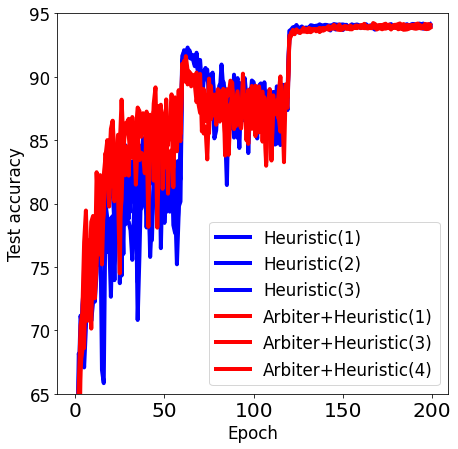

In [ ]:
next_path = os.path.join(root_path, 'ho/hyperparameter-optimisation/batch-size/experiments/heuristics/smith-hybrid')

# SGD 
path1    = os.path.join(next_path, 'heuristic/exp1')
path11   = os.path.join(next_path, 'heuristic/exp2')
path111  = os.path.join(next_path, 'heuristic/exp3')
path1111 = os.path.join(next_path, 'heuristic/exp4')
path2    = os.path.join(next_path, 'arbiter/9thMay_N=20_scheduleFirst60ThenSmith/exp1_may9')
path22   = os.path.join(next_path, 'arbiter/9thMay_N=20_scheduleFirst60ThenSmith/exp2_may10')
path222  = os.path.join(next_path, 'arbiter/9thMay_N=20_scheduleFirst60ThenSmith/exp3_may10')
path2222 = os.path.join(next_path, 'arbiter/9thMay_N=20_scheduleFirst60ThenSmith/exp4_may10_best')

# test accuracy
test_acc1    = np.loadtxt(os.path.join(path1, 'test_acc.txt'), unpack=True).astype(float)
test_acc11   = np.loadtxt(os.path.join(path11, 'test_acc.txt'), unpack=True).astype(float)
test_acc111  = np.loadtxt(os.path.join(path111, 'test_acc.txt'), unpack=True).astype(float)
test_acc1111 = np.loadtxt(os.path.join(path1111, 'test_acc.txt'), unpack=True).astype(float)
test_acc2    = np.loadtxt(os.path.join(path2, 'test_acc.txt'), unpack=True).astype(float)
test_acc22   = np.loadtxt(os.path.join(path22, 'test_acc.txt'), unpack=True).astype(float)
test_acc222  = np.loadtxt(os.path.join(path222, 'test_acc.txt'), unpack=True).astype(float)
test_acc2222 = np.loadtxt(os.path.join(path2222, 'test_acc.txt'), unpack=True).astype(float)

''' Test accuracy
'''
fig, ax  = plt.figure(figsize=(7,7)), plt.gca()
ax.plot(test_acc1, color='blue',   label=r'Heuristic(1)')
ax.plot(test_acc11 , color='blue', label=r'Heuristic(2)')
ax.plot(test_acc111, color='blue', label=r'Heuristic(3)')
ax.plot(test_acc2, color='red',  label=r'Arbiter+Heuristic(1)')
# ax.plot(test_acc22, color='red',  label=r'Arbiter+Heuristic(2)')
ax.plot(test_acc222, color='red',  label=r'Arbiter+Heuristic(3)')
ax.plot(test_acc2222, color='red',  label=r'Arbiter+Heuristic(4)')
plt.ylim([65,95])
plt.xlabel('Epoch')
plt.ylabel('Test accuracy')
plt.legend(loc='best')


Plot for number of parameter updates 

In [ ]:
n=0
j = 0
x_arbiter_updates= []
for i,_ in enumerate(nArbiter_updates):
  n = nArbiter_updates[i]
  j+=n
  x_arbiter_updates.append(j)

print(x_arbiter_updates)

n=0
j = 0
x_smith_updates= []
for i,_ in enumerate(nSmith_updates):
  n = nSmith_updates[i]
  j+=n
  x_smith_updates.append(j)
print(x_smith_updates)

[313, 595, 953, 1334, 1800, 2181, 2496, 2881, 3352, 3741, 4105, 4582, 4877, 5241, 5538, 5833, 6115, 6334, 6511, 6730, 6898, 7063, 7232, 7398, 7560, 7719, 7864, 8028, 8153, 8277, 8423, 8577, 8712, 8854, 8993, 9130, 9254, 9383, 9520, 9658, 9774, 9911, 10044, 10176, 10305, 10418, 10531, 10660, 10785, 10896, 11023, 11129, 11247, 11365, 11481, 11602, 11710, 11826, 11932, 12047, 12110, 12173, 12236, 12299, 12362, 12425, 12488, 12551, 12614, 12677, 12740, 12803, 12866, 12929, 12992, 13055, 13118, 13181, 13244, 13307, 13370, 13433, 13496, 13559, 13622, 13685, 13748, 13811, 13874, 13937, 14000, 14063, 14126, 14189, 14252, 14315, 14378, 14441, 14504, 14567, 14630, 14693, 14756, 14819, 14882, 14945, 15008, 15071, 15134, 15197, 15260, 15323, 15386, 15449, 15512, 15575, 15638, 15701, 15764, 15827, 15890, 15953, 16016, 16079, 16142, 16205, 16268, 16331, 16394, 16457, 16520, 16583, 16646, 16709, 16772, 16835, 16898, 16961, 17024, 17087, 17150, 17213, 17276, 17339, 17402, 17465, 17528, 17591, 17654, 1

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


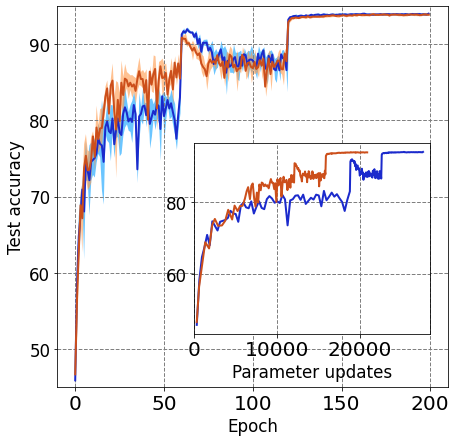

In [ ]:
avg_smith_test_acc, std_smith_test_acc = [], []
avg_arb_test_acc, std_arb_test_acc = [], []

for i in range(len(test_acc1)):
    avg_smith_test_acc.append(np.mean([test_acc1[i], test_acc11[i], test_acc111[i], test_acc1111[i]]))
    std_smith_test_acc.append(np.std( [test_acc1[i], test_acc11[i], test_acc111[i], test_acc1111[i]]))    
    avg_arb_test_acc.append(np.mean([  test_acc2[i], test_acc22[i], test_acc222[i], test_acc2222[i]]))
    std_arb_test_acc.append(np.std([   test_acc2[i], test_acc22[i], test_acc222[i], test_acc2222[i]]))

avg_smith = np.array(avg_smith_test_acc)
std_smith = np.array(std_smith_test_acc)
avg_arb = np.array(avg_arb_test_acc)
std_arb = np.array(std_arb_test_acc)

''' Test accuracy
'''
x = np.linspace(0,200,200)
figmean, axmean  = plt.figure(figsize=(7,7)), plt.gca()
plt.plot(avg_smith, color='#1B2ACC',   lw=2, label=r'Heuristic')
plt.fill_between(x, avg_smith-std_smith, avg_smith+std_smith, alpha=0.6, facecolor='#089FFF')
plt.plot(avg_arb,   color='#CC4F1B',   lw=2,  label=r'Arbiter+Heuristic')
plt.fill_between(x, avg_arb-std_arb, avg_arb+std_arb, alpha=0.6, facecolor='#FF9848')
plt.ylim([45,95])
plt.xlabel('Epoch')
plt.ylabel('Test accuracy')
# plt.legend(loc='best')
axmean.grid(color='gray', linewidth=1, linestyle='--')
#
ax11 = plt.axes([0,0,1,1])
# Manually set the position and relative size of the inset axes within ax1
ip = InsetPosition(ax1, [0.35,0.14,0.605,0.5])
ax11.set_axes_locator(ip)
ax11.plot(x_smith_updates, avg_smith,  lw=2, color='#1B2ACC')
ax11.plot(x_arbiter_updates, avg_arb, lw=2,  color='#CC4F1B')
# ax11.set_ylim([45,95])
ax11.set_xlim([0,28500])
# ax11.set_xscale('log')
ax11.set_xlabel('Parameter updates')
ax11.grid(color='gray', linewidth=1, linestyle='--')
# plt.legend(loc='best')
plt.savefig(os.path.join(next_path, 'prac-smith+arbiter_DONE.eps'))

# fig6,ax6 = plt.figure(figsize=(7,7)), plt.gca()
# ax6.plot(x_smith_updates, avg_smith, color='blue',   label=r'Heuristic')
# # ax6.plot(x_arbiter_updates, test_acc5, color='red',   label=r'Arbiter + Heuristic')
# ax6.plot(x_arbiter_updates, avg_arb, color='red',   label=r'Arbiter+Heuristic')
# # ax6.plot(x_arbiter_updates, test_acc7, color='cyan',   label=r'WRN 2')
# # ax6.plot(x_arbiter_updates, test_acc8, color='green',   label=r'WRN 3')
# plt.ylim([45,95])
# plt.xlim([0,28000])
# plt.xlabel('Parameter updates')
# plt.ylabel('Test accuracy')
# # plt.legend(loc='best')
# ax6.grid(color='gray', linewidth=1, linestyle='--')


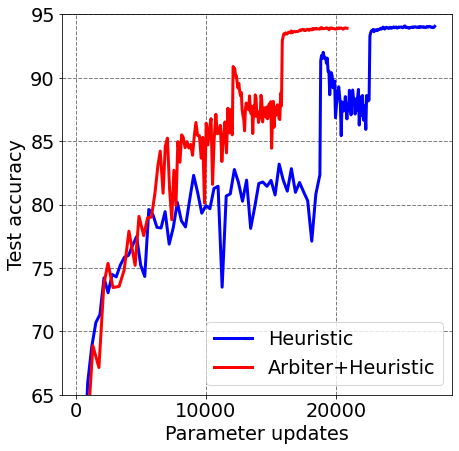

In [ ]:

''' Test accuracy: for parameter updates
'''
fig6,ax6 = plt.figure(figsize=(7,7)), plt.gca()
ax6.plot(x_smith_updates, avg_smith, color='blue',   label=r'Heuristic')
# ax6.plot(x_arbiter_updates, test_acc5, color='red',   label=r'Arbiter + Heuristic')
ax6.plot(x_arbiter_updates, avg_arb, color='red',   label=r'Arbiter+Heuristic')
# ax6.plot(x_arbiter_updates, test_acc7, color='cyan',   label=r'WRN 2')
# ax6.plot(x_arbiter_updates, test_acc8, color='green',   label=r'WRN 3')
plt.ylim([65,95])
plt.xlabel('Parameter updates')
plt.ylabel('Test accuracy')
plt.legend(loc='best')
ax6.grid(color='gray', linewidth=1, linestyle='--')

# plt.savefig(os.path.join(next_path, 'GOOD-testAcc_WRN1_ParamUpdates.eps'))


# Ablation results

n samples/interval

[128 209 245 258 266 272 273 282 279 283 252 282 285 257 255 255 281 285
 286 285 259 285 286 288 258 285 282 257 285 286 286 287 287 290 288 290
 290 289 293 292 290]
[128 272 282 288 292 301 289 301 303 273 309]


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


' plot sample space over iterations \n'

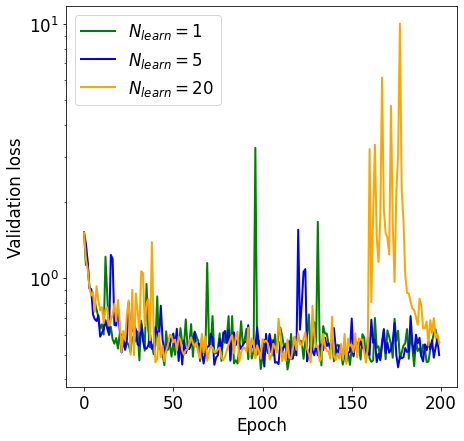

In [ ]:
from torch.functional import broadcast_tensors
next_path = os.path.join(root_path, 'ho/has/experiments/appendix/ablation-study')
# n-interval(done)/T=1
results_path1 = os.path.join(next_path, 'n-interval/T=1/logs')
results_path2 = os.path.join(next_path, 'n-interval/T=5/logs')
results_path3 = os.path.join(next_path, 'n-interval/T=20/logs')

# t1 = np.loadtxt(os.path.join(results_path1, 'train_loss.txt'), unpack=True).astype(np.float)
# t1 = np.loadtxt(os.path.join(results_path2, 'train_loss.txt'), unpack=True).astype(np.float)
# t1 = np.loadtxt(os.path.join(results_path3, 'train_loss.txt'), unpack=True).astype(np.float)

valLoss1 = np.loadtxt(os.path.join(results_path1, 'val_loss.txt'), unpack=True).astype(np.float)
valLoss2 = np.loadtxt(os.path.join(results_path2, 'val_loss.txt'), unpack=True).astype(np.float)
valLoss3 = np.loadtxt(os.path.join(results_path3, 'val_loss.txt'), unpack=True).astype(np.float)

testAcc1 = np.loadtxt(os.path.join(results_path1, 'test_acc.txt'), unpack=True).astype(np.float)
testAcc2 = np.loadtxt(os.path.join(results_path2, 'test_acc.txt'), unpack=True).astype(np.float)
testAcc3 = np.loadtxt(os.path.join(results_path3, 'test_acc.txt'), unpack=True).astype(np.float)

bs1 = np.loadtxt(os.path.join(results_path1, 'bse.txt'), unpack=True).astype(np.int)
bs2 = np.loadtxt(os.path.join(results_path2, 'bse.txt'), unpack=True).astype(np.int)
bs3 = np.loadtxt(os.path.join(results_path3, 'bse.txt'), unpack=True).astype(np.int)
print(bs2)
print(bs3)

bs2_full = np.concatenate([
np.full(5,128), np.full(5,209), np.full(5,245), np.full(5,258), np.full(5,266), np.full(5,272), np.full(5,273), np.full(5,282), 
np.full(5,279), np.full(5,283), np.full(5,252), np.full(5,282), np.full(5,285), np.full(5,257), np.full(5,255), np.full(5,255),
np.full(5,281), np.full(5,286), np.full(5,285), np.full(5,259), np.full(5,285), np.full(5,286), np.full(5,288), np.full(5,258),
np.full(5,285), np.full(5,282), np.full(5,257), np.full(5,285), np.full(5,286), np.full(5,286), np.full(5,287), np.full(5,287), 
np.full(5,290), np.full(5,288), np.full(5,290), np.full(5,290), np.full(5,289), np.full(5,293), np.full(5,292), np.full(5,290),
])

bs3_full = np.concatenate([
np.full(20,128), np.full(20,272), np.full(20,282), np.full(20,288), np.full(20,292), np.full(20,301), np.full(20,289),
np.full(20,301), np.full(20,303), np.full(20,273)
])



''' plot epoch level results (batch size, train/val loss)
'''
fig1, ax1 = plt.figure(figsize=(7,7)), plt.gca()
ax1.plot(bs1, color='green', lw=2)
ax1.plot(bs2_full, color='blue', lw=2)
ax1.plot(bs3_full, color='orange', lw=2)
plt.xlabel('Epoch')
plt.ylabel('Batch size')
plt.savefig(os.path.join(next_path,'batch-size.eps'))

fig2,ax2 = plt.figure(figsize=(7,7)), plt.gca()
ax2.plot(valLoss1, color='green',lw=2, label=r'$N_{learn}=1$')
ax2.plot(valLoss2, color='blue',lw=2, label=r'$N_{learn}=5$')
ax2.plot(valLoss3, color='orange',lw=2, label=r'$N_{learn}=20$')
ax2.set_yscale('log')
plt.xlabel('Epoch')
plt.ylabel('Validation loss')
plt.legend(loc='best')
plt.savefig(os.path.join(next_path,'val-loss.eps'))

# fig3,ax3 = plt.figure(figsize=(7,7)), plt.gca()
# ax3.plot(testAcc1, color='green', lw=2,     label=r'T=1')
# ax3.plot(testAcc2, color='blue', lw=2,  label=r'T=5')
# ax3.plot(testAcc3, color='orange', lw=2,    label=r'T=20')
# plt.xlabel('Epoch')
# plt.ylabel('Test accuracy')
# plt.legend(loc='best')
# # plt.savefig(os.path.join(next_path,'test-acc.eps'))


''' plot sample space over iterations 
'''
# s_alpha_nonstoch = np.loadtxt(os.path.join(results_path2, 's_alpha.txt'), unpack=True).astype(np.int)
# s_alpha_stoch = np.loadtxt(os.path.join(results_path4, 's_alpha.txt'), unpack=True).astype(np.int)

# samples_nonstoch= np.loadtxt(os.path.join(results_path2, 'bs_samples.txt'), unpack=True).astype(np.int)
# samples_stoch = np.loadtxt(os.path.join(results_path4, 'bs_samples.txt'), unpack=True).astype(np.int)

# alphas_nonstoch = np.loadtxt(os.path.join(results_path2, 'alphas.txt'), unpack=True).astype(np.float)
# alphas_stoch = np.loadtxt(os.path.join(results_path4, 'alphas.txt'), unpack=True).astype(np.float)

# s_min2 = samples_nonstoch[0,:]
# s_max2 = samples_nonstoch[3,:]
# s_min4 = samples_stoch[0,:]
# s_max4 = samples_stoch[3,:]

# # for some reason, some of the 'bs_samples.txt' files havent been written properly
# # such that most of them are missing.
# # luckily, I've saved the logits, so lets get them in and convert them to batch size samples.
# if len(s_min4) != len(samples_stoch):
#     import torch
#     def convertToBatchSize(l):
#         ''' given logit lying in R, convert to batch size to lie in N. 
#             default min and max, but could be changed s.t. GPU capacity.
#         '''
#         x = (512 - 8)*torch.sigmoid(l) + 8
#         return int(np.floor(x.item()))

#     logits = np.loadtxt(os.path.join(results_path4, 'logits.txt'), unpack=True).astype(np.float)
#     logit_tensor = torch.from_numpy(logits)
#     s_min4 = [convertToBatchSize(l) for l in logit_tensor[0]]
#     s_max4 = [convertToBatchSize(l) for l in logit_tensor[3]]

# x2 = np.arange(0,len(s_min2))
# x4 = np.arange(0,len(s_min4))

# fig, ax = plt.figure(figsize=(7,7)), plt.gca()
# # # max and mins
# ax.plot(s_min2, color='orange', alpha=0.5, label='Boundary')
# ax.plot(s_max2, color='orange', alpha=0.5)
# ax.plot(s_min4, color='orange', alpha=0.5)
# ax.plot(s_max4, color='orange', alpha=0.5)
# # mixed sample (s_alpha)
# ax.plot(s_alpha_nonstoch,  color='green', alpha=1.0,    label=r'$s_{\alpha}$')
# ax.plot(s_alpha_stoch,  color='blue', alpha=1.0)
# # sample space
# ax.fill_between(x2, s_max2, s_min2, facecolor='green', alpha=0.75,    label='Search space')
# ax.fill_between(x4, s_max4, s_min4, facecolor='blue', alpha=0.75)
# plt.xlabel('Iteration')
# plt.ylabel('Batch size')
# # plt.show()
# ax.legend(loc='best')
# # ax.legend(((p1, p2), (p3, p4)), (r'$S_{\alpha}$', 'Search space'), loc='best')
# plt.savefig(os.path.join(root_path,'ho/bs-samples.png'))


# # ax.plot(np.transpose(samples), markevery=100, color='b', alpha=1.0, label=r'$S_{\alpha}$')  






# learning rates

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


' plot sample space over iterations \n'

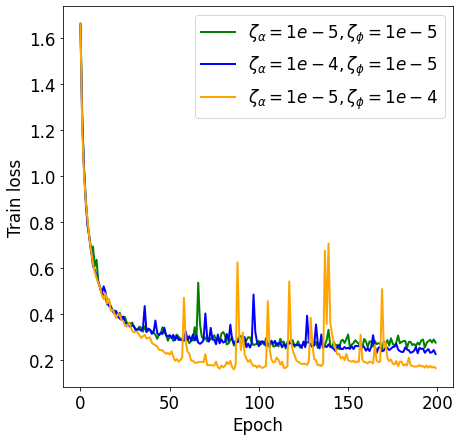

In [ ]:
from torch.functional import broadcast_tensors
next_path = os.path.join(root_path, 'ho/has/experiments/appendix/ablation-study')
# n-interval(done)/T=1
results_path1 = os.path.join(next_path, 'learning-rates/a=1e-5,p=1e-5/logs')
results_path2 = os.path.join(next_path, 'learning-rates/a=1e-4,p=1e-5/logs')
results_path3 = os.path.join(next_path, 'learning-rates/a=1e-5,p=1e-4/logs')

trainLoss1 = np.loadtxt(os.path.join(results_path1, 'train_loss.txt'), unpack=True).astype(np.float)
trainLoss2 = np.loadtxt(os.path.join(results_path2, 'train_loss.txt'), unpack=True).astype(np.float)
trainLoss3 = np.loadtxt(os.path.join(results_path3, 'train_loss.txt'), unpack=True).astype(np.float)

valLoss1 = np.loadtxt(os.path.join(results_path1, 'val_loss.txt'), unpack=True).astype(np.float)
valLoss2 = np.loadtxt(os.path.join(results_path2, 'val_loss.txt'), unpack=True).astype(np.float)
valLoss3 = np.loadtxt(os.path.join(results_path3, 'val_loss.txt'), unpack=True).astype(np.float)

testAcc1 = np.loadtxt(os.path.join(results_path1, 'test_acc.txt'), unpack=True).astype(np.float)
testAcc2 = np.loadtxt(os.path.join(results_path2, 'test_acc.txt'), unpack=True).astype(np.float)
testAcc3 = np.loadtxt(os.path.join(results_path3, 'test_acc.txt'), unpack=True).astype(np.float)

bs1 = np.loadtxt(os.path.join(results_path1, 'bse.txt'), unpack=True).astype(np.int)
bs2 = np.loadtxt(os.path.join(results_path2, 'bse.txt'), unpack=True).astype(np.int)
bs3 = np.loadtxt(os.path.join(results_path3, 'bse.txt'), unpack=True).astype(np.int)


''' plot epoch level results (batch size, train/val loss)
'''
fig1, ax1 = plt.figure(figsize=(7,7)), plt.gca()
ax1.plot(bs1, color='green', lw=2)
ax1.plot(bs2, color='blue', lw=2)
ax1.plot(bs3, color='orange', lw=2)
plt.xlabel('Epoch')
plt.ylabel('Batch size')
plt.savefig(os.path.join(next_path,'batch-size.eps'))

fig2,ax2 = plt.figure(figsize=(7,7)), plt.gca()
ax2.plot(valLoss1, color='green',lw=2, label=r'N=1')
ax2.plot(valLoss2, color='blue',lw=2, label=r'N=4')
ax2.plot(valLoss3, color='orange',lw=2, label=r'N=10')
# ax2.set_yscale('log')
plt.xlabel('Epoch')
plt.ylabel('Validation loss')
# plt.legend(loc='best')
plt.savefig(os.path.join(next_path,'val-loss.eps'))

fig3,ax3 = plt.figure(figsize=(7,7)), plt.gca()
ax3.plot(trainLoss1, color='green', lw=2,     label=r'$\zeta_{\alpha}=1e-5,\zeta_{\phi}=1e-5$')
ax3.plot(trainLoss2, color='blue', lw=2,      label=r'$\zeta_{\alpha}=1e-4,\zeta_{\phi}=1e-5$')
ax3.plot(trainLoss3, color='orange', lw=2,    label=r'$\zeta_{\alpha}=1e-5,\zeta_{\phi}=1e-4$')
plt.xlabel('Epoch')
plt.ylabel('Train loss')
plt.legend(loc='best')
plt.savefig(os.path.join(next_path,'train-loss.eps'))


''' plot sample space over iterations 
'''
s_alpha_nonstoch = np.loadtxt(os.path.join(results_path2, 's_alpha.txt'), unpack=True).astype(np.int)
s_alpha_stoch = np.loadtxt(os.path.join(results_path4, 's_alpha.txt'), unpack=True).astype(np.int)

samples_nonstoch= np.loadtxt(os.path.join(results_path2, 'bs_samples.txt'), unpack=True).astype(np.int)
samples_stoch = np.loadtxt(os.path.join(results_path4, 'bs_samples.txt'), unpack=True).astype(np.int)

alphas_nonstoch = np.loadtxt(os.path.join(results_path2, 'alphas.txt'), unpack=True).astype(np.float)
alphas_stoch = np.loadtxt(os.path.join(results_path4, 'alphas.txt'), unpack=True).astype(np.float)

s_min2 = samples_nonstoch[0,:]
s_max2 = samples_nonstoch[3,:]
s_min4 = samples_stoch[0,:]
s_max4 = samples_stoch[3,:]

# for some reason, some of the 'bs_samples.txt' files havent been written properly
# such that most of them are missing.
# luckily, I've saved the logits, so lets get them in and convert them to batch size samples.
if len(s_min4) != len(samples_stoch):
    import torch
    def convertToBatchSize(l):
        ''' given logit lying in R, convert to batch size to lie in N. 
            default min and max, but could be changed s.t. GPU capacity.
        '''
        x = (512 - 8)*torch.sigmoid(l) + 8
        return int(np.floor(x.item()))

    logits = np.loadtxt(os.path.join(results_path4, 'logits.txt'), unpack=True).astype(np.float)
    logit_tensor = torch.from_numpy(logits)
    s_min4 = [convertToBatchSize(l) for l in logit_tensor[0]]
    s_max4 = [convertToBatchSize(l) for l in logit_tensor[3]]

x2 = np.arange(0,len(s_min2))
x4 = np.arange(0,len(s_min4))

fig, ax = plt.figure(figsize=(7,7)), plt.gca()
# # max and mins
ax.plot(s_min2, color='orange', alpha=0.5, label='Boundary')
ax.plot(s_max2, color='orange', alpha=0.5)
ax.plot(s_min4, color='orange', alpha=0.5)
ax.plot(s_max4, color='orange', alpha=0.5)
# mixed sample (s_alpha)
ax.plot(s_alpha_nonstoch,  color='green', alpha=1.0,    label=r'$s_{\alpha}$')
ax.plot(s_alpha_stoch,  color='blue', alpha=1.0)
# sample space
ax.fill_between(x2, s_max2, s_min2, facecolor='green', alpha=0.75,    label='Search space')
ax.fill_between(x4, s_max4, s_min4, facecolor='blue', alpha=0.75)
plt.xlabel('Iteration')
plt.ylabel('Batch size')
# plt.show()
ax.legend(loc='best')
# ax.legend(((p1, p2), (p3, p4)), (r'$S_{\alpha}$', 'Search space'), loc='best')
# plt.savefig(os.path.join(root_path,'ho/bs-samples.png'))


# # ax.plot(np.transpose(samples), markevery=100, color='b', alpha=1.0, label=r'$S_{\alpha}$')  






# fixed + arbiter

In [ ]:

save_path = os.path.join(root_path, 'ho/has/experiments/appendix/additional-results/fixed+arbiter')
next_path = os.path.join(root_path, 'ho/has/experiments')

# SGD 
path1 = os.path.join(next_path, 'section3/WRN/n=0.05/constant')
path2 = os.path.join(next_path, 'section3/WRN/n=0.05/fixed/logs')
path3 = os.path.join(next_path, 'section3/WRN/n=0.05/(USE)fixed+arbiter(a=1e-5,p=1e-7)/logs')
path4 = os.path.join(next_path, 'section3/WRN/n=0.05/fixed+arbiter(a=1e-6,p=1e-8)/logs')
path5 = os.path.join(next_path, 'section3/WRN/n=0.05/other/(wentTo300AtEnd)fixed+arbiter(a=1e-3,p=1e-6)/logs')

# validation loss
val_loss1 = np.loadtxt(os.path.join(path1, 'val_loss.txt'), unpack=True).astype(np.float)
val_loss2 = np.loadtxt(os.path.join(path2, 'val_loss.txt'), unpack=True).astype(np.float)
val_loss3 = np.loadtxt(os.path.join(path3, 'val_loss.txt'), unpack=True).astype(np.float)
val_loss4 = np.loadtxt(os.path.join(path4, 'val_loss.txt'), unpack=True).astype(np.float)
val_loss5 = np.loadtxt(os.path.join(path5, 'val_loss.txt'), unpack=True).astype(np.float)

# test accuracy
test_acc1 = np.loadtxt(os.path.join(path1, 'test_acc.txt'), unpack=True).astype(np.float)
test_acc2 = np.loadtxt(os.path.join(path2, 'test_acc.txt'), unpack=True).astype(np.float)
test_acc3 = np.loadtxt(os.path.join(path3, 'test_acc.txt'), unpack=True).astype(np.float)
test_acc4 = np.loadtxt(os.path.join(path4, 'test_acc.txt'), unpack=True).astype(np.float)
test_acc5 = np.loadtxt(os.path.join(path5, 'test_acc.txt'), unpack=True).astype(np.float)


# Batch size results
s_constant = np.full(len(val_loss1),64) 
s_sched = np.concatenate([np.full(25,64), np.full(25,128), np.full(50,256), np.full(100,512)])
s_pred1 = np.loadtxt(os.path.join(path3, 'bse.txt'), unpack=True).astype(np.int)
s_pred2 = np.loadtxt(os.path.join(path4, 'bse.txt'), unpack=True).astype(np.int)
s_pred3 = np.loadtxt(os.path.join(path5, 'bse.txt'), unpack=True).astype(np.int)
# print(s_pred)
# s_pred2 = np.loadtxt(os.path.join(path4, 'bse.txt'), unpack=True).astype(np.int)


# params = {'figure.figsize':(8.5,7),
#           'legend.fontsize':'large',
#           'axes.labelsize':'x-large',
#           'xtick.labelsize':'x-large',
#           'ytick.labelsize':'large',
#           # 'font.size' : 18,
#         }
# pylab.rcParams.update(params)


''' Batch size plot
'''
fig1, ax1 = plt.figure(), plt.gca()
ax1.plot(s_constant, color='black',lw=3)
ax1.plot(s_sched, color='blue',lw=3)
ax1.plot(s_pred1, color='orange',lw=3)
# ax1.plot(s_pred2, color='red')
# ax1.plot(s_pred3, color='green')
plt.xlabel('Epoch')
plt.ylabel('Batch size')
plt.xlim(0,200)
ax1.grid(color='gray', linewidth=1, linestyle='--')
# plt.savefig(os.path.join(next_path, 'allScheds-batchSize.eps'))

''' Validation loss
'''
fig3,ax3 = plt.figure(), plt.gca()
ax3.plot(val_loss1, color='black', lw=3,  label=r'None')
ax3.plot(val_loss2, color='blue', lw=3,  label=r'Fixed')
ax3.plot(val_loss3 , color='orange', lw=3, label=r'Fixed + Arbiter')
ax3.grid(color='gray', linewidth=1, linestyle='--')
# ax3.plot(val_loss4, color='red', lw=2, label=r'Fixed + Arbiter(b)')
# ax3.plot(val_loss5, color='green', lw=2, label=r'Fixed + Arbiter(b)')
plt.xlabel('Epoch')
plt.ylabel('Validation loss')
# plt.legend(loc='best')
# plt.savefig(os.path.join(save_path, 'sched-valLoss.eps'))

''' Test accuracy
'''
fig4,ax4 = plt.figure(), plt.gca()
ax4.plot(test_acc1, color='black', lw=3,  label=r'None')
ax4.plot(test_acc2, color='blue', lw=3,  label=r'Fixed')
ax4.plot(test_acc3 , color='orange', lw=3, label=r'Fixed + Arbiter')
ax4.grid(color='gray', linewidth=1, linestyle='--')
plt.xlim(0,200)
# ax4.plot(test_acc4 , color='red', lw=2, label=r'Fixed + Arbiter(2)')
# ax4.plot(test_acc5 , color='green', lw=2, label=r'Fixed + Arbiter(3)')
plt.xlabel('Epoch')
plt.ylabel('Test accuracy')
plt.legend(loc='best')
# plt.savefig(os.path.join(next_path, 'allScheds-testAcc.eps'))


OSError: ignored

# optimiser

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


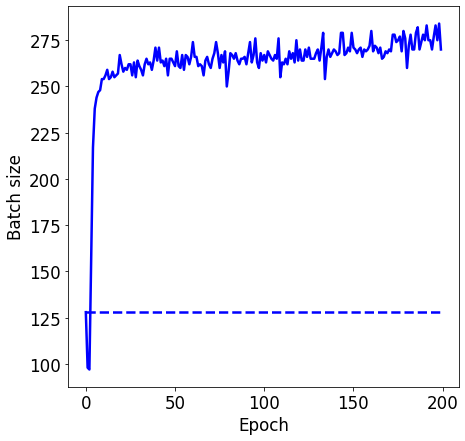

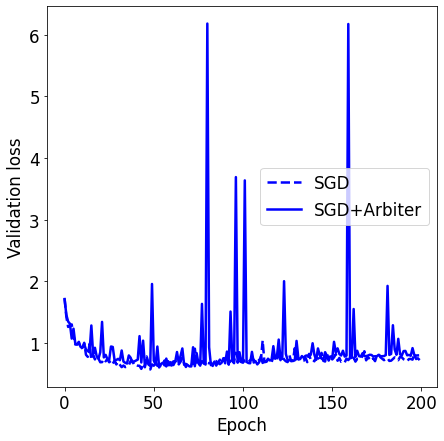

In [ ]:

next_path = os.path.join(root_path, 'ho/has/experiments/appendix/additional-results/optimiser')
# n-interval(done)/T=1
results_path1 = os.path.join(next_path, 'sgd/none/n=0.01,s=128/logs')
results_path2 = os.path.join(next_path, 'sgd/arbiter/n=0.01,s=128/logs')
# results_path3 = os.path.join(next_path, 'adam/none')
# results_path4 = os.path.join(next_path, 'adam/scheduler')

trainLoss1 = np.loadtxt(os.path.join(results_path1, 'train_loss.txt'), unpack=True).astype(np.float)
trainLoss2 = np.loadtxt(os.path.join(results_path2, 'train_loss.txt'), unpack=True).astype(np.float)
# trainLoss3 = np.loadtxt(os.path.join(results_path3, 'train_loss.txt'), unpack=True).astype(np.float)
# trainLoss4 = np.loadtxt(os.path.join(results_path4, 'train_loss.txt'), unpack=True).astype(np.float)

valLoss1 = np.loadtxt(os.path.join(results_path1, 'val_loss.txt'), unpack=True).astype(np.float)
valLoss2 = np.loadtxt(os.path.join(results_path2, 'val_loss.txt'), unpack=True).astype(np.float)
# valLoss3 = np.loadtxt(os.path.join(results_path3, 'val_loss.txt'), unpack=True).astype(np.float)
# valLoss4 = np.loadtxt(os.path.join(results_path4, 'val_loss.txt'), unpack=True).astype(np.float)

# testAcc1 = np.loadtxt(os.path.join(results_path1, 'test_acc.txt'), unpack=True).astype(np.float)
# testAcc2 = np.loadtxt(os.path.join(results_path2, 'test_acc.txt'), unpack=True).astype(np.float)
# testAcc3 = np.loadtxt(os.path.join(results_path3, 'test_acc.txt'), unpack=True).astype(np.float)

# bs1 = np.loadtxt(os.path.join(results_path1, 'bse.txt'), unpack=True).astype(np.int)
# bs1 = np.loadtxt(os.path.join(results_path2, 'bse.txt'), unpack=True).astype(np.int)
bs2 = np.loadtxt(os.path.join(results_path2, 'bse.txt'), unpack=True).astype(np.int)
bs_constant = np.full(200,128)

''' plot epoch level results (batch size, train/val loss)
'''
fig1, ax1 = plt.figure(figsize=(7,7)), plt.gca()
ax1.plot(bs2, color='blue', lw=2.5)
ax1.plot(bs_constant, color='blue', linestyle='--', lw=2.5)
# ax1.plot(bs2, color='blue', lw=2)
# ax1.plot(bs3, color='orange', lw=2)
plt.xlabel('Epoch')
plt.ylabel('Batch size')
plt.savefig(os.path.join(next_path,'sgd-batch-size.eps'))

fig2,ax2 = plt.figure(figsize=(7,7)), plt.gca()
ax2.plot(valLoss1, color='blue',lw=2.5, linestyle='--', label=r'SGD')
ax2.plot(valLoss2, color='blue',lw=2.5, label=r'SGD+Arbiter')
# ax2.plot(valLoss3, color='blue',lw=2, label=r'N=4')
# ax2.plot(valLoss4, color='blue',lw=2, label=r'N=4')
# ax2.set_yscale('log')
plt.xlabel('Epoch')
plt.ylabel('Validation loss')
plt.legend(loc='best')
plt.savefig(os.path.join(next_path,'sgd-val-loss.eps'))

# fig3,ax3 = plt.figure(figsize=(7,7)), plt.gca()
# ax3.plot(trainLoss3, color='g', linestyle='--', lw=2.5,       label=r'Adam')
# ax3.plot(trainLoss4, color='g',  lw=2.5,      label=r'Adam+Arbiter')
# plt.xlabel('Epoch')
# plt.ylabel('Train loss')
# plt.legend(loc='best')
# # plt.savefig(os.path.join(next_path,'train-loss.eps'))



# dataset

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


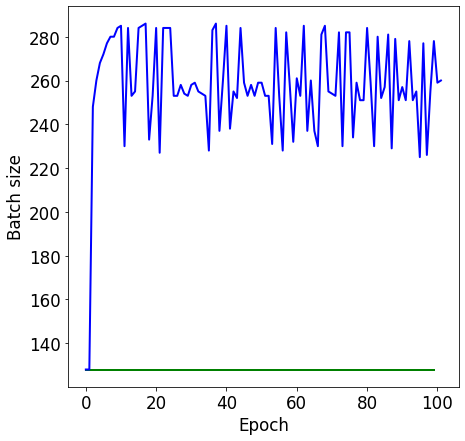

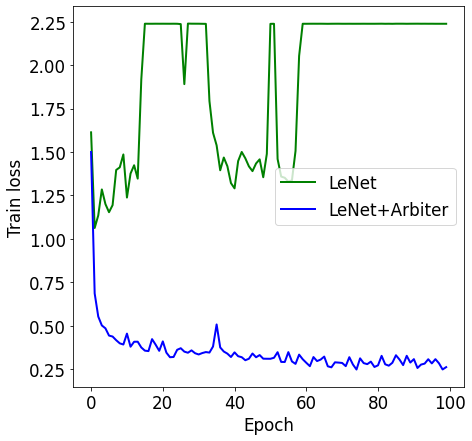

In [ ]:
next_path = os.path.join(root_path, 'ho/has/experiments/appendix/additional-results/datasets/svhn')

results_path1 = os.path.join(next_path, 'none/n=0.1,s=128/logs')
results_path2 = os.path.join(next_path, 'arbiter/n=0.1,s=128/logs')
results_path3 = os.path.join(next_path, 'none/n=0.01,s=400/logs')
results_path4 = os.path.join(next_path, 'arbiter/n=0.01,s=400/logs')

trainLoss1 = np.loadtxt(os.path.join(results_path1, 'train_loss.txt'), unpack=True).astype(np.float)
trainLoss2 = np.loadtxt(os.path.join(results_path2, 'train_loss.txt'), unpack=True).astype(np.float)
trainLoss3 = np.loadtxt(os.path.join(results_path3, 'train_loss.txt'), unpack=True).astype(np.float)
trainLoss4 = np.loadtxt(os.path.join(results_path4, 'train_loss.txt'), unpack=True).astype(np.float)

valLoss1 = np.loadtxt(os.path.join(results_path1, 'val_loss.txt'), unpack=True).astype(np.float)
valLoss2 = np.loadtxt(os.path.join(results_path2, 'val_loss.txt'), unpack=True).astype(np.float)
valLoss3 = np.loadtxt(os.path.join(results_path3, 'val_loss.txt'), unpack=True).astype(np.float)
valLoss4 = np.loadtxt(os.path.join(results_path4, 'val_loss.txt'), unpack=True).astype(np.float)

# testAcc1 = np.loadtxt(os.path.join(results_path1, 'test_acc.txt'), unpack=True).astype(np.float)
# testAcc2 = np.loadtxt(os.path.join(results_path2, 'test_acc.txt'), unpack=True).astype(np.float)
# testAcc3 = np.loadtxt(os.path.join(results_path3, 'test_acc.txt'), unpack=True).astype(np.float)

bs1 = np.full(100,128)
bs2 = np.loadtxt(os.path.join(results_path2, 'bse.txt'), unpack=True).astype(np.int)
bs3 = np.full(100,400)
bs4 = np.loadtxt(os.path.join(results_path4, 'bse.txt'), unpack=True).astype(np.int)


''' plot epoch level results (batch size, train/val loss)
'''
fig1, ax1 = plt.figure(figsize=(7,7)), plt.gca()
ax1.plot(bs1, color='green', lw=2)
ax1.plot(bs2, color='blue', lw=2)
plt.xlabel('Epoch')
plt.ylabel('Batch size')
plt.savefig(os.path.join(next_path,'svhn(noisy)-batch-size.eps'))

fig2,ax2 = plt.figure(figsize=(7,7)), plt.gca()
ax2.plot(valLoss1, color='green',lw=2)
ax2.plot(valLoss2, color='blue',lw=2)
plt.xlabel('Epoch')
plt.ylabel('Validation loss')
plt.savefig(os.path.join(next_path,'svhn(noisy)-val-loss.eps'))

fig3,ax3 = plt.figure(figsize=(7,7)), plt.gca()
ax3.plot(trainLoss1, color='green', lw=2,   label=r'LeNet')
ax3.plot(trainLoss2, color='blue',  lw=2,   label=r'LeNet+Arbiter')
plt.xlabel('Epoch')
plt.ylabel('Train loss')
plt.legend(loc='best')
plt.savefig(os.path.join(next_path,'svhn(noisy)-train-loss.eps'))



# Linear mapping and sorting

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


Text(0, 0.5, 'Validation loss')

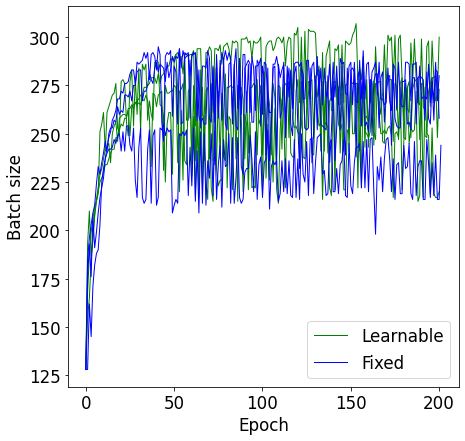

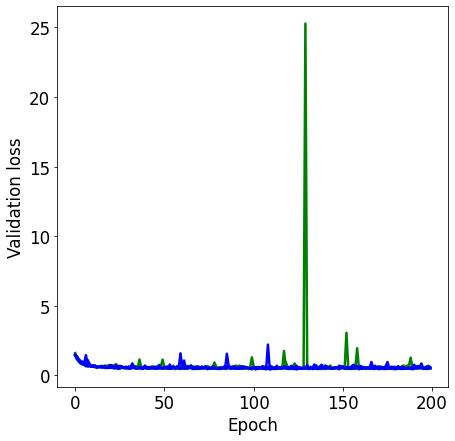

In [ ]:
next_path = os.path.join(root_path, 'ho/has/experiments')

# arb2 = os.path.join(next_path, 'appendix/ablation-study/n-interval/T=1/logs')
arb1 = os.path.join(next_path, 'appendix/assumptions/arbiter/exp1/logs')
arb2 = os.path.join(next_path, 'appendix/assumptions/arbiter/exp2/logs')
arb3 = os.path.join(next_path, 'appendix/assumptions/arbiter/exp3/logs')

map1 = os.path.join(next_path, 'appendix/assumptions/linear-mapping(grads=False)/exp1/logs')
map2 = os.path.join(next_path, 'appendix/assumptions/linear-mapping(grads=False)/exp2/logs')
map3 = os.path.join(next_path, 'appendix/assumptions/linear-mapping(grads=False)/exp3/logs')

sort1 = os.path.join(next_path, 'appendix/assumptions/sorting-OFF/exp1/logs')
sort2 = os.path.join(next_path, 'appendix/assumptions/sorting-OFF/exp2/logs')
sort3 = os.path.join(next_path, 'appendix/assumptions/sorting-OFF/exp3/logs')


# arb1 = os.path.join(next_path, 'section1/cifar10/vgg/stochastic/phi-lr=1e-5')
# results_path2 = os.path.join(next_path, 'appendix/assumptions/linear-mapping(grads=False)/logs')
# results_path2 = os.path.join(next_path, 'appendix/assumptions/sorting-OFF/logs')

tl_arb1 = np.loadtxt(os.path.join(arb1, 'train_loss.txt'), unpack=True).astype(np.float)
tl_arb2 = np.loadtxt(os.path.join(arb2, 'train_loss.txt'), unpack=True).astype(np.float)
tl_arb3 = np.loadtxt(os.path.join(arb3, 'train_loss.txt'), unpack=True).astype(np.float)
tl_map1 = np.loadtxt(os.path.join(map1, 'train_loss.txt'), unpack=True).astype(np.float)
tl_map2 = np.loadtxt(os.path.join(map2, 'train_loss.txt'), unpack=True).astype(np.float)
tl_map3 = np.loadtxt(os.path.join(map3, 'train_loss.txt'), unpack=True).astype(np.float)
tl_sort1 = np.loadtxt(os.path.join(sort1, 'train_loss.txt'), unpack=True).astype(np.float)
tl_sort2 = np.loadtxt(os.path.join(sort2, 'train_loss.txt'), unpack=True).astype(np.float)
tl_sort3 = np.loadtxt(os.path.join(sort3, 'train_loss.txt'), unpack=True).astype(np.float)
# trainLoss2 = np.loadtxt(os.path.join(results_path2, 'train_loss.txt'), unpack=True).astype(np.float)

vl_arb1 = np.loadtxt(os.path.join(arb1, 'val_loss.txt'), unpack=True).astype(np.float)
vl_arb2 = np.loadtxt(os.path.join(arb2, 'val_loss.txt'), unpack=True).astype(np.float)
vl_arb3 = np.loadtxt(os.path.join(arb3, 'val_loss.txt'), unpack=True).astype(np.float)
vl_map1 = np.loadtxt(os.path.join(map1, 'val_loss.txt'), unpack=True).astype(np.float)
vl_map2 = np.loadtxt(os.path.join(map2, 'val_loss.txt'), unpack=True).astype(np.float)
vl_map3 = np.loadtxt(os.path.join(map3, 'val_loss.txt'), unpack=True).astype(np.float)
vl_sort1 = np.loadtxt(os.path.join(sort1, 'val_loss.txt'), unpack=True).astype(np.float)
vl_sort2 = np.loadtxt(os.path.join(sort2, 'val_loss.txt'), unpack=True).astype(np.float)
vl_sort3 = np.loadtxt(os.path.join(sort3, 'val_loss.txt'), unpack=True).astype(np.float)
# valLoss1 = np.loadtxt(os.path.join(results_path1, 'val_loss.txt'), unpack=True).astype(np.float)
# valLoss2 = np.loadtxt(os.path.join(results_path2, 'val_loss.txt'), unpack=True).astype(np.float)

a_bs1 = np.loadtxt(os.path.join(arb1, 'bse.txt'), unpack=True).astype(np.int)
a_bs2 = np.loadtxt(os.path.join(arb2, 'bse.txt'), unpack=True).astype(np.int)
a_bs3 = np.loadtxt(os.path.join(arb3, 'bse.txt'), unpack=True).astype(np.int)
m_bs1 = np.loadtxt(os.path.join(map1, 'bse.txt'), unpack=True).astype(np.int)
m_bs2 = np.loadtxt(os.path.join(map2, 'bse.txt'), unpack=True).astype(np.int)
m_bs3 = np.loadtxt(os.path.join(map3, 'bse.txt'), unpack=True).astype(np.int)
s_bs1 = np.loadtxt(os.path.join(sort1, 'bse.txt'), unpack=True).astype(np.int)
s_bs2 = np.loadtxt(os.path.join(sort2, 'bse.txt'), unpack=True).astype(np.int)
s_bs3 = np.loadtxt(os.path.join(sort3, 'bse.txt'), unpack=True).astype(np.int)

# bs2 = np.loadtxt(os.path.join(results_path2, 'bse.txt'), unpack=True).astype(np.int)


''' plot epoch level results (batch size, train/val loss)
'''
fig1, ax1 = plt.figure(figsize=(7,7)), plt.gca()
ax1.plot(a_bs1, color='green', lw=1, label='Learnable')
ax1.plot(a_bs2, color='green', lw=1)
ax1.plot(a_bs3, color='green', lw=1)
ax1.plot(m_bs1, color='blue', lw=1, label='Fixed')
ax1.plot(m_bs2, color='blue', lw=1)
ax1.plot(m_bs3, color='blue', lw=1)
# ax1.plot(s_bs1, color='orange', lw=1, label='Unsorted')
# ax1.plot(s_bs2, color='orange', lw=1)
# ax1.plot(s_bs3, color='orange', lw=1)
plt.xlabel('Epoch')
plt.ylabel('Batch size')
plt.legend(loc='best')
plt.savefig(os.path.join(next_path,'mapping-batch-size.eps'))

fig2,ax2 = plt.figure(figsize=(7,7)), plt.gca()
ax2.plot(vl_arb1, color='green',lw=2.5)
ax2.plot(vl_arb2, color='green',lw=2.5)
ax2.plot(vl_arb3, color='green',lw=2.5)
ax2.plot(vl_map1, color='blue',lw=2.5)
ax2.plot(vl_map2, color='blue',lw=2.5)
ax2.plot(vl_map3, color='blue',lw=2.5)
# ax2.plot(vl_sort1, color='orange',lw=2.5)
# ax2.plot(vl_sort2, color='orange',lw=2.5)
# ax2.plot(vl_sort3, color='orange',lw=2.5)
plt.xlabel('Epoch')
plt.ylabel('Validation loss')
# plt.savefig(os.path.join(next_path,'mapping-val-loss.eps'))

# fig3,ax3 = plt.figure(figsize=(7,7)), plt.gca()
# ax3.plot(trainLoss1, color='green', lw=2.5,   label=r'Learnable')
# ax3.plot(trainLoss2, color='blue',  lw=2.5,   label=r'Fixed')
# plt.xlabel('Epoch')
# plt.ylabel('Train loss')
# plt.legend(loc='best')
# # plt.savefig(os.path.join(next_path,'mapping-train-loss.eps'))



# mode collapse

In [ ]:

next_path = os.path.join(root_path, 'ho/has/experiments/appendix')
results_path = os.path.join(next_path, 'ablation-study/mode-collapse/vgg-cifar10-nonstoch/logs')

trainLoss = np.loadtxt(os.path.join(results_path, 'train_loss.txt'), unpack=True).astype(np.float)
valLoss = np.loadtxt(os.path.join(results_path, 'val_loss.txt'), unpack=True).astype(np.float)
batchsize = np.loadtxt(os.path.join(results_path, 'bse.txt'), unpack=True).astype(np.int)
F = np.loadtxt(os.path.join(results_path, 'F.txt'), unpack=True).astype(np.float)

''' plot epoch level results (batch size, train/val loss)
'''
fig1, ax1 = plt.figure(figsize=(7,7)), plt.gca()
ax1.plot(batchsize, color='blue', label=r'')
plt.xlabel('Epoch')
plt.ylabel('Batch size')
ax11 = plt.axes([0,0,1,1])
# Manually set the position and relative size of the inset axes within ax1
ip = InsetPosition(ax1, [0.6,0.6,0.35,0.35])
ax11.set_axes_locator(ip)
ax11.plot(F, c='blue', lw=2, alpha=1)
ax11.set_xscale('log')
ax11.set_xlabel('Iteration')
ax11.set_ylabel('F')
# plt.legend(loc='best')
plt.savefig(os.path.join(next_path,'batch-size.eps'))

fig2,ax2 = plt.figure(figsize=(7,7)), plt.gca()
ax2.plot(valLoss, color='blue')
plt.xlabel('Epoch')
plt.ylabel('Validation loss')
# plt.legend(loc='best')
plt.savefig(os.path.join(next_path,'val-loss.eps'))

fig3,ax3 = plt.figure(figsize=(7,7)), plt.gca()
ax3.plot(trainLoss, color='blue')
plt.xlabel('Epoch')
plt.ylabel('Training loss')
# plt.legend(loc='best')
plt.savefig(os.path.join(next_path,'train-loss.eps'))


# ''' plot sample space over iterations 
# '''
s_alpha = np.loadtxt(os.path.join(results_path, 's_alpha.txt'), unpack=True).astype(np.int)
samples = np.loadtxt(os.path.join(results_path, 'bs_samples.txt'), unpack=True).astype(np.int)
alphas = np.loadtxt(os.path.join(results_path, 'alphas.txt'), unpack=True).astype(np.float)
s_min = samples[0,:]
s_max = samples[3,:]

# for some reason, some of the 'bs_samples.txt' files havent been written properly
# such that most of them are missing.
# luckily, I've saved the logits, so lets get them in and convert them to batch size samples.
if len(s_min) != len(samples):
    import torch
    def convertToBatchSize(l):
        ''' given logit lying in R, convert to batch size to lie in N. 
            default min and max, but could be changed s.t. GPU capacity.
        '''
        x = (512 - 8)*torch.sigmoid(l) + 8
        return int(np.floor(x.item()))

    logits = np.loadtxt(os.path.join(results_path, 'logits.txt'), unpack=True).astype(np.float)
    logit_tensor = torch.from_numpy(logits)
    s_min4 = [convertToBatchSize(l) for l in logit_tensor[0]]
    s_max4 = [convertToBatchSize(l) for l in logit_tensor[3]]

x = np.arange(0,len(s_min))

fig, ax = plt.figure(figsize=(7,7)), plt.gca()
# # max and mins
ax.plot(s_min, color='orange', alpha=0.5, label='Boundary')
ax.plot(s_max, color='orange', alpha=0.5)
# mixed sample (s_alpha)
ax.plot(s_alpha,  color='blue', alpha=1.0,    label=r'$s_{\alpha}$')
# sample space
ax.fill_between(x, s_max, s_min, facecolor='blue', alpha=0.5,    label='Search space')
plt.xlabel('Iteration')
plt.ylabel('Batch size')
# plt.show()
ax.legend(loc='best')
# ax.legend(((p1, p2), (p3, p4)), (r'$S_{\alpha}$', 'Search space'), loc='best')
plt.savefig(os.path.join(next_path,'bs-samples.png'))


# ax.plot(np.transpose(samples), markevery=100, color='b', alpha=1.0, label=r'$S_{\alpha}$')  









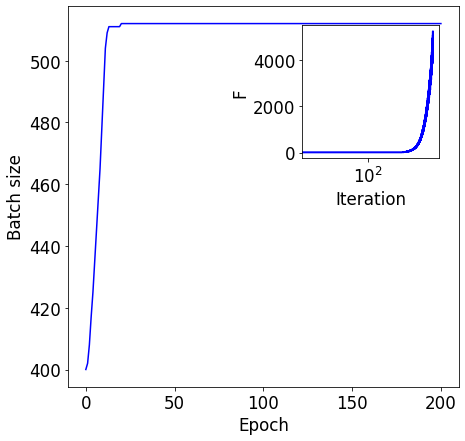

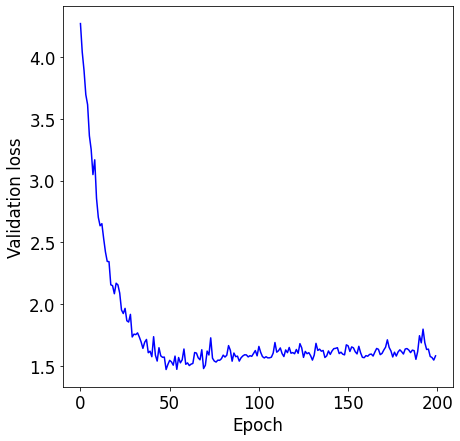

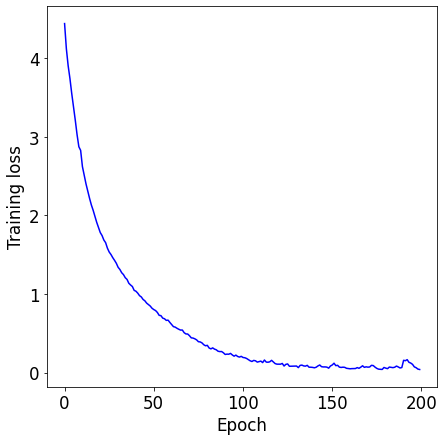

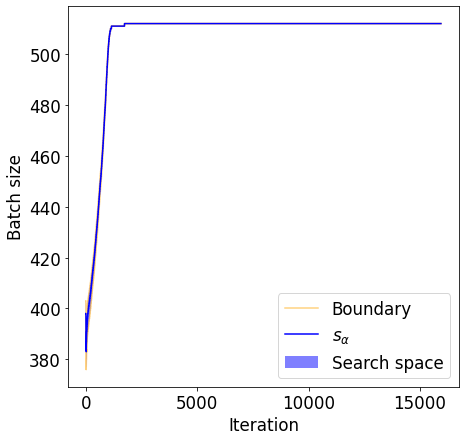

In [ ]:
next_path = os.path.join(root_path, 'DeepKernelLearning/hyperparameter-optimisation/batch-size/experiments')
results_path = os.path.join(next_path, 'section1/dataset/cifar-100/scheduler/WRN/non-stochastic/phi-lr=1e-4')

trainLoss = np.loadtxt(os.path.join(results_path, 'train_loss.txt'), unpack=True).astype(np.float)
valLoss = np.loadtxt(os.path.join(results_path, 'val_loss.txt'), unpack=True).astype(np.float)
batchsize = np.loadtxt(os.path.join(results_path, 'batch_size_epoch.txt'), unpack=True).astype(np.int)
F = np.loadtxt(os.path.join(results_path, 'F.txt'), unpack=True).astype(np.float)

''' plot epoch level results (batch size, train/val loss)
'''
fig1, ax1 = plt.figure(figsize=(7,7)), plt.gca()
ax1.plot(batchsize, color='blue', label=r'')
plt.xlabel('Epoch')
plt.ylabel('Batch size')
ax11 = plt.axes([0,0,1,1])
# Manually set the position and relative size of the inset axes within ax1
ip = InsetPosition(ax1, [0.6,0.6,0.35,0.35])
ax11.set_axes_locator(ip)
ax11.plot(F, c='blue', lw=2, alpha=1)
ax11.set_xscale('log')
ax11.set_xlabel('Iteration')
ax11.set_ylabel('F')
# plt.legend(loc='best')
plt.savefig(os.path.join(results_path,'batch-size.eps'))

fig2,ax2 = plt.figure(figsize=(7,7)), plt.gca()
ax2.plot(valLoss, color='blue')
plt.xlabel('Epoch')
plt.ylabel('Validation loss')
# plt.legend(loc='best')
plt.savefig(os.path.join(results_path,'val-loss.eps'))

fig3,ax3 = plt.figure(figsize=(7,7)), plt.gca()
ax3.plot(trainLoss, color='blue')
plt.xlabel('Epoch')
plt.ylabel('Training loss')
# plt.legend(loc='best')
plt.savefig(os.path.join(results_path,'train-loss.eps'))


# ''' plot sample space over iterations 
# '''
s_alpha = np.loadtxt(os.path.join(results_path, 's_alpha.txt'), unpack=True).astype(np.int)
samples = np.loadtxt(os.path.join(results_path, 'bs_samples.txt'), unpack=True).astype(np.int)
alphas = np.loadtxt(os.path.join(results_path, 'alphas.txt'), unpack=True).astype(np.float)
s_min = samples[0,:]
s_max = samples[3,:]

# for some reason, some of the 'bs_samples.txt' files havent been written properly
# such that most of them are missing.
# luckily, I've saved the logits, so lets get them in and convert them to batch size samples.
if len(s_min) != len(samples):
    import torch
    def convertToBatchSize(l):
        ''' given logit lying in R, convert to batch size to lie in N. 
            default min and max, but could be changed s.t. GPU capacity.
        '''
        x = (512 - 8)*torch.sigmoid(l) + 8
        return int(np.floor(x.item()))

    logits = np.loadtxt(os.path.join(results_path, 'logits.txt'), unpack=True).astype(np.float)
    logit_tensor = torch.from_numpy(logits)
    s_min4 = [convertToBatchSize(l) for l in logit_tensor[0]]
    s_max4 = [convertToBatchSize(l) for l in logit_tensor[3]]

x = np.arange(0,len(s_min))

fig, ax = plt.figure(figsize=(7,7)), plt.gca()
# # max and mins
ax.plot(s_min, color='orange', alpha=0.5, label='Boundary')
ax.plot(s_max, color='orange', alpha=0.5)
# mixed sample (s_alpha)
ax.plot(s_alpha,  color='blue', alpha=1.0,    label=r'$s_{\alpha}$')
# sample space
ax.fill_between(x, s_max, s_min, facecolor='blue', alpha=0.5,    label='Search space')
plt.xlabel('Iteration')
plt.ylabel('Batch size')
# plt.show()
ax.legend(loc='best')
# ax.legend(((p1, p2), (p3, p4)), (r'$S_{\alpha}$', 'Search space'), loc='best')
# plt.savefig(os.path.join(next_path,'bs-samples.png'))


# ax.plot(np.transpose(samples), markevery=100, color='b', alpha=1.0, label=r'$S_{\alpha}$')  


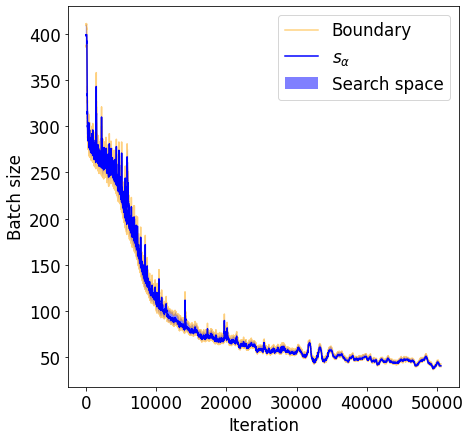

In [ ]:
fig, ax = plt.figure(figsize=(7,7)), plt.gca()
# # max and mins
ax.plot(s_min, color='orange', alpha=0.5, label='Boundary')
ax.plot(s_max, color='orange', alpha=0.5)
# mixed sample (s_alpha)
ax.plot(s_alpha,  color='blue', alpha=1.0,    label=r'$s_{\alpha}$')
# sample space
ax.fill_between(x, s_max, s_min, facecolor='blue', alpha=0.5, label='Search space')
plt.xlabel('Iteration')
plt.ylabel('Batch size')
# plt.show()
ax.legend(loc='best')
# ax.legend(((p1, p2), (p3, p4)), (r'$S_{\alpha}$', 'Search space'), loc='best')
# plt.savefig(os.path.join(next_path,'bs-samples.png'))


# ax.plot(np.transpose(samples), markevery=100, color='b', alpha=1.0, label=r'$S_{\alpha}$')  


# architecture

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


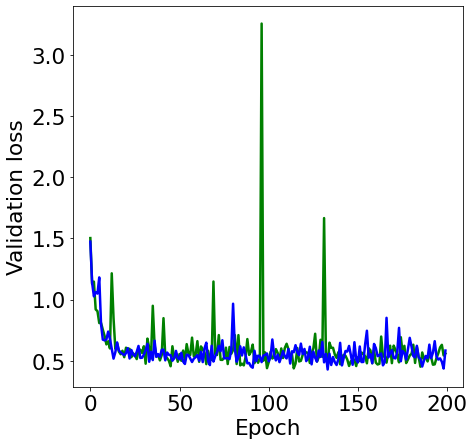

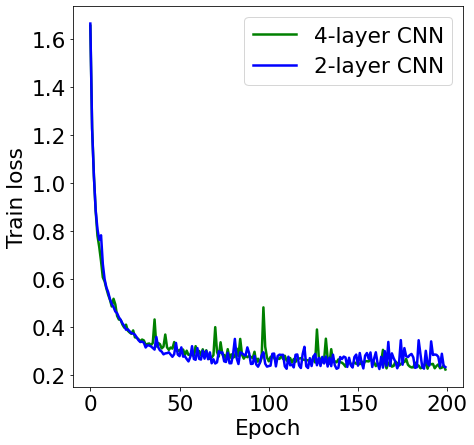

In [ ]:
next_path = os.path.join(root_path, 'ho/has/experiments/appendix')

results_path1 = os.path.join(next_path, 'ablation-study/n-interval/T=1/logs')
results_path2 = os.path.join(next_path, 'ablation-study/architecture/2-layer/logs')

trainLoss1 = np.loadtxt(os.path.join(results_path1, 'train_loss.txt'), unpack=True).astype(np.float)
trainLoss2 = np.loadtxt(os.path.join(results_path2, 'train_loss.txt'), unpack=True).astype(np.float)

valLoss1 = np.loadtxt(os.path.join(results_path1, 'val_loss.txt'), unpack=True).astype(np.float)
valLoss2 = np.loadtxt(os.path.join(results_path2, 'val_loss.txt'), unpack=True).astype(np.float)

bs1 = np.loadtxt(os.path.join(results_path1, 'bse.txt'), unpack=True).astype(np.int)
bs2 = np.loadtxt(os.path.join(results_path2, 'bse.txt'), unpack=True).astype(np.int)


''' plot epoch level results (batch size, train/val loss)
'''
fig1, ax1 = plt.figure(figsize=(7,7)), plt.gca()
ax1.plot(bs1, color='green', lw=2.5)
ax1.plot(bs2, color='blue', lw=2.5)
plt.xlabel('Epoch')
plt.ylabel('Batch size')
plt.savefig(os.path.join(next_path,'arch-batch-size.eps'))

fig2,ax2 = plt.figure(figsize=(7,7)), plt.gca()
ax2.plot(valLoss1, color='green',lw=2.5)
ax2.plot(valLoss2, color='blue',lw=2.5)
plt.xlabel('Epoch')
plt.ylabel('Validation loss')
plt.savefig(os.path.join(next_path,'arch-val-loss.eps'))

fig3,ax3 = plt.figure(figsize=(7,7)), plt.gca()
ax3.plot(trainLoss1, color='green', lw=2.5,   label=r'4-layer CNN')
ax3.plot(trainLoss2, color='blue',  lw=2.5,   label=r'2-layer CNN')
plt.xlabel('Epoch')
plt.ylabel('Train loss')
plt.legend(loc='best')
plt.savefig(os.path.join(next_path,'sorting-train-loss.eps'))



# Find best performance 

In [ ]:
test_loss1 = np.loadtxt(os.path.join(results_path1, 'test_loss.txt'), unpack=True).astype(np.float)
test_loss2 = np.loadtxt(os.path.join(results_path2, 'test_loss.txt'), unpack=True).astype(np.float)
test_loss3 = np.loadtxt(os.path.join(results_path3, 'test_loss.txt'), unpack=True).astype(np.float)
test_loss4 = np.loadtxt(os.path.join(results_path4, 'test_loss.txt'), unpack=True).astype(np.float)
test_loss5 = np.loadtxt(os.path.join(results_path5, 'test_loss.txt'), unpack=True).astype(np.float)
test_loss6 = np.loadtxt(os.path.join(results_path6, 'test_loss.txt'), unpack=True).astype(np.float)
test_loss7 = np.loadtxt(os.path.join(results_path7, 'test_loss.txt'), unpack=True).astype(np.float)
test_loss8 = np.loadtxt(os.path.join(results_path8, 'test_loss.txt'), unpack=True).astype(np.float)
val_acc1 = np.loadtxt(os.path.join(results_path1, 'val_acc.txt'), unpack=True).astype(np.float)
val_acc2 = np.loadtxt(os.path.join(results_path2, 'val_acc.txt'), unpack=True).astype(np.float)
val_acc3 = np.loadtxt(os.path.join(results_path3, 'val_acc.txt'), unpack=True).astype(np.float)
val_acc4 = np.loadtxt(os.path.join(results_path4, 'val_acc.txt'), unpack=True).astype(np.float)
val_acc5 = np.loadtxt(os.path.join(results_path5, 'val_acc.txt'), unpack=True).astype(np.float)
val_acc6 = np.loadtxt(os.path.join(results_path6, 'val_acc.txt'), unpack=True).astype(np.float)
val_acc7 = np.loadtxt(os.path.join(results_path7, 'val_acc.txt'), unpack=True).astype(np.float)
val_acc8 = np.loadtxt(os.path.join(results_path8, 'val_acc.txt'), unpack=True).astype(np.float)
test_acc1 = np.loadtxt(os.path.join(results_path1, 'test_acc.txt'), unpack=True).astype(np.float)
test_acc2 = np.loadtxt(os.path.join(results_path2, 'test_acc.txt'), unpack=True).astype(np.float)
test_acc3 = np.loadtxt(os.path.join(results_path3, 'test_acc.txt'), unpack=True).astype(np.float)
test_acc4 = np.loadtxt(os.path.join(results_path4, 'test_acc.txt'), unpack=True).astype(np.float)
test_acc5 = np.loadtxt(os.path.join(results_path5, 'test_acc.txt'), unpack=True).astype(np.float)
test_acc6 = np.loadtxt(os.path.join(results_path6, 'test_acc.txt'), unpack=True).astype(np.float)
test_acc7 = np.loadtxt(os.path.join(results_path7, 'test_acc.txt'), unpack=True).astype(np.float)
test_acc8 = np.loadtxt(os.path.join(results_path8, 'test_acc.txt'), unpack=True).astype(np.float)


In [ ]:

# Loss
print(min(val_loss1),min(test_loss1))
print(min(val_loss2),min(test_loss2))
print(min(val_loss3),min(test_loss3))
print(min(val_loss4),min(test_loss4))
print(min(val_loss5),min(test_loss5))
print(min(val_loss6),min(test_loss6))
print(min(val_loss7),min(test_loss7))
print(min(val_loss8),min(test_loss8))

# accuracy
print(max(val_acc1),max(test_acc1))
print(max(val_acc2),max(test_acc2))
print(max(val_acc3),max(test_acc3))
print(max(val_acc4),max(test_acc4))
print(max(val_acc5),max(test_acc5))
print(max(val_acc6),max(test_acc6))
print(max(val_acc7),max(test_acc7))
print(max(val_acc8),max(test_acc8))

0.437632 0.423594
0.506703 0.489992
0.487208 0.497007
0.531427 0.518201
0.301583 0.329745
0.416229 0.404855
0.295173 0.34429
0.342983 0.367697
86.0 86.34
83.06 83.83
87.73 88.11
87.01 87.14
90.49 90.27
85.95 86.54
91.8 91.34
90.81 90.8


In [ ]:


s_alpha1 = np.loadtxt(os.path.join(results_path1, 's_alpha.txt'), unpack=True).astype(np.int)
s_alpha3 = np.loadtxt(os.path.join(results_path3, 's_alpha.txt'), unpack=True).astype(np.int)
s_alpha5 = np.loadtxt(os.path.join(results_path5, 's_alpha.txt'), unpack=True).astype(np.int)
s_alpha7 = np.loadtxt(os.path.join(results_path7, 's_alpha.txt'), unpack=True).astype(np.int)

samples1 = np.loadtxt(os.path.join(results_path1, 'bs_samples.txt'), unpack=True).astype(np.int)
samples3 = np.loadtxt(os.path.join(results_path3, 'bs_samples.txt'), unpack=True).astype(np.int)
samples5 = np.loadtxt(os.path.join(results_path5, 'bs_samples.txt'), unpack=True).astype(np.int)
samples7 = np.loadtxt(os.path.join(results_path7, 'bs_samples.txt'), unpack=True).astype(np.int)

alphas1 = np.loadtxt(os.path.join(results_path1, 'alphas.txt'), unpack=True).astype(np.float)
alphas3 = np.loadtxt(os.path.join(results_path3, 'alphas.txt'), unpack=True).astype(np.float)
alphas5 = np.loadtxt(os.path.join(results_path5, 'alphas.txt'), unpack=True).astype(np.float)
alphas7 = np.loadtxt(os.path.join(results_path7, 'alphas.txt'), unpack=True).astype(np.float)



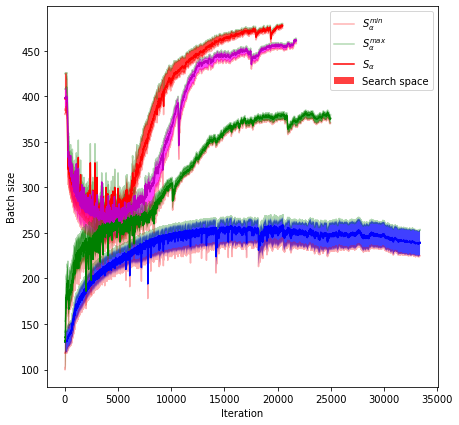

In [ ]:
import pandas as pd

s_min1 = samples1[0,:]
s_max1 = samples1[3,:]
s_min5 = samples5[0,:]
s_max5 = samples5[3,:]
s_min7 = samples7[0,:]
s_max7 = samples7[3,:]

x1 = np.arange(0,len(s_min1))
x3 = np.arange(0,len(s_min3))
x5 = np.arange(0,len(s_min5))
x7 = np.arange(0,len(s_min7))

# diff = abs(len1-len2)
# nans = np.empty((1,diff))
# nans[:] = np.nan

# # vectors likely to have different lengths due to different batch sizes (thus different 
# number of iterations).
# get round this by filling s_alpha, s_min, and s_max with nans
# if len1 < len2:
#   s_min2 = np.append(s_min2, nans)
#   s_max2 = np.append(s_max2, nans)
#   s_alpha2 = np.append(s_alpha2, nans)
#   x1 = np.append(x1, nans)
# elif len2 < len1:
#   s_min2 = np.append(s_min2, nans)
#   s_max2 = np.append(s_max2, nans)
#   s_alpha2 = np.append(s_alpha2, nans)
#   x2 = np.append(x2, nans)

fig, ax = plt.figure(figsize=(7,7)), plt.gca()
# max and mins
ax.plot(s_min1, color='r', alpha=0.3, label=r'$S^{min}_{\alpha}$')
ax.plot(s_min3, color='r', alpha=0.3)
ax.plot(s_min5, color='r', alpha=0.3)
ax.plot(s_min7, color='r', alpha=0.3)
ax.plot(s_max1, color='g', alpha=0.3, label=r'$S^{max}_{\alpha}$')
ax.plot(s_max3, color='g', alpha=0.3)
ax.plot(s_max5, color='g', alpha=0.3)
ax.plot(s_max7, color='g', alpha=0.3)
# sample space
ax.plot(s_alpha1,  color='b', alpha=1.0, label=r'')
ax.plot(s_alpha3,  color='r', alpha=1.0, label=r'$S_{\alpha}$')
ax.plot(s_alpha5,  color='g', alpha=1.0)
ax.plot(s_alpha7,  color='m', alpha=1.0)
plt.fill_between(x1, s_max1, s_min1, facecolor='blue', alpha=0.75)
plt.fill_between(x3, s_max3, s_min3, facecolor='red', alpha=0.75,label='Search space')
plt.fill_between(x5, s_max5, s_min5, facecolor='green', alpha=0.75)
plt.fill_between(x7, s_max7, s_min7, facecolor='magenta', alpha=0.75)
plt.xlabel('Iteration')
plt.ylabel('Batch size')
# plt.show()
plt.legend(loc='best')
plt.savefig(os.path.join(root_path, 'all-bs_samples.png'))


# ax.plot(np.transpose(samples), markevery=100, color='b', alpha=1.0, label=r'$S_{\alpha}$')  


In [ ]:
# results_path = os.path.join(root_path, 'practicePlot_alphahyplr=1e-4_phihyplr=1e-6_50epochs')
results_path1 = os.path.join(root_path, 'corrected/bs/s=128/50-epochs/lr=0.01_philr=1e-4_alphalr=1e-4/logs')
results_path2 = os.path.join(root_path, 'corrected/bs/s=128/50-epochs/lr=0.1_both_1e-4/logs')

F1 = np.loadtxt(os.path.join(results_path1, 'F.txt'), unpack=True).astype(np.float)
F2 = np.loadtxt(os.path.join(results_path2, 'F.txt'), unpack=True).astype(np.float)
val_loss1 = np.loadtxt(os.path.join(results_path1, 'val_loss.txt'), unpack=True).astype(np.float)
val_loss2 = np.loadtxt(os.path.join(results_path2, 'val_loss.txt'), unpack=True).astype(np.float)
val_acc1 = np.loadtxt(os.path.join(results_path1, 'val_acc.txt'), unpack=True).astype(np.float)
val_acc2 = np.loadtxt(os.path.join(results_path2, 'val_acc.txt'), unpack=True).astype(np.float)

s_actual1 = np.loadtxt(os.path.join(results_path1, 'batch_size_epoch.txt'), unpack=True).astype(np.int)
s_actual2 = np.loadtxt(os.path.join(results_path2, 'batch_size_epoch.txt'), unpack=True).astype(np.int)
s_alpha1 = np.loadtxt(os.path.join(results_path1, 's_alpha.txt'), unpack=True).astype(np.int)
s_alpha2 = np.loadtxt(os.path.join(results_path2, 's_alpha.txt'), unpack=True).astype(np.int)

samples1 = np.loadtxt(os.path.join(results_path1, 'bs_samples.txt'), unpack=True).astype(np.int)
samples2 = np.loadtxt(os.path.join(results_path2, 'bs_samples.txt'), unpack=True).astype(np.int)
alphas1 = np.loadtxt(os.path.join(results_path1, 'alphas.txt'), unpack=True).astype(np.float)
alphas2 = np.loadtxt(os.path.join(results_path2, 'alphas.txt'), unpack=True).astype(np.float)
len1 = len(s_alpha1)
len2 = len(s_alpha2)

fig1, ax1 = plt.figure(), plt.gca()
ax1.plot(s_actual1, color='b',label=r'$\eta=0.01$')
ax1.plot(s_actual2, color='m',label=r'$\eta=0.1$')
plt.xlabel('Epoch')
plt.ylabel('Batch size')
plt.legend(loc='best')
# plt.savefig(os.path.join(results_path, 'compare-lr(0.01:0.1)-batch-size.eps'))

fig2,ax2 = plt.figure(), plt.gca()
ax2.plot(val_loss1, color='b',label=r'$\eta=0.01$')
ax2.plot(val_loss2, color='m',label=r'$\eta=0.1$')
plt.xlabel('Epoch')
plt.ylabel('Val. loss')
plt.legend(loc='best')
# plt.savefig(os.path.join(results_path, 'compare-lr(0.01:0.1)-val-loss.eps'))

fig3,ax3 = plt.figure(), plt.gca()
ax3.plot(val_acc1, color='b',label=r'$\eta=0.01$')
ax3.plot(val_acc2, color='m',label=r'$\eta=0.1$')
plt.xlabel('Epoch')
plt.ylabel('Val. accuracy')
plt.legend(loc='best')
# plt.savefig(os.path.join(results_path, 'compare-lr(0.01:0.1)-val-acc.eps'))

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


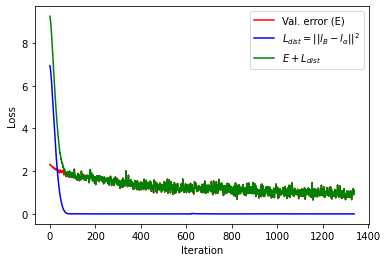

In [ ]:
E = np.loadtxt(os.path.join(results_path, 'E.txt'), unpack=True).astype(np.float)
dist = np.loadtxt(os.path.join(results_path, 'dist.txt'), unpack=True).astype(np.float)
total = np.loadtxt(os.path.join(results_path, 'total_loss.txt'), unpack=True).astype(np.float)

fig, ax = plt.figure(), plt.gca()
ax.plot(E,'r',label='Val. error (E)')
ax.plot(dist, 'b', label=r'$L_{dist} = ||l_B - l_{\alpha}||^2$')
ax.plot(total, 'g', label=r'$E + L_{dist}$')
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.legend()
plt.savefig(os.path.join(results_path, 'loss_merge.eps'))


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


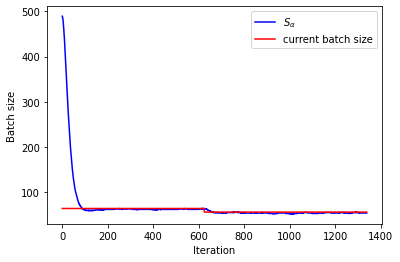

In [ ]:
import math
def read_results(file):
  with open(file) as f:
    i=0
    array=[]
    for line in f.readlines():
      if line == 'nan':
        line = array[i-1]
      array.append(np.array(line).astype(np.int))
      i+=1
    f.close()
  return array

def plot_results(file, name, n_iters, save_fig=False, iter_result=False, path=None):
  ylabels = {'s_alpha':r'Batch size', 'l_alpha': r'l_{\alpha}',
             'E': 'Response (Val. error)', 'dist': 'Distance', 'total_loss':'Loss',
             'train_loss':'Train loss', '_loss_iter':'Train loss',
             'train_acc':'Train accuracy', '_acc_iter':'Train accuracy',
             'val_loss':'Val. loss', 'val_acc':'Val. accuracy',
             'test_loss':'Test loss', 'test_acc':'Test accuracy'
             }
  # if len(file)>1:
  #   results = {[read_results(file[i]) for i in range(len(file))]}
  # else:
  results = read_results(file)
  fig, ax = plt.figure(), plt.gca()
  if iter_result:
    ax.plot(results[:n_iters], 'r-', label=r'$S_{\alpha}$')
    if name == 's_alpha':
      s1 = [64]*epoch1_length
      s2 = [56]*epoch2_length
      ax.plot(s1+s2, 'b-', label='current batch size')
      plt.legend()
    # ax.set_xscale('log')
    plt.xlabel('Iteration')
  else:
    plt.plot(results, 'b-')
    plt.xlabel('Epoch')
  plt.ylabel(ylabels[name])
  # yint = range(min(results), math.ceil(max(results))+1)
  # plt.yticks(yint)
  if save_fig:
    plt.savefig(os.path.join(path, '{}_merge.eps'.format(name)))
  else:
    plt.show()

name = 's_alpha'
log_root = os.path.join(results_path, '{}.txt'.format(name))
plot_results(log_root, name, n_iters=10000, path=results_path, iter_result=True, save_fig=True)